Information on TMDB

General FAQ
Where did all of your data come from?
You! Since starting this project in 2008, we've been lucky enough to have users just like you add and edit missing/incorrect data. Think of TMDB as a very specialised version of Wikipedia where everything is editable but very specialised around only movie, TV and actor data. We started with an initial data contribution from a project called omdb with only 10,000 movies in 2009. Everything added and edited since then has been users just like you!

In October 2013, we finally added TV. Since we didn't want to start with an empty database we opted to bring an intial import of data from Freebase. Unfortunately, Freebase is no longer online and was shut down in 2016.

How many movies are on TMDB?
As of this writing, we currently have 1,158,278 movies.

How many people are on TMDB?
As of this writing, we currently have 4,092,699 people.


Also, there is a difference between what the Kaggle dataset describes and what is really happening. TMDB is more like wikipedia since you can make edits.

Since so many presentations focus on IMDB, here I am focusing on TMDB. IMDb (Internet Movie Database) and TMDb (The Movie Database) are both online databases for movie and TV show information, but TMDb is a community-driven, non-profit project, while IMDb is owned by a for-profit corporation, Amazon. This is why it is harder to edit IMDB than TMDB.

There is a discrepancy between how many rows are actually in the dataset compared to how many rows the Kaggle website says there are. Essentially, the difference is ~1.45M compared to the actual ~1.2M

In [ ]:
# Cell 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

# Load the dataset
file_path = "/Users/jorgemartinez/Documents/NYDSAPythonProject /PythonProject1JorgeNYCDSA/TMDB_movie_dataset_v11.csv"
df = pd.read_csv(file_path)

# Display basic information
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (1200365, 24)


id            title  vote_average  vote_count    status release_date  \
0   27205        Inception         8.364       34495  Released   2010-07-15   
1  157336     Interstellar         8.417       32571  Released   2014-11-05   
2     155  The Dark Knight         8.512       30619  Released   2008-07-16   
3   19995           Avatar         7.573       29815  Released   2009-12-15   
4   24428     The Avengers         7.710       29166  Released   2012-04-25   

      revenue  runtime  adult                     backdrop_path  ...  \
0   825532764      148  False  /8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg  ...   
1   701729206      169  False  /pbrkL804c8yAv3zBZR4QPEafpAR.jpg  ...   
2  1004558444      152  False  /nMKdUUepR0i5zn0y1T4CsSB5chy.jpg  ...   
3  2923706026      162  False  /vL5LR6WdxWPjLPFRLe133jXWsh5.jpg  ...   
4  1518815515      143  False  /9BBTo63ANSmhC4e6r62OJFuK2GL.jpg  ...   

    original_title                                           overview  \
0        Inception  Cobb, a skilled thief who commits corporate es...   
1     Interstellar  The adventures of a group of explorers who mak...   
2  The Dark Knight  Batman raises the stakes in his war on crime. ...   
3           Avatar  In the 22nd century, a paraplegic Marine is di...   
4     The Avengers  When an unexpected enemy emerges and threatens...   

  popularity                       poster_path  \
0     83.952  /oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg   
1    140.241  /gEU2QniE6E77NI6lCU6MxlNBvIx.jpg   
2    130.643  /qJ2tW6WMUDux911r6m7haRef0WH.jpg   
3     79.932  /kyeqWdyUXW608qlYkRqosgbbJyK.jpg   
4     98.082   /RYMX2wcKCBAr24UyPD7xwmjaTn.jpg   

                                             tagline  \
0               Your mind is the scene of the crime.   
1  Mankind was born on Earth. It was never meant ...   
2                  Welcome to a world without rules.   
3                        Enter the world of Pandora.   
4                            Some assembly required.   

                                        genres  \
0           Action, Science Fiction, Adventure   
1            Adventure, Drama, Science Fiction   
2               Drama, Action, Crime, Thriller   
3  Action, Adventure, Fantasy, Science Fiction   
4           Science Fiction, Action, Adventure   

                                production_companies  \
0  Legendary Pictures, Syncopy, Warner Bros. Pict...   
1  Legendary Pictures, Syncopy, Lynda Obst Produc...   
2  DC Comics, Legendary Pictures, Syncopy, Isobel...   
3  Dune Entertainment, Lightstorm Entertainment, ...   
4                                     Marvel Studios   

                       production_countries  \
0  United Kingdom, United States of America   
1  United Kingdom, United States of America   
2  United Kingdom, United States of America   
3  United States of America, United Kingdom   
4                  United States of America   

                     spoken_languages  \
0  English, French, Japanese, Swahili   
1                             English   
2                   English, Mandarin   
3                    English, Spanish   
4             English, Hindi, Russian   

                                            keywords  
0  rescue, mission, dream, airplane, paris, franc...  
1  rescue, future, spacecraft, race against time,...  
2  joker, sadism, chaos, secret identity, crime f...  
3  future, society, culture clash, space travel, ...  
4  new york city, superhero, shield, based on com...  

[5 rows x 24 columns]

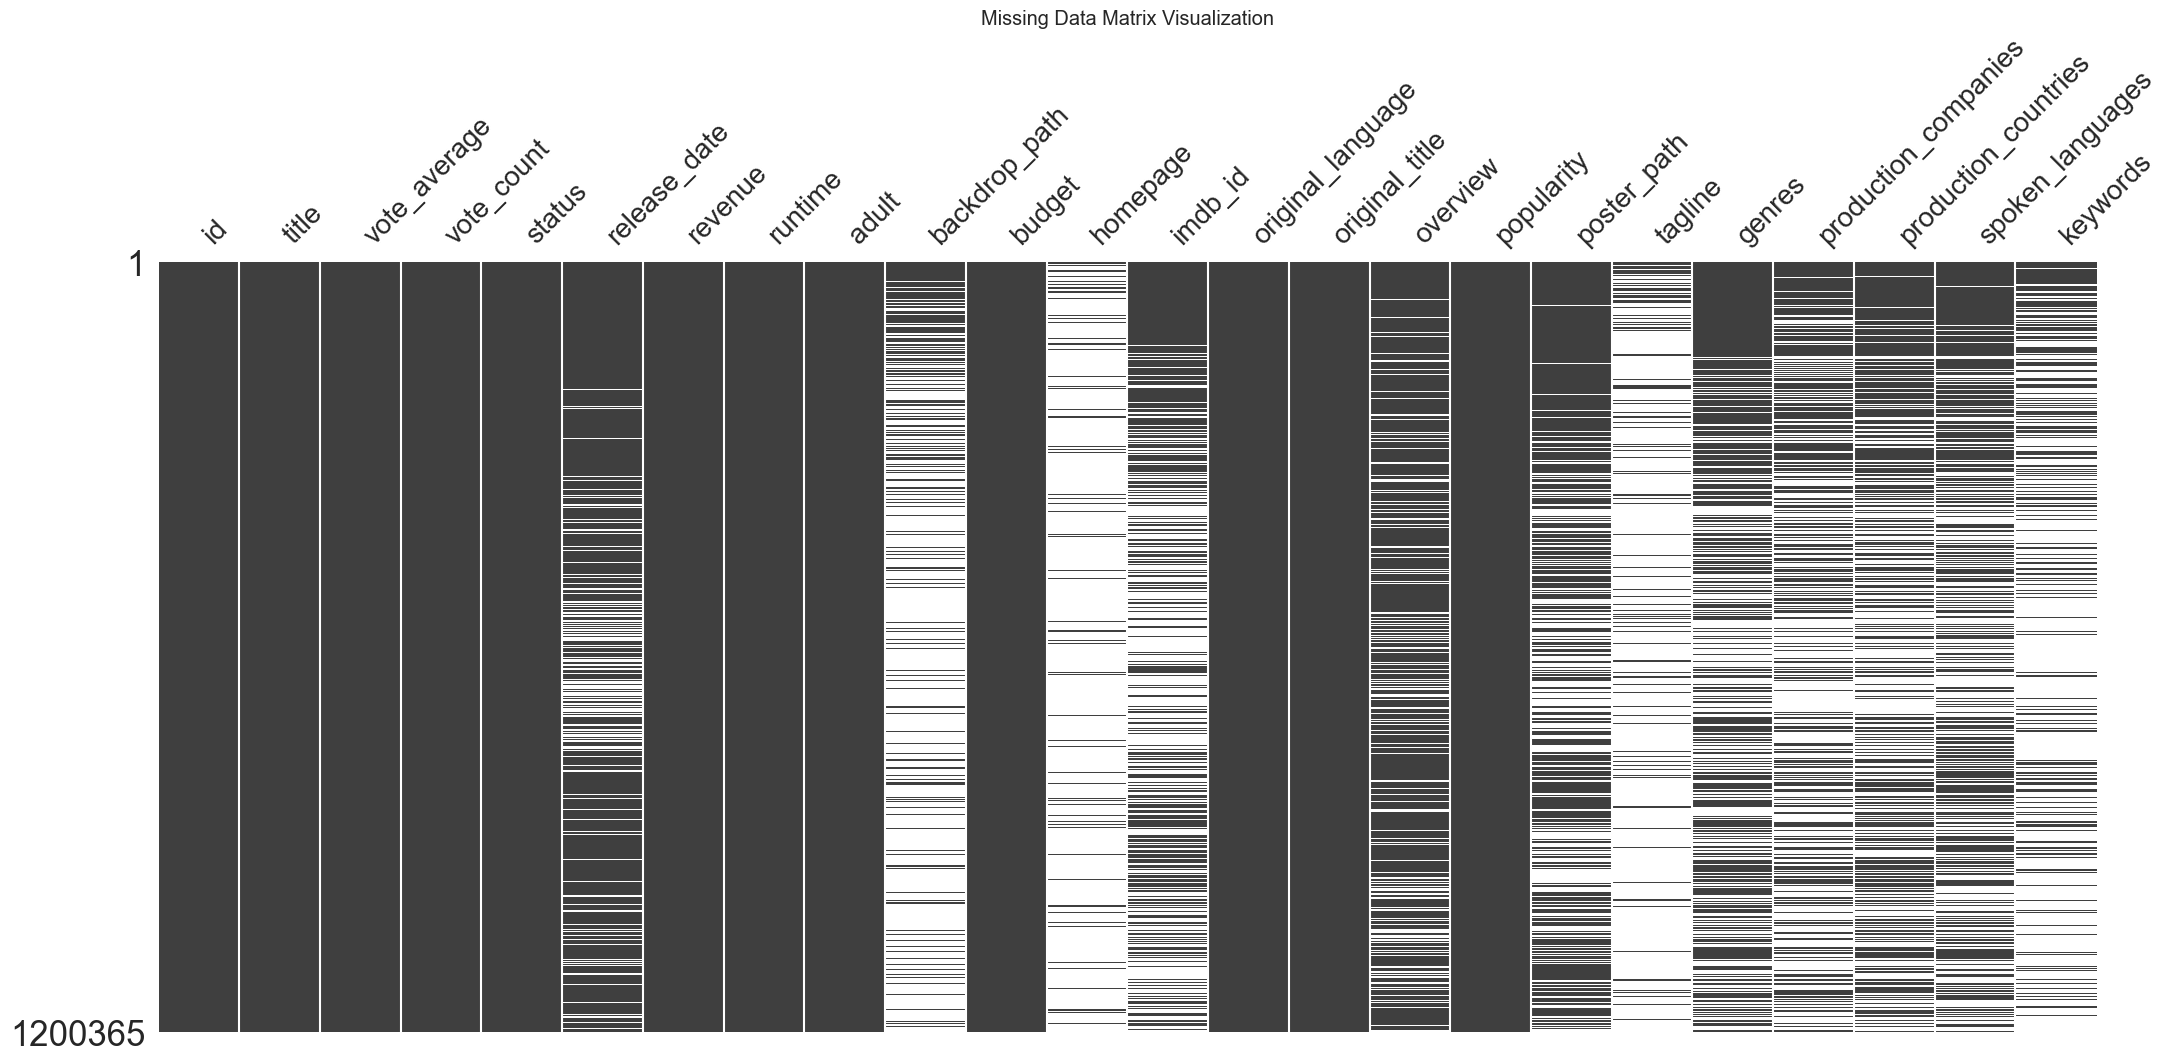

In [16]:
# Cell 2: Basic missing data matrix visualization
msno.matrix(df, sparkline=False, fontsize=20)
plt.title('Missing Data Matrix Visualization')
plt.show()

TMDB MOVIE DATASET OVERVIEW
Dataset Dimensions: 1200365 rows x 24 columns

First 5 rows of the dataset:


id            title  vote_average  vote_count    status release_date  \
0   27205        Inception         8.364       34495  Released   2010-07-15   
1  157336     Interstellar         8.417       32571  Released   2014-11-05   
2     155  The Dark Knight         8.512       30619  Released   2008-07-16   
3   19995           Avatar         7.573       29815  Released   2009-12-15   
4   24428     The Avengers         7.710       29166  Released   2012-04-25   

      revenue  runtime  adult                     backdrop_path  ...  \
0   825532764      148  False  /8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg  ...   
1   701729206      169  False  /pbrkL804c8yAv3zBZR4QPEafpAR.jpg  ...   
2  1004558444      152  False  /nMKdUUepR0i5zn0y1T4CsSB5chy.jpg  ...   
3  2923706026      162  False  /vL5LR6WdxWPjLPFRLe133jXWsh5.jpg  ...   
4  1518815515      143  False  /9BBTo63ANSmhC4e6r62OJFuK2GL.jpg  ...   

    original_title                                           overview  \
0        Inception  Cobb, a skilled thief who commits corporate es...   
1     Interstellar  The adventures of a group of explorers who mak...   
2  The Dark Knight  Batman raises the stakes in his war on crime. ...   
3           Avatar  In the 22nd century, a paraplegic Marine is di...   
4     The Avengers  When an unexpected enemy emerges and threatens...   

  popularity                       poster_path  \
0     83.952  /oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg   
1    140.241  /gEU2QniE6E77NI6lCU6MxlNBvIx.jpg   
2    130.643  /qJ2tW6WMUDux911r6m7haRef0WH.jpg   
3     79.932  /kyeqWdyUXW608qlYkRqosgbbJyK.jpg   
4     98.082   /RYMX2wcKCBAr24UyPD7xwmjaTn.jpg   

                                             tagline  \
0               Your mind is the scene of the crime.   
1  Mankind was born on Earth. It was never meant ...   
2                  Welcome to a world without rules.   
3                        Enter the world of Pandora.   
4                            Some assembly required.   

                                        genres  \
0           Action, Science Fiction, Adventure   
1            Adventure, Drama, Science Fiction   
2               Drama, Action, Crime, Thriller   
3  Action, Adventure, Fantasy, Science Fiction   
4           Science Fiction, Action, Adventure   

                                production_companies  \
0  Legendary Pictures, Syncopy, Warner Bros. Pict...   
1  Legendary Pictures, Syncopy, Lynda Obst Produc...   
2  DC Comics, Legendary Pictures, Syncopy, Isobel...   
3  Dune Entertainment, Lightstorm Entertainment, ...   
4                                     Marvel Studios   

                       production_countries  \
0  United Kingdom, United States of America   
1  United Kingdom, United States of America   
2  United Kingdom, United States of America   
3  United States of America, United Kingdom   
4                  United States of America   

                     spoken_languages  \
0  English, French, Japanese, Swahili   
1                             English   
2                   English, Mandarin   
3                    English, Spanish   
4             English, Hindi, Russian   

                                            keywords  
0  rescue, mission, dream, airplane, paris, franc...  
1  rescue, future, spacecraft, race against time,...  
2  joker, sadism, chaos, secret identity, crime f...  
3  future, society, culture clash, space travel, ...  
4  new york city, superhero, shield, based on com...  

[5 rows x 24 columns]


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200365 entries, 0 to 1200364
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200365 non-null  int64  
 1   title                 1200352 non-null  object 
 2   vote_average          1200365 non-null  float64
 3   vote_count            1200365 non-null  int64  
 4   status                1200365 non-null  object 
 5   release_date          985869 non-null   object 
 6   revenue               1200365 non-null  int64  
 7   runtime               1200365 non-null  int64  
 8   adult                 1200365 non-null  bool   
 9   backdrop_path         313858 non-null   object 
 10  budget                1200365 non-null  int64  
 11  homepage              126297 non-null   object 
 12  imdb_id               617636 non-null   object 
 13  original_language     1200365 non-null  object 
 14  original_tit

id  vote_average    vote_count       revenue       runtime  \
count  1.200365e+06  1.200365e+06  1.200365e+06  1.200365e+06  1.200365e+06   
mean   7.769278e+05  1.794018e+00  1.787042e+01  6.752449e+05  4.681506e+01   
std    4.145992e+05  2.982466e+00  3.099692e+02  1.837618e+07  6.151949e+01   
min    2.000000e+00  0.000000e+00  0.000000e+00 -1.200000e+01 -2.800000e+01   
25%    4.299250e+05  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    7.843750e+05  0.000000e+00  0.000000e+00  0.000000e+00  2.000000e+01   
75%    1.148479e+06  4.300000e+00  1.000000e+00  0.000000e+00  8.800000e+01   
max    1.457011e+06  1.000000e+01  3.449500e+04  5.000000e+09  1.440000e+04   

             budget    popularity  
count  1.200365e+06  1.200365e+06  
mean   2.623033e+05  1.192852e+00  
std    5.135027e+06  7.385950e+00  
min    0.000000e+00  0.000000e+00  
25%    0.000000e+00  6.000000e-01  
50%    0.000000e+00  6.000000e-01  
75%    0.000000e+00  8.670000e-01  
max    1.000000e+09  2.994357e+03


Distribution of Movies by Genre (Top 10):


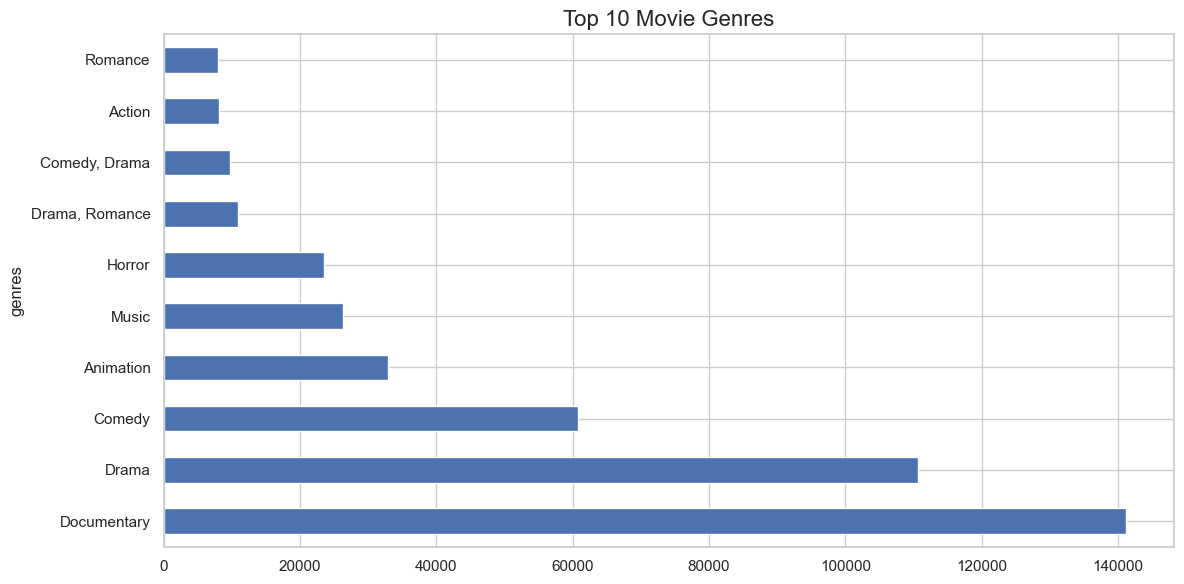


Movie Release Year Distribution:


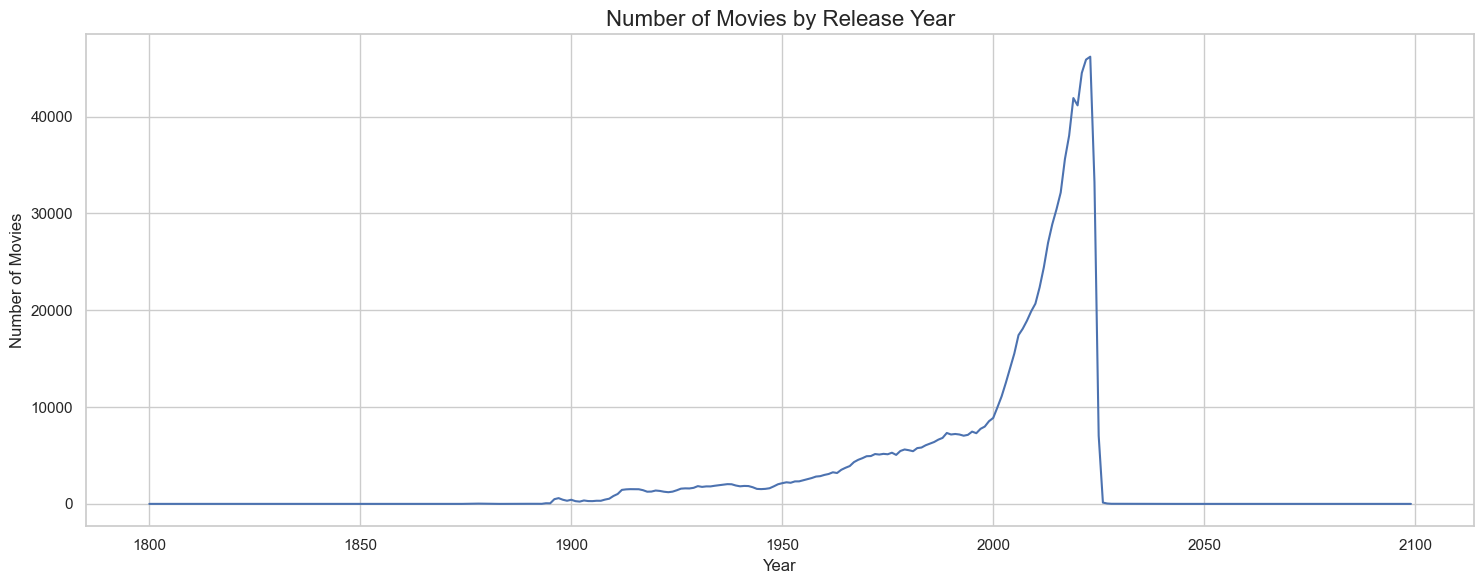


Distribution of Movie Ratings:


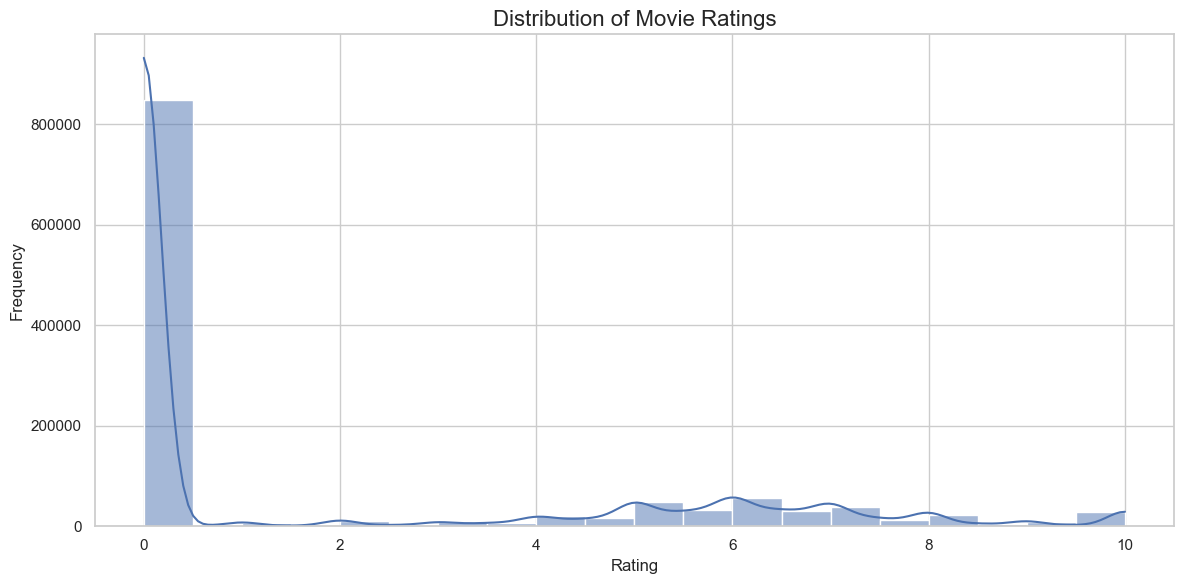


Correlation Matrix of Numerical Features:


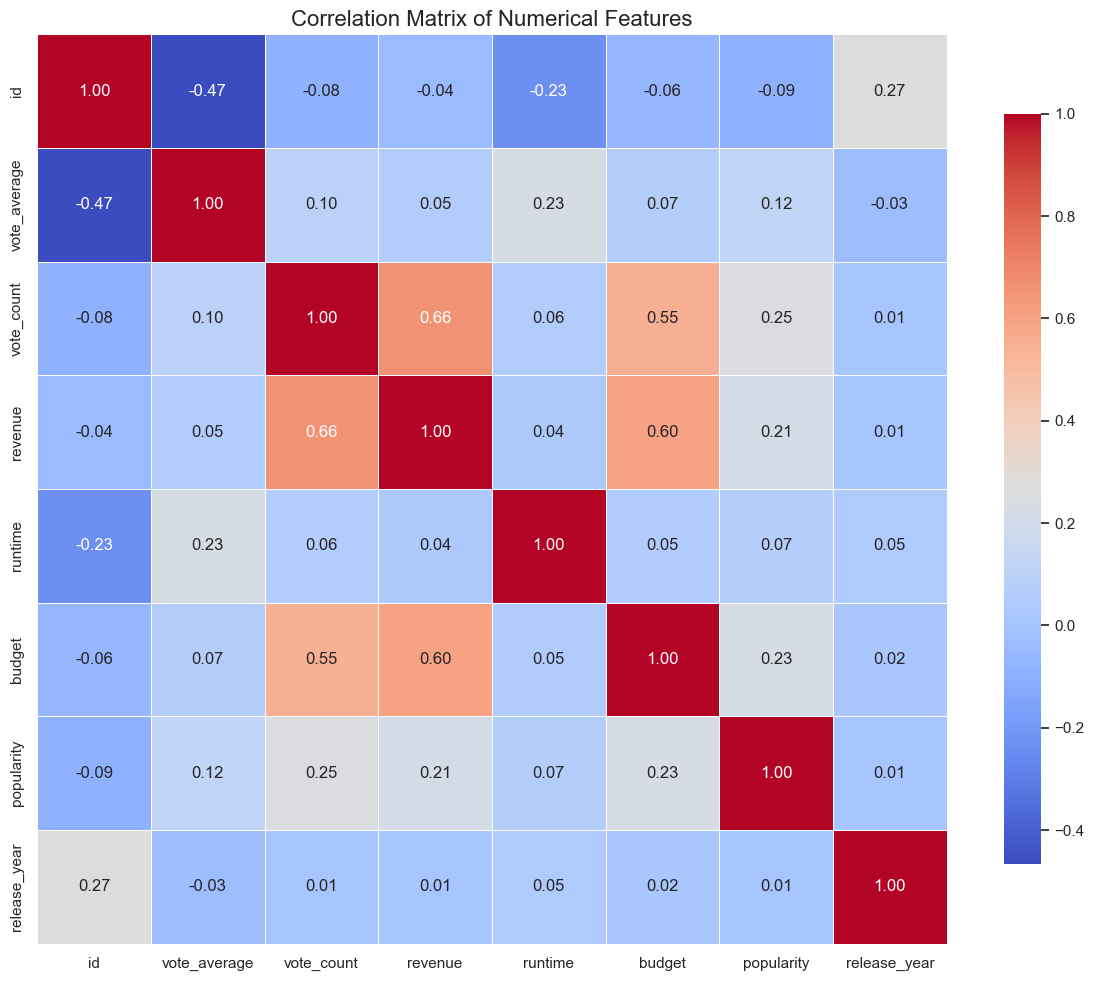


Data Analysis Complete.


In [1]:
# TMDB Dataset Exploratory Analysis

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set better visuals
plt.style.use('ggplot')
sns.set(style="whitegrid")

# Load the dataset
file_path = '/Users/jorgemartinez/Documents/NYDSAPythonProject /PythonProject1JorgeNYCDSA/TMDB_movie_dataset_v11.csv'
df = pd.read_csv(file_path)

# Display basic information about the dataset
print("="*50)
print("TMDB MOVIE DATASET OVERVIEW")
print("="*50)

# Shape of the dataset (rows, columns)
print(f"Dataset Dimensions: {df.shape[0]} rows x {df.shape[1]} columns")

# Display the first 5 rows to get a feel for the data
print("\nFirst 5 rows of the dataset:")
display(df.head())

# Information about data types and non-null values
print("\nDataset Information:")
df.info()

# Summary statistics for numerical columns
print("\nSummary Statistics for Numerical Columns:")
display(df.describe())

# No missing values analysis as requested

# Count of categorical variables (if applicable - adjust column names as needed)
print("\nDistribution of Movies by Genre (Top 10):")
try:
    # Attempt to process genres - this assumes genres are in a format that can be processed
    # This may need to be adjusted based on how genres are stored in your dataset
    if 'genres' in df.columns:
        # Check if genres are stored as strings that need parsing
        if isinstance(df['genres'].iloc[0], str) and '[' in df['genres'].iloc[0]:
            # Try to extract genres if they're stored as JSON strings or similar format
            import json
            genre_counts = {}
            for genres_str in df['genres'].dropna():
                try:
                    genres_list = json.loads(genres_str.replace("'", "\""))
                    for genre in genres_list:
                        if isinstance(genre, dict) and 'name' in genre:
                            genre_name = genre['name']
                            genre_counts[genre_name] = genre_counts.get(genre_name, 0) + 1
                        elif isinstance(genre, str):
                            genre_counts[genre] = genre_counts.get(genre, 0) + 1
                except:
                    pass
            genre_df = pd.DataFrame({'Genre': list(genre_counts.keys()), 
                                     'Count': list(genre_counts.values())})
            genre_df = genre_df.sort_values('Count', ascending=False).head(10)
            plt.figure(figsize=(12, 6))
            sns.barplot(x='Count', y='Genre', data=genre_df)
            plt.title('Top 10 Movie Genres', fontsize=16)
            plt.tight_layout()
            plt.show()
        else:
            # If genres are already in a clean format
            df['genres'].value_counts().head(10).plot(kind='barh', figsize=(12, 6))
            plt.title('Top 10 Movie Genres', fontsize=16)
            plt.tight_layout()
            plt.show()
    else:
        print("Genre column not found in the dataset.")
except Exception as e:
    print(f"Could not process genres: {e}")

# Year distribution (assuming there's a 'release_date' or 'year' column)
print("\nMovie Release Year Distribution:")
try:
    if 'release_date' in df.columns:
        # Extract year from release_date
        df['release_year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year
        plt.figure(figsize=(15, 6))
        df['release_year'].value_counts().sort_index().plot(kind='line')
        plt.title('Number of Movies by Release Year', fontsize=16)
        plt.xlabel('Year')
        plt.ylabel('Number of Movies')
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    elif 'year' in df.columns:
        plt.figure(figsize=(15, 6))
        df['year'].value_counts().sort_index().plot(kind='line')
        plt.title('Number of Movies by Year', fontsize=16)
        plt.xlabel('Year')
        plt.ylabel('Number of Movies')
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        print("Release date or year column not found in the dataset.")
except Exception as e:
    print(f"Could not process release years: {e}")

# Distribution of movie ratings (assuming there's a 'vote_average' column)
print("\nDistribution of Movie Ratings:")
try:
    if 'vote_average' in df.columns:
        plt.figure(figsize=(12, 6))
        sns.histplot(df['vote_average'].dropna(), kde=True, bins=20)
        plt.title('Distribution of Movie Ratings', fontsize=16)
        plt.xlabel('Rating')
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()
    else:
        print("Vote average column not found in the dataset.")
except Exception as e:
    print(f"Could not process ratings: {e}")

# Correlation matrix of numerical features
print("\nCorrelation Matrix of Numerical Features:")
try:
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=[np.number])
    
    # Compute the correlation matrix
    corr = numeric_df.corr()
    
    # Create a heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', 
                square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Matrix of Numerical Features', fontsize=16)
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Could not generate correlation matrix: {e}")

print("\nData Analysis Complete.")

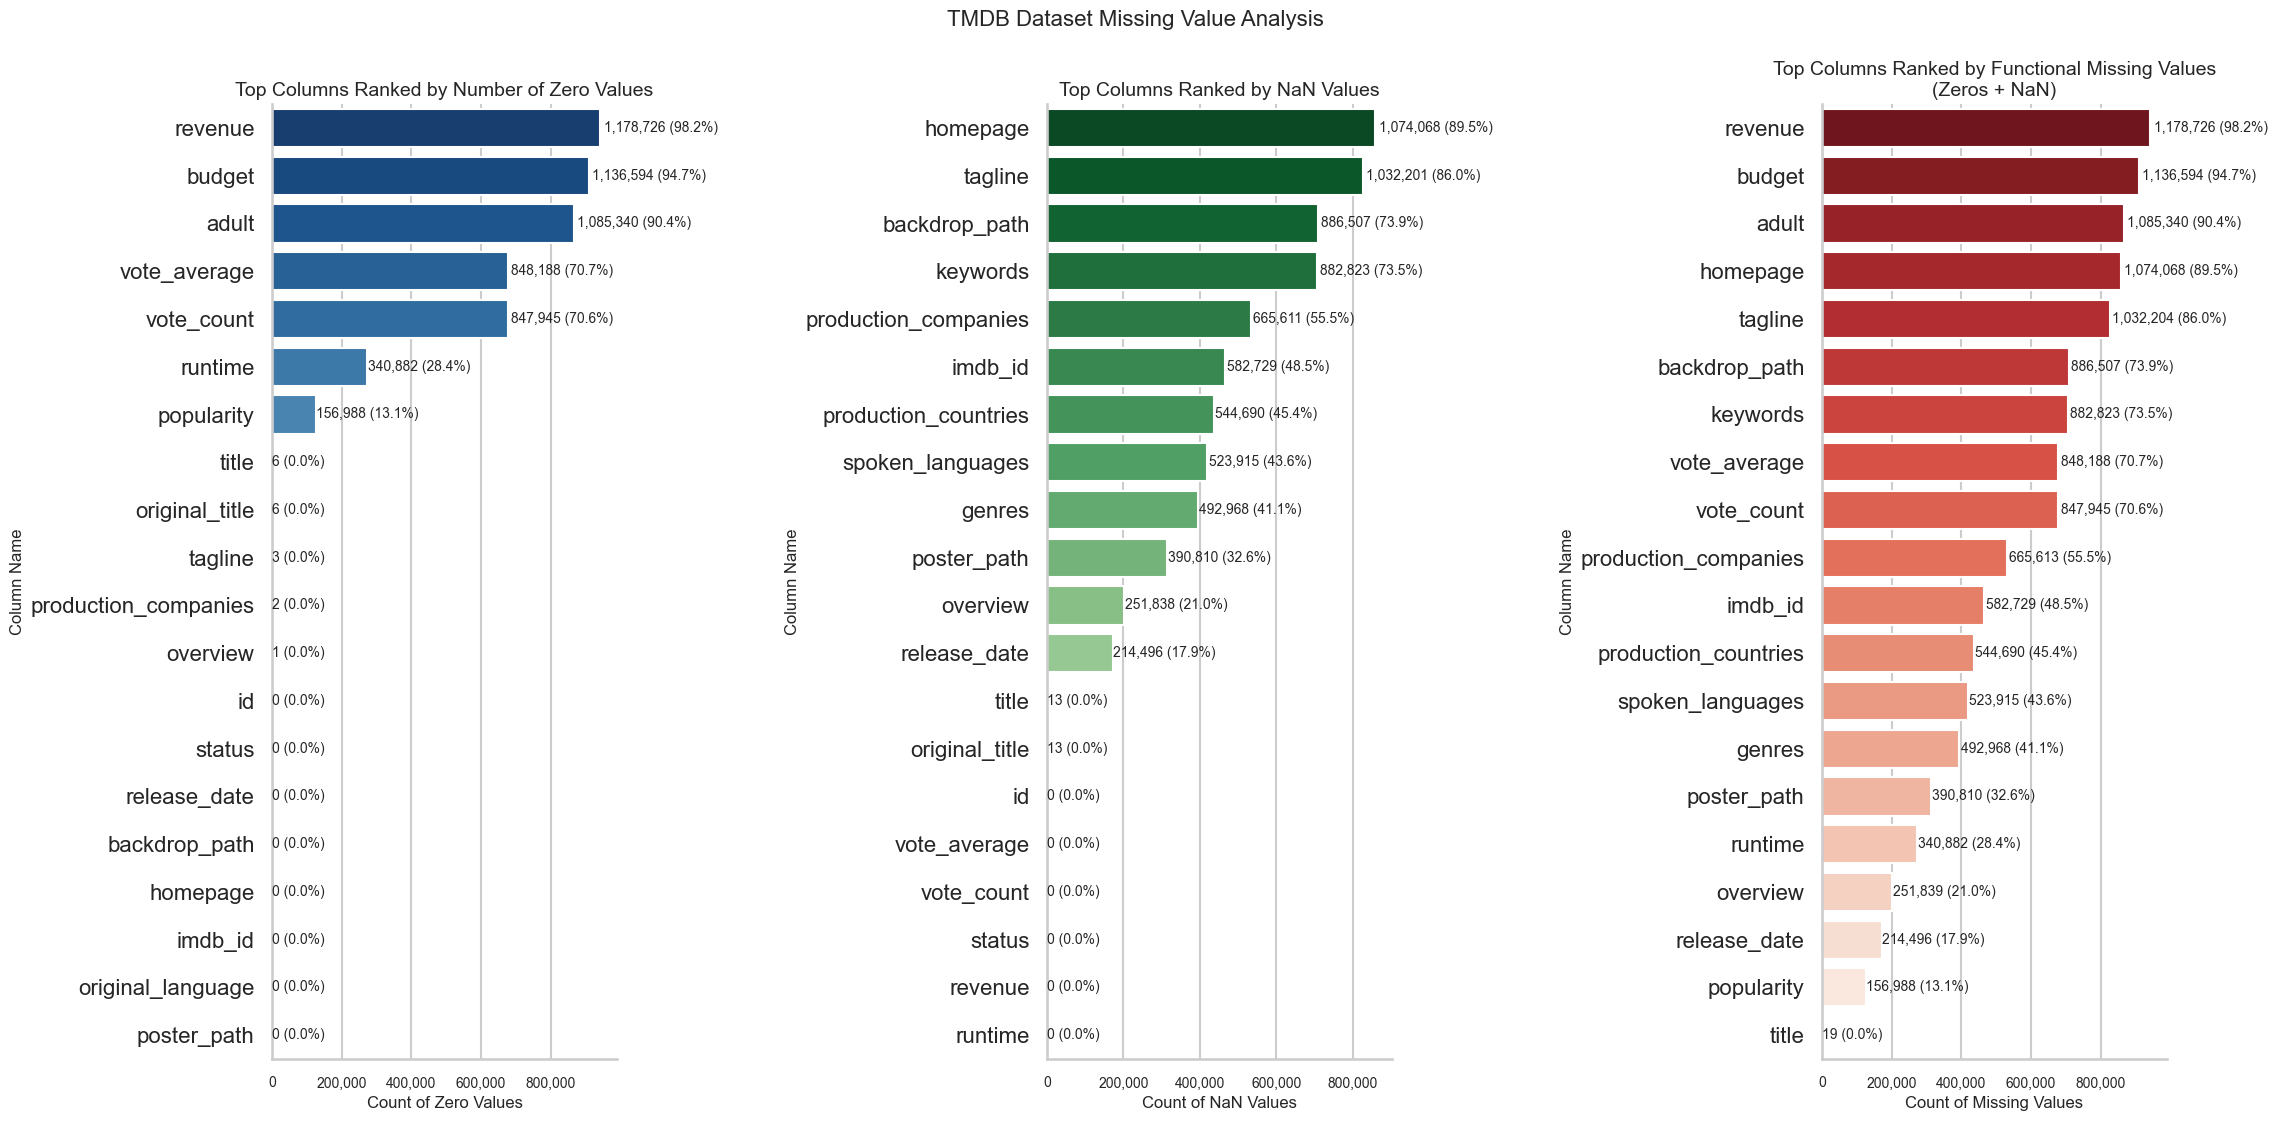

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your TMDB dataset
df = pd.read_csv("/Users/jorgemartinez/Documents/TMDB_movie_dataset_v11.csv")

# Function to create visualizations for zero values, NaN values, and combined missing values
def visualize_missing_and_zeros(dataframe, y_fontsize=14):  # Added parameter for y-axis font size
    # Create a figure with three subplots
    fig, axes = plt.subplots(1, 3, figsize=(24, 12))
    
    # Calculate total rows for percentage calculations
    total_rows = len(dataframe)
    
    # 1. Count zeros in each column
    zeros_count = {}
    for column in dataframe.columns:
        # For numeric columns
        if pd.api.types.is_numeric_dtype(dataframe[column]):
            zeros_count[column] = (dataframe[column] == 0).sum()
        # For non-numeric columns (strings, etc.)
        else:
            zeros_count[column] = ((dataframe[column] == '0') | 
                                  (dataframe[column] == '') | 
                                  (dataframe[column] == '0.0')).sum()
    
    # Sort the dictionary by values in descending order
    zeros_count = dict(sorted(zeros_count.items(), key=lambda item: item[1], reverse=True))
    
    # Create a DataFrame from the zeros count dictionary
    zeros_df = pd.DataFrame({
        'Column': list(zeros_count.keys()),
        'Zero Count': list(zeros_count.values())
    })
    
    # Only keep top 20 columns if there are many
    if len(zeros_df) > 20:
        zeros_df = zeros_df.head(20)
    
    # Plot the zero counts
    bars0 = sns.barplot(x='Zero Count', y='Column', data=zeros_df, ax=axes[0], palette='Blues_r')
    axes[0].set_title('Top Columns Ranked by Number of Zero Values', fontsize=14)
    axes[0].set_xlabel('Count of Zero Values', fontsize=12)
    axes[0].set_ylabel('Column Name', fontsize=12)
    
    # Increase the font size for y-axis labels (column names)
    axes[0].set_yticklabels(axes[0].get_yticklabels(), fontsize=y_fontsize)
    
    # Add count values and percentages to the bars with commas (similar to other plots)
    for i, v in enumerate(zeros_df['Zero Count']):
        percentage = (v / total_rows) * 100
        # Position the text a bit away from the end of the bar
        x_pos = v + (v * 0.01)
        # Format with commas and clean percentage
        text = f"{v:,} ({percentage:.1f}%)"
        axes[0].text(x_pos, i, text, va='center', fontsize=10)
    
    # 2. Count NaN values only
    nan_count = {}
    for column in dataframe.columns:
        # Count NaN values
        nan_count[column] = dataframe[column].isna().sum()
    
    # Sort the dictionary by values in descending order
    nan_count = dict(sorted(nan_count.items(), key=lambda item: item[1], reverse=True))
    
    # Create a DataFrame from the nan count dictionary
    nan_df = pd.DataFrame({
        'Column': list(nan_count.keys()),
        'NaN Count': list(nan_count.values())
    })
    
    # Only keep top 20 columns if there are many
    if len(nan_df) > 20:
        nan_df = nan_df.head(20)
    
    # Plot the NaN counts
    bars1 = sns.barplot(x='NaN Count', y='Column', data=nan_df, ax=axes[1], palette='Greens_r')
    axes[1].set_title('Top Columns Ranked by NaN Values', fontsize=14)
    axes[1].set_xlabel('Count of NaN Values', fontsize=12)
    axes[1].set_ylabel('Column Name', fontsize=12)
    
    # Increase the font size for y-axis labels (column names)
    axes[1].set_yticklabels(axes[1].get_yticklabels(), fontsize=y_fontsize)
    
    # Add count values and percentages for NaN values
    for i, v in enumerate(nan_df['NaN Count']):
        percentage = (v / total_rows) * 100
        # Position the text a bit away from the end of the bar
        x_pos = v + (v * 0.01)
        # Format with commas and clean percentage
        text = f"{v:,} ({percentage:.1f}%)"
        axes[1].text(x_pos, i, text, va='center', fontsize=10)
    
    # 3. Count all functional missing values (zeros + NaN)
    missing_count = {}
    for column in dataframe.columns:
        # Count NaN values
        nan_count = dataframe[column].isna().sum()
        
        # Count zero values (based on data type)
        if pd.api.types.is_numeric_dtype(dataframe[column]):
            zero_count = (dataframe[column] == 0).sum()
        else:
            zero_count = ((dataframe[column] == '0') | 
                         (dataframe[column] == '') | 
                         (dataframe[column] == '0.0')).sum()
        
        # Total missing values (NaN + zeros)
        missing_count[column] = nan_count + zero_count
    
    # Sort the dictionary by values in descending order
    missing_count = dict(sorted(missing_count.items(), key=lambda item: item[1], reverse=True))
    
    # Create a DataFrame from the missing count dictionary
    missing_df = pd.DataFrame({
        'Column': list(missing_count.keys()),
        'Missing Count': list(missing_count.values())
    })
    
    # Only keep top 20 columns if there are many
    if len(missing_df) > 20:
        missing_df = missing_df.head(20)
    
    # Plot the missing counts
    bars2 = sns.barplot(x='Missing Count', y='Column', data=missing_df, ax=axes[2], palette='Reds_r')
    axes[2].set_title('Top Columns Ranked by Functional Missing Values\n(Zeros + NaN)', fontsize=14)
    axes[2].set_xlabel('Count of Missing Values', fontsize=12)
    axes[2].set_ylabel('Column Name', fontsize=12)
    
    # Increase the font size for y-axis labels (column names)
    axes[2].set_yticklabels(axes[2].get_yticklabels(), fontsize=y_fontsize)
    
    # Add count values and percentages with better formatting
    for i, v in enumerate(missing_df['Missing Count']):
        percentage = (v / total_rows) * 100
        # Position the text a bit away from the end of the bar
        x_pos = v + (v * 0.01)
        # Format with commas and clean percentage
        text = f"{v:,} ({percentage:.1f}%)"
        axes[2].text(x_pos, i, text, va='center', fontsize=10)
    
    # Improve x-axis formatting with commas for all plots
    from matplotlib.ticker import FuncFormatter
    def comma_formatter(x, pos):
        return f"{int(x):,}"
    
    for ax in axes:
        ax.xaxis.set_major_formatter(FuncFormatter(comma_formatter))
        # Explicitly set x-axis labels to original size (10)
        ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
        # Remove the right and top spines for cleaner look
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
    
    # Adjust layout
    plt.tight_layout(pad=3.0)
    
    # Add overall title
    plt.suptitle('TMDB Dataset Missing Value Analysis', fontsize=16, y=0.98)
    
    return fig

# Run the visualization function with larger font size for column names
# You can adjust the value as needed - try values between 14-18 for moderate increase
fig = visualize_missing_and_zeros(df, y_fontsize=16)

# Save the figure if needed
# fig.savefig('tmdb_missing_values_analysis.png', dpi=300, bbox_inches='tight')

# Show the figure
plt.show()

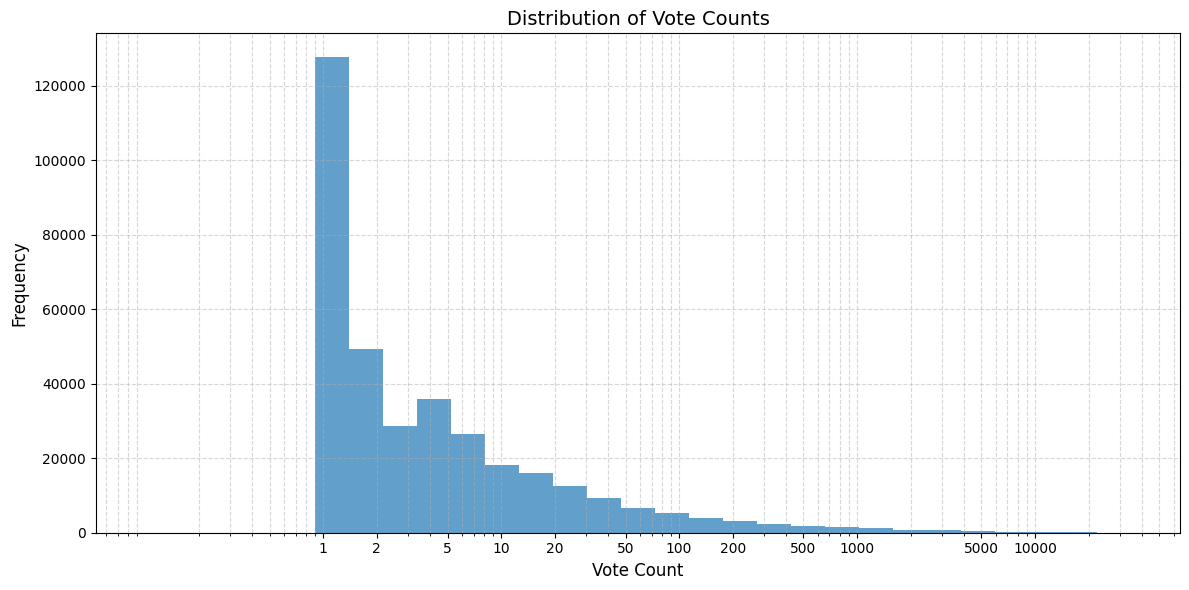

In [5]:
# Import matplotlib and numpy
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file manually
import csv

# Read the data
vote_counts = []
with open('/Users/jorgemartinez/Documents/TMDB_movie_dataset_v11.csv', 'r', encoding='utf-8') as file:
    reader = csv.DictReader(file)
    for row in reader:
        try:
            vote_count = float(row['vote_count'])
            vote_counts.append(vote_count)
        except (ValueError, KeyError):
            # Skip rows with missing or invalid vote_count
            pass

# Create a histogram
plt.figure(figsize=(12, 6))

# Define bins for the histogram - using log scale
max_count = max(vote_counts)
bins = np.logspace(np.log10(0.1), np.log10(max_count + 1), 30)

# Create the histogram
plt.hist(vote_counts, bins=bins, alpha=0.7)

# Add labels and title
plt.title('Distribution of Vote Counts', fontsize=14)
plt.xlabel('Vote Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Log scale for x-axis with more tick points
plt.xscale('log')

# Customize x-axis ticks to be more readable
# Define specific tick locations
tick_locations = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 5000, 10000]
plt.xticks(tick_locations, labels=[str(x) for x in tick_locations], rotation=0)

# Increase tick label size
plt.tick_params(axis='both', which='major', labelsize=10)

# Add minor grid lines to improve readability
plt.grid(True, which='both', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

Below: 
This is a subset of the dataset (1%) that is filtered so that each title has both positive revenue and budget and makes sure that movies with missing rating_category values are removed.
Explain how rating is incorporated here, most movies tend to turn a profit and be either average or good. 


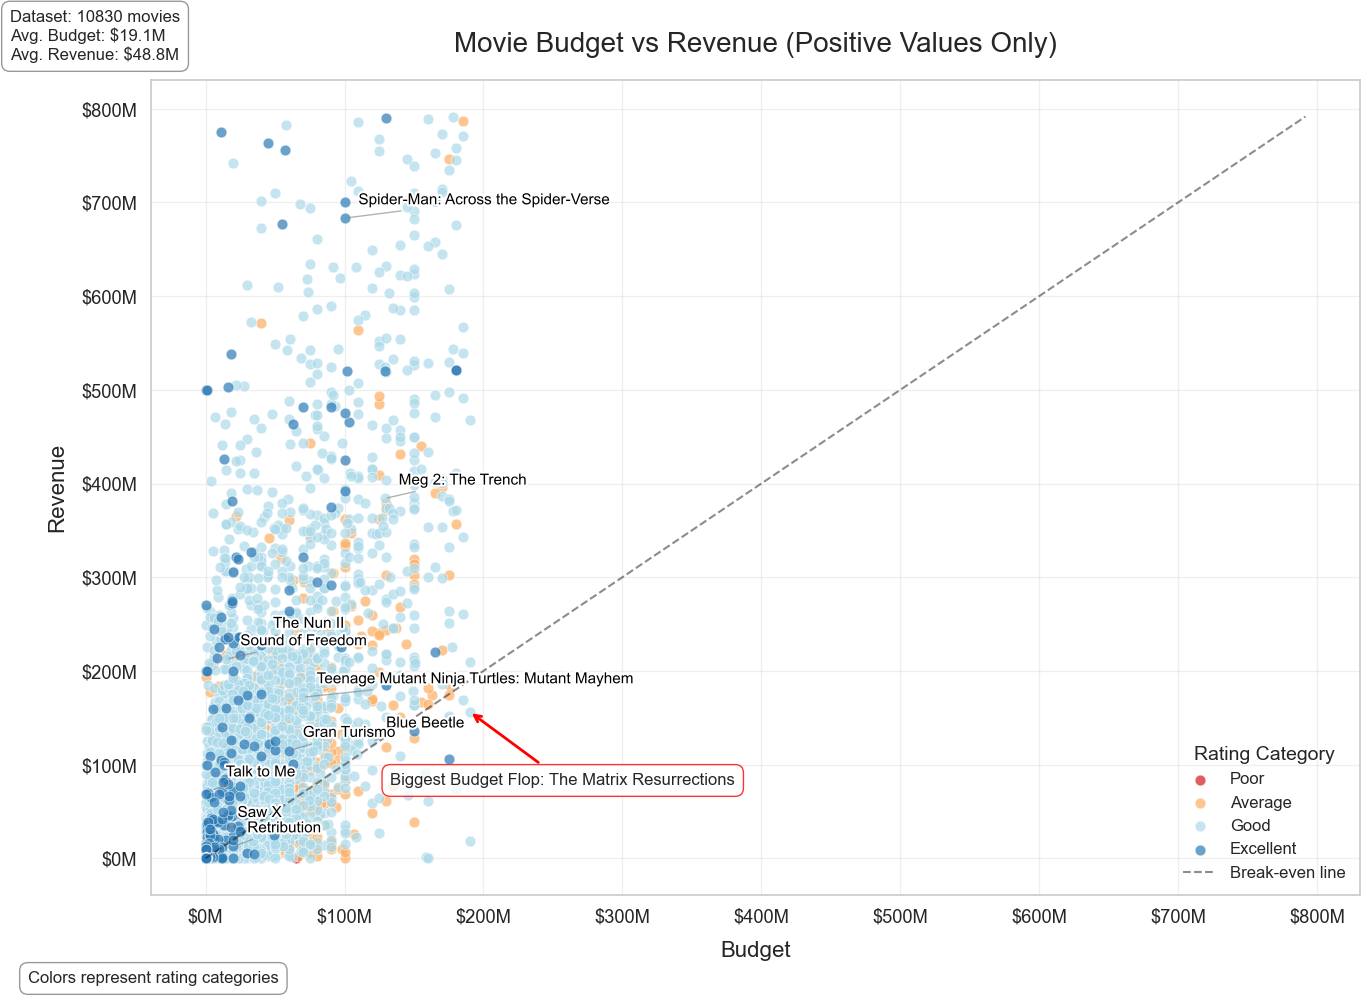

Total movies analyzed: 10830
Movies that made a profit (Revenue > Budget): 6868
Movies that lost money (Revenue < Budget): 3503

Average ROI by Rating Category:
rating_category
Excellent    67782.156848
Good         16454.307530
Poor          5775.742799
Average        937.464009
Name: roi, dtype: float64

Top 10 Most Profitable Movies:
                                           title     budget    revenue  \
49                                     Star Wars   11000000  775398007   
5                                       Deadpool   58000000  783100000   
7952                                      Ne Zha   20000000  742500000   
76                                 The Lion King   45000000  763455561   
261277                               Troglejuice   56950000  756000000   
85                                    Deadpool 2  110000000  785896609   
62                                            It   40000000  701800000   
362                  The Twilight Saga: New Moon   50000000  70982746

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import matplotlib.patheffects as pe

# Set the style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.2)

# Load the dataset
file_path = '/Users/jorgemartinez/Documents/NYDSAPythonProject /PythonProject1JorgeNYCDSA/TMDB_movie_dataset_v11.csv'
df = pd.read_csv(file_path)

# Data preparation
# Filter out rows with missing values, zero or negative budgets or revenues
df_filtered = df[(df['budget'] > 0) & (df['revenue'] > 0) & 
                  (~df['rating_category'].isna())]

# Cap extreme values for better visualization
budget_cap = df_filtered['budget'].quantile(0.99)
revenue_cap = df_filtered['revenue'].quantile(0.99)
df_viz = df_filtered[(df_filtered['budget'] <= budget_cap) & 
                     (df_filtered['revenue'] <= revenue_cap)]

# Create a color mapping for rating categories
rating_colors = {
    'Poor': '#d7191c',
    'Average': '#fdae61',
    'Good': '#abd9e9',
    'Excellent': '#2c7bb6'
}

# Create the figure and axis
plt.figure(figsize=(14, 10))

# Set a fixed marker size for all points instead of scaling by popularity
marker_size = 60

# Create a scatter plot
for rating in rating_colors:
    subset = df_viz[df_viz['rating_category'] == rating]
    plt.scatter(
        subset['budget'], 
        subset['revenue'],
        s=marker_size,  # Use the fixed size
        c=rating_colors[rating],
        alpha=0.7,
        edgecolor='white',
        linewidth=0.5,
        label=rating
    )

# Add a diagonal line representing break-even point (revenue = budget)
max_val = max(df_viz['budget'].max(), df_viz['revenue'].max())
plt.plot([0, max_val], [0, max_val], 'k--', alpha=0.5, label='Break-even line')

# Format the axes to show millions
def millions(x, pos):
    return f'${x/1000000:.0f}M'

formatter = FuncFormatter(millions)
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Add titles and labels
plt.title('Movie Budget vs Revenue (Positive Values Only)', fontsize=20, pad=20)
plt.xlabel('Budget', fontsize=16, labelpad=10)
plt.ylabel('Revenue', fontsize=16, labelpad=10)
plt.legend(title='Rating Category', fontsize=12, title_fontsize=14)

# Annotate some notable movies
top_movies = df_viz.sort_values('popularity', ascending=False).head(10)
for idx, movie in top_movies.iterrows():
    plt.annotate(
        movie['title'],
        xy=(movie['budget'], movie['revenue']),
        xytext=(10, 10),
        textcoords='offset points',
        fontsize=11,
        color='black',
        path_effects=[pe.withStroke(linewidth=3, foreground='white')],
        arrowprops=dict(arrowstyle='-', color='gray', alpha=0.6)
    )

# Add a grid for better readability
plt.grid(True, alpha=0.3)

# Update the annotation about bubble size
plt.annotate(
    'Colors represent rating categories',
    xy=(0.02, 0.02),
    xycoords='figure fraction',
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.5", fc="white", ec="gray", alpha=0.8)
)

# Calculate profit and ROI
df_viz['profit'] = df_viz['revenue'] - df_viz['budget']
df_viz['roi'] = df_viz['profit'] / df_viz['budget']



# Highlight high budget films that failed
money_losers = df_viz[(df_viz['budget'] > df_viz['budget'].quantile(0.75)) & 
                      (df_viz['revenue'] < df_viz['budget'])]
if not money_losers.empty:
    biggest_loser = money_losers.loc[money_losers['budget'].idxmax()]
    plt.annotate(
        f"Biggest Budget Flop: {biggest_loser['title']}",
        xy=(biggest_loser['budget'], biggest_loser['revenue']),
        xytext=(biggest_loser['budget'] * 0.7, biggest_loser['revenue'] * 0.5),
        arrowprops=dict(arrowstyle='->', color='red', lw=2),
        fontsize=12,
        bbox=dict(boxstyle="round,pad=0.5", fc="white", ec="red", alpha=0.8)
    )

# Add some statistics as text
plt.figtext(
    0.02, 0.95, 
    f"Dataset: {len(df_viz)} movies\n"
    f"Avg. Budget: ${df_viz['budget'].mean()/1000000:.1f}M\n"
    f"Avg. Revenue: ${df_viz['revenue'].mean()/1000000:.1f}M",
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.5", fc="white", ec="gray", alpha=0.8)
)

# Adjust layout and save
plt.tight_layout()
plt.savefig('budget_vs_revenue_positive_only.png', dpi=300, bbox_inches='tight')
plt.show()

# Print some additional insights
print(f"Total movies analyzed: {len(df_viz)}")
print(f"Movies that made a profit (Revenue > Budget): {(df_viz['revenue'] > df_viz['budget']).sum()}")
print(f"Movies that lost money (Revenue < Budget): {(df_viz['revenue'] < df_viz['budget']).sum()}")
print("\nAverage ROI by Rating Category:")
print(df_viz.groupby('rating_category')['roi'].mean().sort_values(ascending=False))

# Display top 10 most profitable movies
print("\nTop 10 Most Profitable Movies:")
top_profit = df_viz.sort_values('profit', ascending=False).head(10)
print(top_profit[['title', 'budget', 'revenue', 'profit', 'roi', 'rating_category']])

Below:
Most movies are here in this zoomed in version.
But visual is still quite crowded. Before you make you try to make any observations here.
In order to better visualize, I went ahead and did 4 separate visuals by category with the same dimensions below this..

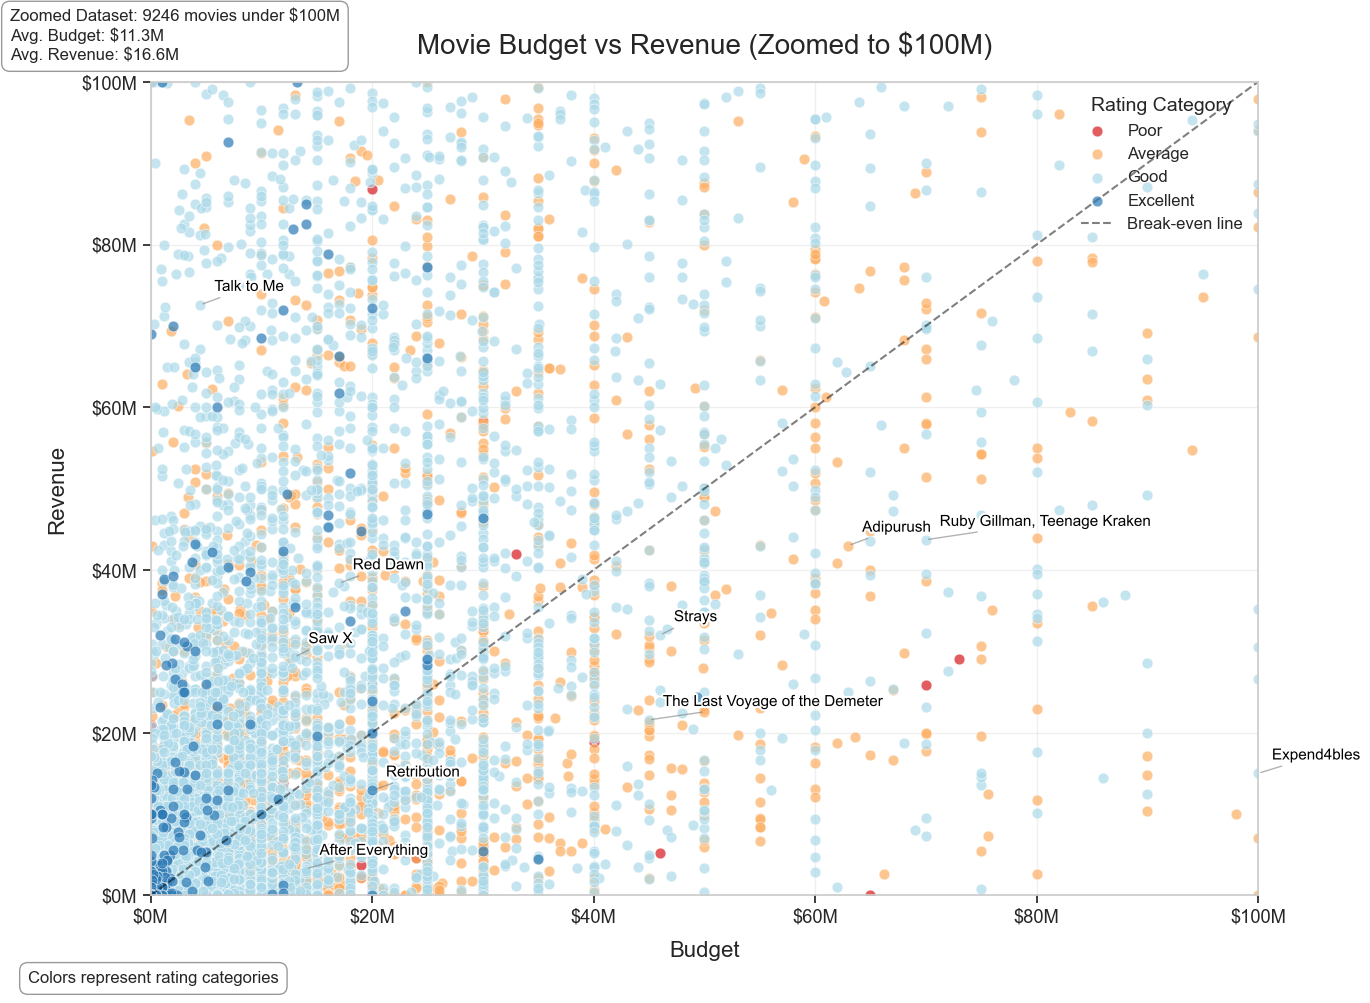

Total movies in zoomed view (<$100M): 9246
Movies that made a profit (Revenue > Budget): 5315
Movies that lost money (Revenue < Budget): 3472

Average ROI by Rating Category in zoomed view:
rating_category
Poor         5775.742799
Excellent    5115.773708
Good         1121.149560
Average      1021.906235
Name: roi, dtype: float64

Top 10 Most Profitable Movies under $100M:
                                 title   budget    revenue    profit  \
272395                        Khaltoor    15000  100000000  99985000   
14999                      Deep Throat    25000  100000000  99975000   
195586  Someone Wants to Talk with You   100000  100000000  99900000   
1101                           Mad Max   350000  100000000  99650000   
43641                         Taxiwala  1000000  100000000  99000000   
315664                      Rebimboc 2  1000000  100000000  99000000   
590                          Insidious  1500000   99870886  98370886   
4900                          The Jerk  4000000 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import matplotlib.patheffects as pe

# Set the style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.2)

# Load the dataset
file_path = '/Users/jorgemartinez/Documents/NYDSAPythonProject /PythonProject1JorgeNYCDSA/TMDB_movie_dataset_v11.csv'
df = pd.read_csv(file_path)

# Data preparation
# Filter out rows with missing values, zero budgets or revenues
df_filtered = df[(df['budget'] > 0) & (df['revenue'] > 0) & 
                  (~df['rating_category'].isna())]

# ZOOMED VIEW: Filter to only include movies with budget and revenue under 100 million
zoom_threshold = 100000000  # 100 million
df_viz = df_filtered[(df_filtered['budget'] <= zoom_threshold) & 
                     (df_filtered['revenue'] <= zoom_threshold)]

# Create a color mapping for rating categories
rating_colors = {
    'Poor': '#d7191c',
    'Average': '#fdae61',
    'Good': '#abd9e9',
    'Excellent': '#2c7bb6'
}

# Create the figure and axis
plt.figure(figsize=(14, 10))

# Set a fixed marker size for all points instead of scaling by popularity
marker_size = 60

# Create a scatter plot
for rating in rating_colors:
    subset = df_viz[df_viz['rating_category'] == rating]
    plt.scatter(
        subset['budget'], 
        subset['revenue'],
        s=marker_size,  # Use the fixed size
        c=rating_colors[rating],
        alpha=0.7,
        edgecolor='white',
        linewidth=0.5,
        label=rating
    )

# Add a diagonal line representing break-even point (revenue = budget)
plt.plot([0, zoom_threshold], [0, zoom_threshold], 'k--', alpha=0.5, label='Break-even line')

# Format the axes to show millions
def millions(x, pos):
    return f'${x/1000000:.0f}M'

formatter = FuncFormatter(millions)
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Set the axis limits explicitly to 100 million
plt.xlim(0, zoom_threshold)
plt.ylim(0, zoom_threshold)

# Add titles and labels
plt.title('Movie Budget vs Revenue (Zoomed to $100M)', fontsize=20, pad=20)
plt.xlabel('Budget', fontsize=16, labelpad=10)
plt.ylabel('Revenue', fontsize=16, labelpad=10)
plt.legend(title='Rating Category', fontsize=12, title_fontsize=14)

# Annotate some notable movies in this zoomed range
# Use top popularity but within this zoomed view
top_movies = df_viz.sort_values('popularity', ascending=False).head(10)
for idx, movie in top_movies.iterrows():
    plt.annotate(
        movie['title'],
        xy=(movie['budget'], movie['revenue']),
        xytext=(10, 10),
        textcoords='offset points',
        fontsize=11,
        color='black',
        path_effects=[pe.withStroke(linewidth=3, foreground='white')],
        arrowprops=dict(arrowstyle='-', color='gray', alpha=0.6)
    )

# Add a grid for better readability
plt.grid(True, alpha=0.3)

# Update the annotation about bubble size
plt.annotate(
    'Colors represent rating categories',
    xy=(0.02, 0.02),
    xycoords='figure fraction',
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.5", fc="white", ec="gray", alpha=0.8)
)

# ROI calculations and annotations
df_viz['roi'] = (df_viz['revenue'] - df_viz['budget']) / df_viz['budget']
df_viz['profit'] = df_viz['revenue'] - df_viz['budget']


# Highlight medium budget films that failed
money_losers = df_viz[(df_viz['budget'] > df_viz['budget'].quantile(0.75)) & 
                      (df_viz['revenue'] < df_viz['budget'])]
if not money_losers.empty:
    biggest_loser = money_losers.loc[money_losers['budget'].idxmax()]
    

# Add some statistics as text about the zoomed view
plt.figtext(
    0.02, 0.95, 
    f"Zoomed Dataset: {len(df_viz)} movies under $100M\n"
    f"Avg. Budget: ${df_viz['budget'].mean()/1000000:.1f}M\n"
    f"Avg. Revenue: ${df_viz['revenue'].mean()/1000000:.1f}M",
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.5", fc="white", ec="gray", alpha=0.8)
)

# Adjust layout and save
plt.tight_layout()
plt.savefig('zoomed_budget_vs_revenue.png', dpi=300, bbox_inches='tight')
plt.show()

# Print some additional insights about the zoomed dataset
print(f"Total movies in zoomed view (<$100M): {len(df_viz)}")
print(f"Movies that made a profit (Revenue > Budget): {(df_viz['revenue'] > df_viz['budget']).sum()}")
print(f"Movies that lost money (Revenue < Budget): {(df_viz['revenue'] < df_viz['budget']).sum()}")
print("\nAverage ROI by Rating Category in zoomed view:")
print(df_viz.groupby('rating_category')['roi'].mean().sort_values(ascending=False))

# Display top 10 most profitable movies in this zoomed range
print("\nTop 10 Most Profitable Movies under $100M:")
top_profit = df_viz.sort_values('profit', ascending=False).head(10)
print(top_profit[['title', 'budget', 'revenue', 'profit', 'roi', 'rating_category']])

Focus on growth from poor to excellent and uniqueness of excellent.

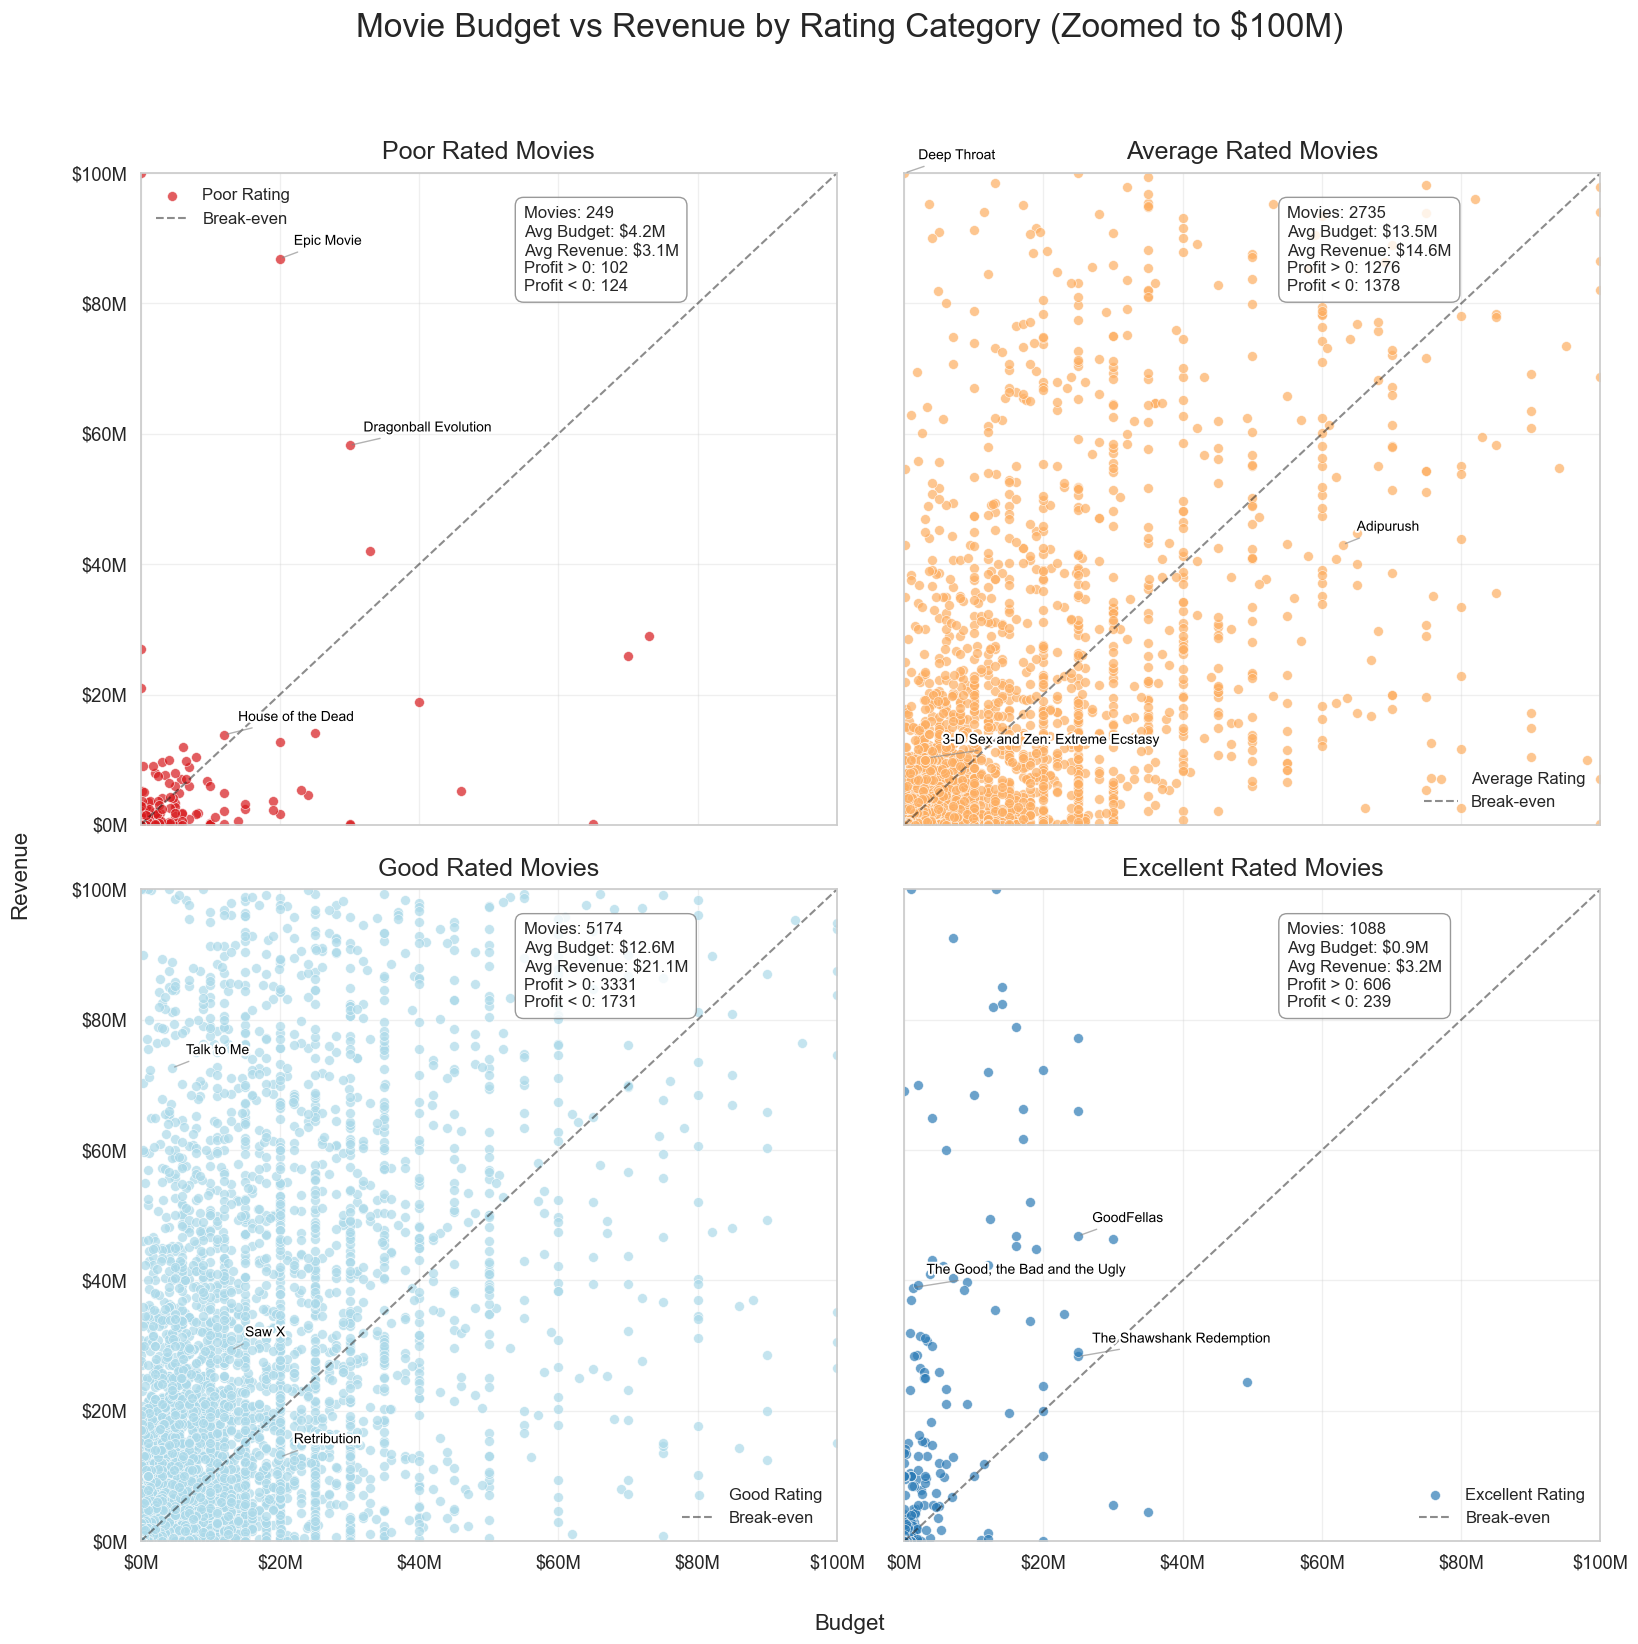

Total movies in zoomed view (<$100M): 9246

Breakdown by Rating Category:
Poor: 249 movies
Average: 2735 movies
Good: 5174 movies
Excellent: 1088 movies

Average ROI by Rating Category:
Poor: 5775.74x
Excellent: 5115.77x
Good: 1121.15x
Average: 1021.91x


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import matplotlib.patheffects as pe

# Set the style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.2)

# Load the dataset
file_path = '/Users/jorgemartinez/Documents/NYDSAPythonProject /PythonProject1JorgeNYCDSA/TMDB_movie_dataset_v11.csv'
df = pd.read_csv(file_path)

# Data preparation
# Filter out rows with missing values, zero budgets or revenues
df_filtered = df[(df['budget'] > 0) & (df['revenue'] > 0) & 
                  (~df['rating_category'].isna())]

# ZOOMED VIEW: Filter to only include movies with budget and revenue under 100 million
zoom_threshold = 100000000  # 100 million
df_viz = df_filtered[(df_filtered['budget'] <= zoom_threshold) & 
                     (df_filtered['revenue'] <= zoom_threshold)]

# Create a color mapping for rating categories
rating_colors = {
    'Poor': '#d7191c',
    'Average': '#fdae61',
    'Good': '#abd9e9',
    'Excellent': '#2c7bb6'
}

# Set a fixed marker size for all points
marker_size = 50  # Set a consistent size for all data points

# Calculate ROI for use in annotations
df_viz['roi'] = (df_viz['revenue'] - df_viz['budget']) / df_viz['budget']
df_viz['profit'] = df_viz['revenue'] - df_viz['budget']

# Set up a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 18), sharex=True, sharey=True)
axes = axes.flatten()  # Flatten to easily iterate

# Define a function for millions formatter
def millions(x, pos):
    return f'${x/1000000:.0f}M'

formatter = FuncFormatter(millions)

# Rating categories and their corresponding subplot positions
categories = ['Poor', 'Average', 'Good', 'Excellent']

# Create a subplot for each rating category
for i, category in enumerate(categories):
    ax = axes[i]
    
    # Filter to just this category
    category_data = df_viz[df_viz['rating_category'] == category]
    
    # Create the scatter plot for this category with fixed marker size
    scatter = ax.scatter(
        category_data['budget'], 
        category_data['revenue'],
        s=marker_size,  # Use the fixed marker size
        c=rating_colors[category],
        alpha=0.7,
        edgecolor='white',
        linewidth=0.5,
        label=category
    )
    
    # Add break-even line
    ax.plot([0, zoom_threshold], [0, zoom_threshold], 'k--', alpha=0.5, label='Break-even line')
    
    # Set title and format axes
    ax.set_title(f'{category} Rated Movies', fontsize=18, pad=10)
    ax.xaxis.set_major_formatter(formatter)
    ax.yaxis.set_major_formatter(formatter)
    
    # Set axis limits for zoom
    ax.set_xlim(0, zoom_threshold)
    ax.set_ylim(0, zoom_threshold)
    
    # Add grid
    ax.grid(True, alpha=0.3)
    
    # Add legend
    ax.legend([f'{category} Rating', 'Break-even'], fontsize=12)
    
    # Add some statistics as text
    stats_text = (
        f"Movies: {len(category_data)}\n"
        f"Avg Budget: ${category_data['budget'].mean()/1000000:.1f}M\n"
        f"Avg Revenue: ${category_data['revenue'].mean()/1000000:.1f}M\n"
        f"Profit > 0: {(category_data['revenue'] > category_data['budget']).sum()}\n"
        f"Profit < 0: {(category_data['revenue'] < category_data['budget']).sum()}"
    )
    ax.text(0.55, 0.95, stats_text, transform=ax.transAxes, fontsize=12, 
            verticalalignment='top', bbox=dict(boxstyle="round,pad=0.5", fc="white", ec="gray", alpha=0.8))
    
    # Annotate top 3 movies by popularity in this category
    top_movies = category_data.sort_values('popularity', ascending=False).head(3)
    for _, movie in top_movies.iterrows():
        ax.annotate(
            movie['title'],
            xy=(movie['budget'], movie['revenue']),
            xytext=(10, 10),
            textcoords='offset points',
            fontsize=10,
            color='black',
            path_effects=[pe.withStroke(linewidth=3, foreground='white')],
            arrowprops=dict(arrowstyle='-', color='gray', alpha=0.6)
        )
    
    # If there are movies in this category, annotate best ROI
    if not category_data.empty:
        try:
            best_roi = category_data.loc[category_data['roi'].idxmax()]
        except:
            pass

# Add common X and Y axis labels
fig.text(0.5, 0.08, 'Budget', ha='center', fontsize=16)
fig.text(0.08, 0.5, 'Revenue', va='center', rotation='vertical', fontsize=16)

# Add a super title for the whole figure
plt.suptitle('Movie Budget vs Revenue by Rating Category (Zoomed to $100M)', fontsize=24, y=0.98)

# Make sure subplots don't overlap
plt.tight_layout(rect=[0.1, 0.1, 0.9, 0.95])

plt.savefig('rating_categories_grid.png', dpi=300, bbox_inches='tight')
plt.show()

# Print some overall insights
print(f"Total movies in zoomed view (<$100M): {len(df_viz)}")
print("\nBreakdown by Rating Category:")
category_counts = df_viz['rating_category'].value_counts()
for category in categories:
    if category in category_counts:
        print(f"{category}: {category_counts[category]} movies")

print("\nAverage ROI by Rating Category:")
roi_by_category = df_viz.groupby('rating_category')['roi'].mean().sort_values(ascending=False)
for category in roi_by_category.index:
    print(f"{category}: {roi_by_category[category]:.2f}x")

/var/folders/m8/2_nz4r1s3r1_ghgs6pxgk9880000gn/T/ipykernel_96230/3305414505.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/m8/2_nz4r1s3r1_ghgs6pxgk9880000gn/T/ipykernel_96230/3305414505.py:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/m8/2_nz4r1s3r1_ghgs6pxgk9880000gn/T/ipykernel_96230/3305414505.py:38: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

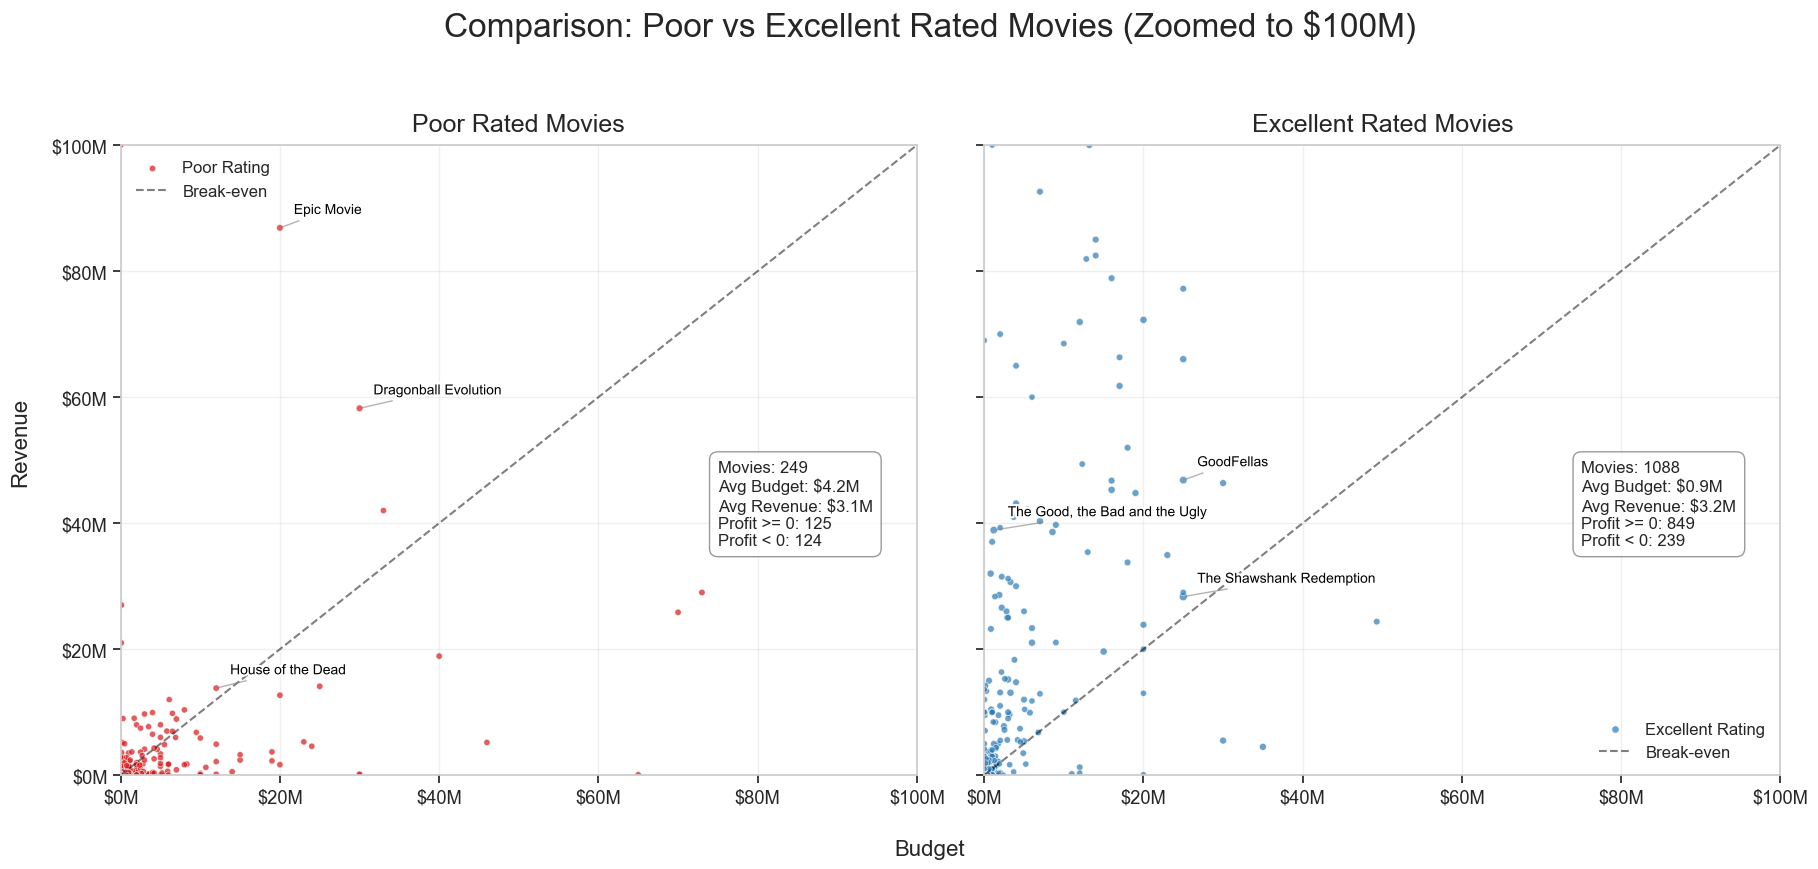

Total movies in zoomed view (<$100M): 9246

Breakdown by Selected Rating Categories:
Poor: 249 movies
Excellent: 1088 movies

Average ROI by Selected Rating Categories:
Poor: 5775.74x
Excellent: 5115.77x


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import matplotlib.patheffects as pe

# Set the style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.2)

# Load the dataset
file_path = '/Users/jorgemartinez/Documents/NYDSAPythonProject /PythonProject1JorgeNYCDSA/TMDB_movie_dataset_v11.csv'
df = pd.read_csv(file_path)

# Data preparation
# Filter out rows with missing values, zero budgets or revenues
df_filtered = df[(df['budget'] > 0) & (df['revenue'] > 0) & 
                  (~df['rating_category'].isna())]

# ZOOMED VIEW: Filter to only include movies with budget and revenue under 100 million
zoom_threshold = 100000000  # 100 million
df_viz = df_filtered[(df_filtered['budget'] <= zoom_threshold) & 
                     (df_filtered['revenue'] <= zoom_threshold)]

# Create a color mapping for rating categories
rating_colors = {
    'Poor': '#d7191c',
    'Excellent': '#2c7bb6'
}

# Pre-calculate marker sizes
max_popularity = df_viz['popularity'].max()
df_viz['marker_size'] = 20 + (df_viz['popularity'] / max_popularity) * 180

# Calculate ROI for use in annotations
df_viz['roi'] = (df_viz['revenue'] - df_viz['budget']) / df_viz['budget']
df_viz['profit'] = df_viz['revenue'] - df_viz['budget']

# Set up a 1x2 grid of subplots (only 2 categories now)
fig, axes = plt.subplots(1, 2, figsize=(20, 9), sharex=True, sharey=True)
axes = axes.flatten()  # Flatten to easily iterate

# Define a function for millions formatter
def millions(x, pos):
    return f'${x/1000000:.0f}M'

formatter = FuncFormatter(millions)

# Rating categories and their corresponding subplot positions
categories = ['Poor', 'Excellent']

# Create a subplot for each rating category
for i, category in enumerate(categories):
    ax = axes[i]
    
    # Filter to just this category
    category_data = df_viz[df_viz['rating_category'] == category]
    
    # Create the scatter plot for this category
    scatter = ax.scatter(
        category_data['budget'], 
        category_data['revenue'],
        s=category_data['marker_size'],
        c=rating_colors[category],
        alpha=0.7,
        edgecolor='white',
        linewidth=0.5,
        label=category
    )
    
    # Add break-even line
    ax.plot([0, zoom_threshold], [0, zoom_threshold], 'k--', alpha=0.5, label='Break-even line')
    
    # Set title and format axes
    ax.set_title(f'{category} Rated Movies', fontsize=18, pad=10)
    ax.xaxis.set_major_formatter(formatter)
    ax.yaxis.set_major_formatter(formatter)
    
    # Set axis limits for zoom
    ax.set_xlim(0, zoom_threshold)
    ax.set_ylim(0, zoom_threshold)
    
    # Add grid
    ax.grid(True, alpha=0.3)
    
    # Add legend
    ax.legend([f'{category} Rating', 'Break-even'], fontsize=12)
    
    # Add some statistics as text
    stats_text = (
        f"Movies: {len(category_data)}\n"
        f"Avg Budget: ${category_data['budget'].mean()/1000000:.1f}M\n"
        f"Avg Revenue: ${category_data['revenue'].mean()/1000000:.1f}M\n"
        f"Profit >= 0: {(category_data['revenue'] >= category_data['budget']).sum()}\n"
        f"Profit < 0: {(category_data['revenue'] < category_data['budget']).sum()}"
    )
    ax.text(0.75, 0.5, stats_text, transform=ax.transAxes, fontsize=12, 
            verticalalignment='top', bbox=dict(boxstyle="round,pad=0.5", fc="white", ec="gray", alpha=0.8))
    
    # Annotate top 3 movies by popularity in this category
    top_movies = category_data.sort_values('popularity', ascending=False).head(3)
    for _, movie in top_movies.iterrows():
        ax.annotate(
            movie['title'],
            xy=(movie['budget'], movie['revenue']),
            xytext=(10, 10),
            textcoords='offset points',
            fontsize=10,
            color='black',
            path_effects=[pe.withStroke(linewidth=3, foreground='white')],
            arrowprops=dict(arrowstyle='-', color='gray', alpha=0.6)
        )
    
    # If there are movies in this category, annotate best ROI
    if not category_data.empty:
        try:
            best_roi = category_data.loc[category_data['roi'].idxmax()]
        except:
            pass

# Add common X and Y axis labels
fig.text(0.5, 0.04, 'Budget', ha='center', fontsize=16)
fig.text(0.04, 0.5, 'Revenue', va='center', rotation='vertical', fontsize=16)

# Add a super title for the whole figure
plt.suptitle('Comparison: Poor vs Excellent Rated Movies (Zoomed to $100M)', fontsize=24, y=0.98)


# Make sure subplots don't overlap
plt.tight_layout(rect=[0.05, 0.07, 0.95, 0.95])

plt.savefig('poor_vs_excellent_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Print some overall insights
print(f"Total movies in zoomed view (<$100M): {len(df_viz)}")
print("\nBreakdown by Selected Rating Categories:")
for category in categories:
    count = len(df_viz[df_viz['rating_category'] == category])
    print(f"{category}: {count} movies")

print("\nAverage ROI by Selected Rating Categories:")
for category in categories:
    roi = df_viz[df_viz['rating_category'] == category]['roi'].mean()
    print(f"{category}: {roi:.2f}x")

This pattern suggests that excellent-rated films are more efficient with their money. They're able to produce higher-quality content with less budget, and the market responds positively to that quality, generating good revenue relative to what was spent.
Poor-rated films, on the other hand, seem to be throwing more money at productions that audiences don't respond well to. The higher budgets don't translate to better quality or audience reception, resulting in many of them failing to recoup their costs.
This illustrates an interesting phenomenon in filmmaking: higher budgets don't necessarily correlate with better quality. In fact, constraints sometimes force filmmakers to be more creative and focused, resulting in better-received films despite (or perhaps because of) lower budgets.

Below:
Focus on size of bubbles in relation to ROI.

Generating bubble plot visualizations for TMDB dataset...
Total movies meeting filtering criteria: 5538
Movies with budget > $1M and revenue > 0: 5538


Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


Saved visualization to production_companies_bubble_selective_font_log_log_color.png


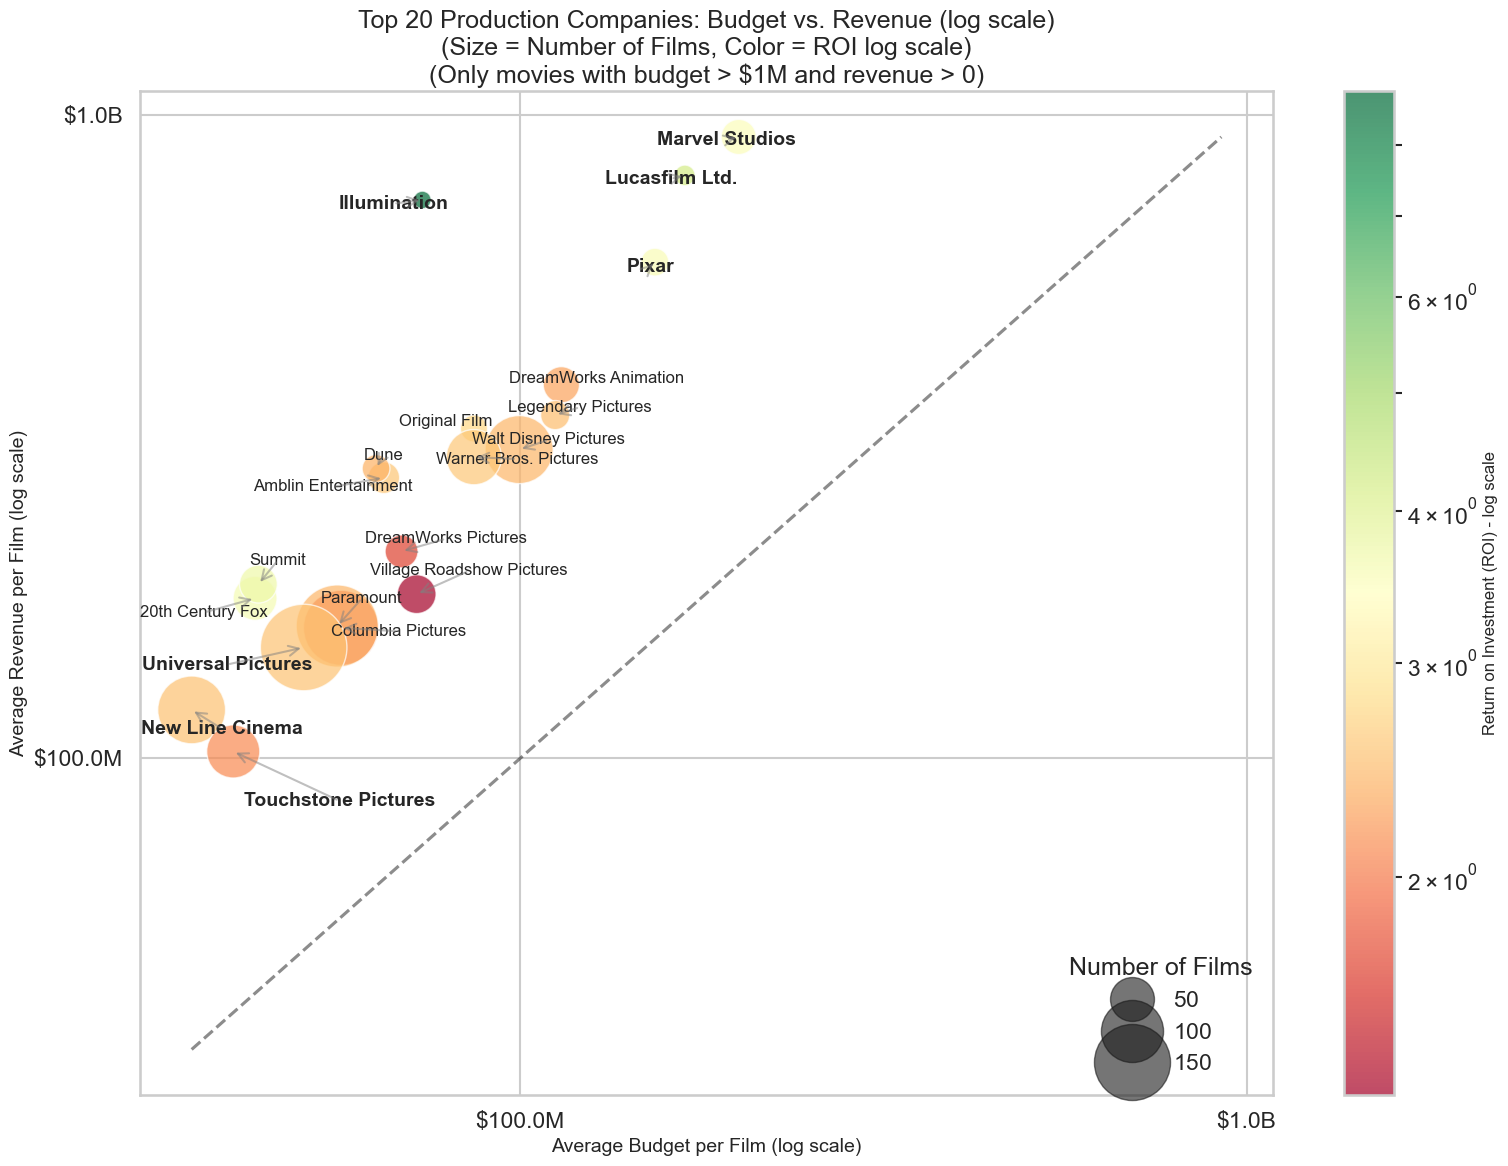

Production company bubble plots with selective font sizes completed!


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LinearSegmentedColormap, LogNorm
import matplotlib.ticker as ticker
from adjustText import adjust_text  # Import for non-overlapping labels

# Set the style for all visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("talk")

# Helper function to format large numbers
def format_currency(x, pos):
    if x >= 1e9:
        return f'${x/1e9:.1f}B'
    elif x >= 1e6:
        return f'${x/1e6:.1f}M'
    elif x >= 1e3:
        return f'${x/1e3:.1f}K'
    else:
        return f'${x:.0f}'

# Helper function to save plots with high quality
def save_plot(fig, filename, dpi=300):
    fig.savefig(filename, dpi=dpi, bbox_inches='tight')
    print(f"Saved visualization to {filename}")

# Modified Production Companies Bubble Chart with selective font sizes
def plot_production_companies_bubble(log_scale=True, log_color=True):
    # Extract first production company
    df['main_company'] = df['production_companies'].apply(
        lambda x: x.split(',')[0] if isinstance(x, str) and ',' in x else x
    )
    
    # Filter for movies with company information and significant metrics
    filtered_df = df[(df['main_company'].notnull()) & 
                     (df['main_company'] != '') &
                     (df['release_year'] >= 1990) &    # Focus on modern era
                     (df['budget'] > 1000000) &        # Only include movies with substantial budgets
                     (df['revenue'] > 0) &             # Ensure revenue > 0
                     (df['vote_count'] > 100)]         # Only include movies with significant votes
    
    # Print data quality statistics
    print(f"Total movies meeting filtering criteria: {len(filtered_df)}")
    print(f"Movies with budget > $1M and revenue > 0: {len(filtered_df)}")
    
    # Get top 20 companies by total revenue
    company_revenue = filtered_df.groupby('main_company')['revenue'].sum().reset_index()
    top_companies = company_revenue.sort_values('revenue', ascending=False).head(20)
    top_company_names = top_companies['main_company'].tolist()
    company_df = filtered_df[filtered_df['main_company'].isin(top_company_names)]
    
    # Group by company
    company_groups = company_df.groupby('main_company').agg({
        'budget': 'mean',
        'revenue': 'mean',
        'vote_average': 'mean',
        'roi': 'mean',
        'id': 'count'  # Number of movies
    }).reset_index()
    
    # Create the figure
    fig, ax = plt.subplots(figsize=(16, 12))
    
    # Create a color normalization based on ROI
    # Use LogNorm for logarithmic color scale if log_color is True
    if log_color:
        # Ensure all ROI values are positive for log scale
        min_roi = max(0.001, company_groups['roi'].min())  # Avoid zero or negative values
        norm = LogNorm(vmin=min_roi, vmax=company_groups['roi'].max())
        color_scale_type = "log"
    else:
        norm = plt.Normalize(company_groups['roi'].min(), company_groups['roi'].max())
        color_scale_type = "linear"
    
    # Create scatter plot
    scatter = ax.scatter(
        company_groups['budget'], 
        company_groups['revenue'], 
        s=company_groups['id'] * 20,  # Size based on number of films
        c=company_groups['roi'],       # Color based on ROI
        cmap='RdYlGn',                 # Red-Yellow-Green colormap
        alpha=0.7,
        edgecolors='white',
        linewidths=1,
        norm=norm                      # Apply the normalization
    )
    
    # List of companies with regular font size
    featured_companies = [
        'Marvel Studios', 
        'Illumination', 
        'Pixar', 
        'Lucasfilm Ltd.', 
        'Touchstone Pictures', 
        'New Line Cinema', 
        'Universal Pictures'
    ]
    
    # Create a mapping for company name replacements
    company_replacements = {
        'Summit Entertainment': 'Summit',
        'Dune Entertainment': 'Dune'
    }
    
    # Add annotations for each company with selective font sizing
    texts = []
    for _, row in company_groups.iterrows():
        # Get the company name with replacement if needed
        company_name = row['main_company']
        if company_name in company_replacements:
            display_name = company_replacements[company_name]
        else:
            display_name = company_name
            
        # Set font size based on whether it's a featured company
        if company_name in featured_companies:
            fontsize = 14  # Regular font size for featured companies
        else:
            fontsize = 12   # Smaller font size for non-featured companies
            
        text = ax.annotate(
            display_name,
            (row['budget'], row['revenue']),
            fontsize=fontsize,
            ha='center',
            va='center',
            fontweight='bold' if company_name in featured_companies else 'normal'
        )
        texts.append(text)
    
    # Use adjust_text with improved parameters for better label separation
    adjust_text(
        texts, 
        arrowprops=dict(arrowstyle='->', color='gray', alpha=0.5),
        expand_points=(1.2, 1.2),
        force_points=(0.5, 0.5),
        force_text=(0.5, 0.8)
    )
    
    # Customize the plot - set scale based on parameter
    if log_scale:
        ax.set_xscale('log')
        ax.set_yscale('log')
    
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_currency))
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_currency))
    
    # Add reference line for ROI = 1 (breakeven)
    min_val = min(company_groups['budget'].min(), company_groups['revenue'].min())
    max_val = max(company_groups['budget'].max(), company_groups['revenue'].max())
    x = np.linspace(min_val, max_val, 100)
    plt.plot(x, x, 'k--', alpha=0.5, label='Break-even Line')
    
    axis_scale_type = "log scale" if log_scale else "linear scale"
    plt.title(f'Top 20 Production Companies: Budget vs. Revenue ({axis_scale_type})\n(Size = Number of Films, Color = ROI {color_scale_type} scale)\n(Only movies with budget > $1M and revenue > 0)', fontsize=18)
    plt.xlabel(f'Average Budget per Film ({axis_scale_type})', fontsize=14)
    plt.ylabel(f'Average Revenue per Film ({axis_scale_type})', fontsize=14)
    plt.legend(loc='upper left')
    
    # Add a colorbar for ROI
    cbar = plt.colorbar(scatter)
    cbar.set_label(f'Return on Investment (ROI) - {color_scale_type} scale', fontsize=12)
    
    # Add size legend
    handles, labels = scatter.legend_elements(
        prop="sizes", 
        alpha=0.6, 
        num=4, 
        func=lambda s: s/20
    )
    size_legend = ax.legend(
        handles, labels, 
        loc="lower right", 
        title="Number of Films"
    )
    
    plt.tight_layout()
    axis_suffix = "log" if log_scale else "linear"
    color_suffix = "log_color" if log_color else "linear_color"
    save_plot(fig, f'production_companies_bubble_selective_font_{axis_suffix}_{color_suffix}.png')
    plt.show()

# Execute both versions of the plot
if __name__ == "__main__":
    print("Generating bubble plot visualizations for TMDB dataset...")
    
    # Load the dataset with the original file path
    file_path = '/Users/jorgemartinez/Documents/NYDSAPythonProject /PythonProject1JorgeNYCDSA/TMDB_movie_dataset_v11.csv'
    df = pd.read_csv(file_path, low_memory=False)
    
    # Add ROI calculation if not already in the dataset
    if 'roi' not in df.columns:
        df['roi'] = df['revenue'] / df['budget']
        
    # Run the version with log axes and log color scale
    plot_production_companies_bubble(log_scale=True, log_color=True)
    
    # Additional options you might want to run:
    # Log axes with linear color scale (original)
    # plot_production_companies_bubble(log_scale=True, log_color=False)
    
    # Linear axes with log color scale
    # plot_production_companies_bubble(log_scale=False, log_color=True)
    
    # Linear axes with linear color scale
    # plot_production_companies_bubble(log_scale=False, log_color=False)
    
    print("Production company bubble plots with selective font sizes completed!")

Below:
Discuss how contintents compare against each other and how this is a subset of the dataset because of missing values (50%)

Dataset loaded with 1200365 rows
After filtering: 655675 movies with production countries
Top 10 countries by movie production:
country_list
United States of America    199017
France                       46049
Japan                        44048
Germany                      43026
United Kingdom               42655
Canada                       25066
India                        21655
Italy                        19278
Brazil                       18130
Spain                        15792
Name: count, dtype: int64


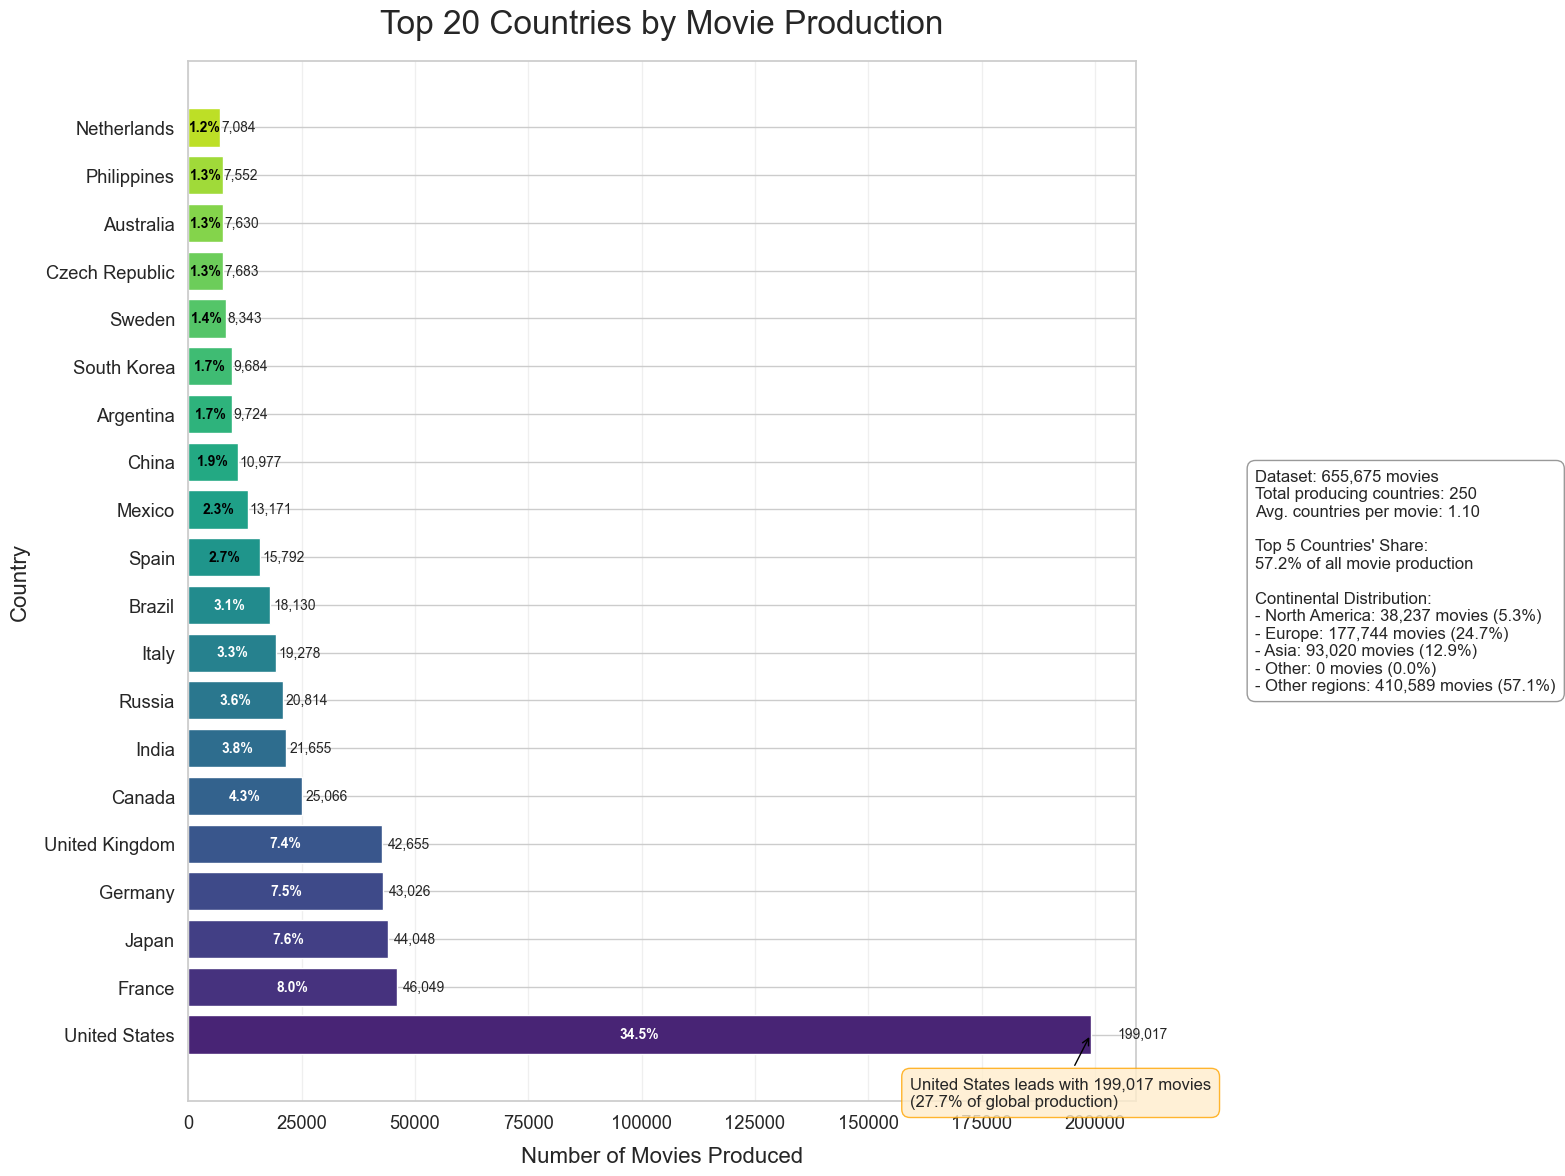

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import warnings
warnings.filterwarnings('ignore')

# Set the style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.2)

# Load the dataset
file_path = '/Users/jorgemartinez/Documents/NYDSAPythonProject /PythonProject1JorgeNYCDSA/TMDB_movie_dataset_v11.csv'
df = pd.read_csv(file_path)

# Print basic info for debugging
print(f"Dataset loaded with {df.shape[0]} rows")

# Process the production countries data
def extract_countries(country_str):
    """Extract countries from the production_countries string."""
    if pd.isna(country_str) or country_str == '':
        return []
    
    # Handle different formats of country string
    countries = []
    if ',' in country_str:
        # Simple comma-separated format
        countries = [c.strip() for c in country_str.split(',')]
    else:
        # Try to extract country names from the string
        countries = [country_str.strip()]
        
    return countries

# Apply the extraction function
df['country_list'] = df['production_countries'].apply(extract_countries)

# Filter data to include only movies with countries
df_filtered = df[df['country_list'].apply(len) > 0]
print(f"After filtering: {df_filtered.shape[0]} movies with production countries")

# Create an exploded dataframe with one row per movie-country pair
country_df = df_filtered.explode('country_list')
country_df = country_df[country_df['country_list'].notna() & (country_df['country_list'] != '')]

# Count movies by country
country_counts = country_df['country_list'].value_counts()
print("Top 10 countries by movie production:")
print(country_counts.head(10))

# Handle common country name inconsistencies
country_name_map = {
    'United States of America': 'United States',
    'USA': 'United States',
    'UK': 'United Kingdom',
    'Great Britain': 'United Kingdom',
    'Soviet Union': 'Russia',
}

# Create a dataframe for mapping
map_data = country_counts.reset_index()
map_data.columns = ['country', 'movie_count']

# Apply the name mapping
map_data['country'] = map_data['country'].replace(country_name_map)

# Combine duplicate countries after mapping
map_data = map_data.groupby('country').sum().reset_index()

# Get top 20 countries
top_countries = map_data.sort_values('movie_count', ascending=False).head(20)

# Create a figure with adjusted size and subplots
fig = plt.figure(figsize=(16, 12))

# Create a grid for the main plot and the stats box
gs = fig.add_gridspec(1, 2, width_ratios=[4, 1])  # 4:1 ratio for plot to stats

# Create the main plot in the first (larger) grid section
ax = fig.add_subplot(gs[0])

# Create a colormap
colors = plt.cm.viridis(np.linspace(0.1, 0.9, len(top_countries)))

# Plot bars with a color gradient
bars = ax.barh(
    y=top_countries['country'],
    width=top_countries['movie_count'],
    color=colors
)

# Calculate total movies for percentage
total_movies = sum(top_countries['movie_count'])

# Add percentage labels - FIXED POSITIONING
for i, bar in enumerate(bars):
    width = bar.get_width()
    percentage = (width / total_movies) * 100
    
    # Center the percentage text in the first 40% of the bar
    ax.text(
        width * 0.50,  # Position at 20% of bar width
        bar.get_y() + bar.get_height()/2,
        f"{percentage:.1f}%",
        va='center',
        ha='center',
        color='white' if i < len(top_countries)//2 else 'black',
        fontweight='bold',
        fontsize=10
    )

# Add data count labels - FIXED POSITIONING
for bar in bars:
    width = bar.get_width()
    ax.text(
        width + width*0.03,  # Increased spacing from the end of the bar
        bar.get_y() + bar.get_height()/2,
        f"{int(width):,}",
        va='center',
        fontsize=10
    )

# Set title and labels
ax.set_title('Top 20 Countries by Movie Production', fontsize=24, pad=20)
ax.set_xlabel('Number of Movies Produced', fontsize=16, labelpad=10)
ax.set_ylabel('Country', fontsize=16, labelpad=10)

# Add grid for better readability
ax.grid(axis='x', alpha=0.3)

# Annotate the top country
top_country = top_countries.iloc[0]['country']
top_count = top_countries.iloc[0]['movie_count']
ax.annotate(
    f"{top_country} leads with {int(top_count):,} movies\n({top_count/sum(map_data['movie_count'])*100:.1f}% of global production)",
    xy=(top_count, 0),
    xytext=(top_count*0.8, -1.5),
    fontsize=12,
    arrowprops=dict(arrowstyle="->", color='black'),
    bbox=dict(boxstyle="round,pad=0.5", fc="#ffedcc", ec="orange", alpha=0.8)
)

# Create statistics box content
total_movies = len(df_filtered)
total_countries = len(country_counts)
avg_countries_per_movie = df_filtered['country_list'].apply(len).mean()

stats_text = (
    f"Dataset: {total_movies:,} movies\n"
    f"Total producing countries: {total_countries}\n"
    f"Avg. countries per movie: {avg_countries_per_movie:.2f}\n\n"
    f"Top 5 Countries' Share:\n"
    f"{sum(country_counts.head(5))/total_movies*100:.1f}% of all movie production\n\n"
    f"Continental Distribution:\n"
)

# Define regions for top countries
regions = {
    'North America': ['United States', 'Canada', 'Mexico'],
    'Europe': ['United Kingdom', 'France', 'Germany', 'Italy', 'Spain', 'Russia'],
    'Asia': ['Japan', 'China', 'India', 'South Korea', 'Hong Kong'],
    'Other': []  # Catch-all
}

# Count by region for statistical analysis
region_counts = {}
for region, countries in regions.items():
    region_count = country_df[country_df['country_list'].isin(countries)].shape[0]
    region_counts[region] = region_count
    stats_text += f"- {region}: {region_count:,} movies ({region_count/len(country_df)*100:.1f}%)\n"

# Add other countries not explicitly listed
other_count = len(country_df) - sum(region_counts.values())
region_counts['Other'] = other_count
stats_text += f"- Other regions: {other_count:,} movies ({other_count/len(country_df)*100:.1f}%)"

# Create a separate subplot for the stats box
stats_ax = fig.add_subplot(gs[1])
stats_ax.axis('off')  # Turn off axes for this subplot
stats_ax.text(
    0.05, 0.5,  # Center the text in the stats box
    stats_text,
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.5", fc="white", ec="gray", alpha=0.8),
    va='center'  # Vertical alignment centered
)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Additional time-based analysis in a separate figure
if 'release_year' in df_filtered.columns:
    # Create decade column
    country_df['decade'] = (country_df['release_year'] // 10) * 10
    
    # Define major regions for analysis
    def assign_region(country):
        for region, countries in regions.items():
            if country in countries:
                return region
        return 'Other'
    
    country_df['region'] = country_df['country_list'].apply(assign_region)
    
    # Count movies by decade and region
    decade_region = country_df.groupby(['decade', 'region']).size().unstack(fill_value=0)
    
    # Filter to decades with sufficient data
    decade_region = decade_region.loc[decade_region.sum(axis=1) > 100]
    
    # Create a stacked bar chart in a new figure
    plt.figure(figsize=(15, 8))
    decade_region.plot(kind='bar', stacked=True, figsize=(15, 8))
    plt.title('Movie Production by Region Over Time', fontsize=18)
    plt.xlabel('Decade', fontsize=14)
    plt.ylabel('Number of Movies', fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)
    plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Add annotations for key trends
    plt.figtext(
        0.75, 0.15, 
        "Key Observations:\n\n"
        "- US dominance began declining after 1990s\n"
        "- Asian cinema saw significant growth after 2000\n"
        "- European production remained stable\n"
        "- Global diversification increasing in recent decades",
        fontsize=11,
        bbox=dict(boxstyle="round,pad=0.5", fc="white", ec="gray", alpha=0.8)
    )
    
    plt.tight_layout()
    plt.savefig('region_production_by_decade.png', dpi=300)

# Save the main figure
plt.figure(fig.number)  # Make sure we're working with the first figure
plt.savefig('top_countries_movie_production.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [ ]:
import pandas as pd
import plotly.express as px
import pycountry
import pycountry_convert
from collections import Counter
from plotly.offline import plot
import warnings
warnings.filterwarnings('ignore')

# Configure matplotlib for VSCode output
%matplotlib inline

# Define file path
file_path = '/Users/jorgemartinez/Documents/NYDSAPythonProject /PythonProject1JorgeNYCDSA/TMDB_movie_dataset_v11.csv'

def load_movie_data(file_path):
    """Load the movie dataset with production country information."""
    print("Loading dataset...")
    
    # Load only required columns to save memory
    columns_to_load = ['id', 'title', 'production_countries', 'release_year', 'budget', 'revenue']
    
    # Read CSV with specified columns
    df = pd.read_csv(file_path, usecols=columns_to_load)
    
    # Remove rows with missing production_countries
    df = df[df['production_countries'].notna() & (df['production_countries'] != '')]
    
    print(f"Dataset loaded: {df.shape[0]} movies with production country information")
    return df

def extract_countries(df):
    """Extract and count production countries from the dataset."""
    print("Extracting countries from dataset...")
    
    # Function to extract countries from production_countries string
    def extract_country_names(country_string):
        if pd.isna(country_string) or country_string == '':
            return []
        
        # Split by comma and clean up
        countries = [c.strip() for c in country_string.split(',')]
        return countries
    
    # Apply extraction function
    df['country_list'] = df['production_countries'].apply(extract_country_names)
    
    # Flatten the list of countries and count occurrences
    all_countries = []
    for countries in df['country_list']:
        all_countries.extend(countries)
    
    country_counts = Counter(all_countries)
    
    # Convert to DataFrame for easier manipulation
    country_df = pd.DataFrame.from_dict(country_counts, orient='index', columns=['movie_count'])
    country_df = country_df.reset_index().rename(columns={'index': 'country'})
    country_df = country_df.sort_values('movie_count', ascending=False)
    
    print(f"Extracted {len(country_df)} unique production countries")
    return country_df

def map_country_codes(country_df):
    """Map country names to ISO-3 codes for visualization."""
    print("Mapping country names to ISO codes...")
    
    # Create mapping dictionary from pycountry with case-insensitive matching
    country_map = {}
    for country in pycountry.countries:
        # Add standard name (both normal and lowercase)
        country_map[country.name] = country.alpha_3
        country_map[country.name.lower()] = country.alpha_3
        
        # Add common name variants if available
        if hasattr(country, 'common_name'):
            country_map[country.common_name] = country.alpha_3
            country_map[country.common_name.lower()] = country.alpha_3
        
        # Add official name if available
        if hasattr(country, 'official_name'):
            country_map[country.official_name] = country.alpha_3
            country_map[country.official_name.lower()] = country.alpha_3
    
    # Add manual mappings for common name variations and previously unmapped countries
    manual_mappings = {
        'United States of America': 'USA',
        'United States': 'USA',
        'USA': 'USA',
        'UK': 'GBR',
        'United Kingdom': 'GBR',
        'Russia': 'RUS',
        'South Korea': 'KOR',
        'Czech Republic': 'CZE',
        'Taiwan': 'TWN', 
        'Iran': 'IRN',
        'Vietnam': 'VNM',
        'Venezuela': 'VEN',
        'Bahamas': 'BHS',
        'Bolivia': 'BOL',
        'Bosnia and Herzegovina': 'BIH',
        'Burma': 'MMR',  # Myanmar
        'Congo': 'COG',
        'Palestinian Territory': 'PSE',
        'Vatican City': 'VAT',
        'East Germany': 'DEU',  # Map to Germany
        'West Germany': 'DEU',  # Map to Germany
        'Yugoslavia': 'SRB',    # Default to Serbia
        'Soviet Union': 'RUS',  # Map to Russia
        'Hong Kong': 'HKG',
        'Czechoslovakia': 'CZE', # Map to Czech Republic
        
        # Adding previously unmapped countries
        'Turkey': 'TUR',
        'turkey': 'TUR',
        'Macedonia': 'MKD',
        'Kosovo': 'XKX',  # XKX is sometimes used for Kosovo
        'Serbia and Montenegro': 'SCG',  # Historical country code
        'Northern Ireland': 'GBR',  # Part of the UK
        "Cote D'Ivoire": 'CIV',
        'Cape Verde': 'CPV',
        'Faeroe Islands': 'FRO',
        'Libyan Arab Jamahiriya': 'LBY',  # Old name for Libya
        'Reunion': 'REU',
        'Guadaloupe': 'GLP',
        'Netherlands Antilles': 'ANT',  # Historical country code
        'Swaziland': 'SWZ',  # Now Eswatini
        'St. Lucia': 'LCA',
        'US Virgin Islands': 'VIR',
        'Holy See': 'VAT',  # Vatican
        'Svalbard & Jan Mayen Islands': 'SJM',
        'St. Vincent and the Grenadines': 'VCT',
        'Micronesia': 'FSM',
        'St. Kitts and Nevis': 'KNA',
        'St. Helena': 'SHN',
        'Falkland Islands': 'FLK',
        'St. Pierre and Miquelon': 'SPM',
        'Wallis and Futuna Islands': 'WLF',
        'Heard and McDonald Islands': 'HMD',
        'Pitcairn Island': 'PCN',
        'Zaire': 'COD',  # Now Democratic Republic of the Congo
        'East Timor': 'TLS',  # Now Timor-Leste
        'Cocos Islands': 'CCK',
        'Cocos  Islands': 'CCK',  # Note the double space in the original error
        
        # Adding more mappings for historical and special territories
        'Serbia': 'SRB',
        'Croatia': 'HRV',
        'Estonia': 'EST',
        'Slovenia': 'SVN',
        'Slovakia': 'SVK',
        'Latvia': 'LVA',
        'Lithuania': 'LTU',
        'Georgia': 'GEO',
        'Belarus': 'BLR',
        'Luxembourg': 'LUX',
        'Puerto Rico': 'PRI',
        'Bangladesh': 'BGD',
        'Lebanon': 'LBN',
        'Iceland': 'ISL',
        'Bosnia and Herzegovina': 'BIH',
        
        # Explicitly mapping the 5 territories from the chart
        'United States Minor Outlying Islands': 'UMI',
        'Antarctica': 'ATA',
        'Western Sahara': 'ESH',
        'French Southern Territories': 'ATF',
        'Pitcairn Island': 'PCN'
    }
    
    # Update mapping with manual entries
    country_map.update(manual_mappings)
    
    # Function to try case-insensitive matching as a fallback
    def get_iso_code(country_name):
        # Try direct lookup
        if country_name in country_map:
            return country_map[country_name]
        
        # Try lowercase
        if country_name.lower() in country_map:
            return country_map[country_name.lower()]
        
        # If country is "Missing" or similar, skip
        if country_name == "Missing":
            return None
            
        return None
    
    # Apply mapping to get ISO codes
    country_df['iso_alpha_3'] = country_df['country'].apply(get_iso_code)
    
    # Check for unmapped countries
    unmapped = country_df[country_df['iso_alpha_3'].isna()]
    if len(unmapped) > 0:
        print(f"Warning: Could not map {len(unmapped)} countries to ISO codes:")
        print(unmapped['country'].tolist())
    
    # Drop rows with missing ISO codes
    country_df = country_df.dropna(subset=['iso_alpha_3'])
    
    return country_df

def get_country_continent(country_name, iso_code):
    """Map country to continent using pycountry_convert and manual mappings."""
    # Manual continent mapping for historical/special countries
    historical_continent_map = {
        'Soviet Union': 'Europe',
        'Czechoslovakia': 'Europe',
        'Yugoslavia': 'Europe',
        'East Germany': 'Europe',
        'West Germany': 'Europe',
        'Serbia and Montenegro': 'Europe',
        'Zaire': 'Africa',
        'Netherlands Antilles': 'North America',  # Caribbean
        'US Virgin Islands': 'North America',     # Caribbean
        'Puerto Rico': 'North America',           # Caribbean
        'Palestine': 'Asia',
        'Palestinian Territory': 'Asia',
        'Holy See': 'Europe',                     # Vatican
        'Vatican City': 'Europe',
        'Kosovo': 'Europe',
        'East Timor': 'Asia',
        
        # Manually placing the 5 territories from the chart
        'United States Minor Outlying Islands': 'Oceania', # Placing in Oceania as they're Pacific islands
        'Antarctica': 'Antarctica',               # Keeping Antarctica as its own continent
        'Western Sahara': 'Africa',               # Western Sahara is in Africa
        'French Southern Territories': 'Antarctica', # These are subantarctic islands
        'Pitcairn Island': 'Oceania'              # Pitcairn Island is in the Pacific
    }
    
    # Check manual mapping first for historical countries
    if country_name in historical_continent_map:
        return historical_continent_map[country_name]
    
    # Try using pycountry_convert for standard countries
    try:
        if iso_code:
            # Get continent code using ISO alpha-2 if possible
            country_alpha2 = pycountry.countries.get(alpha_3=iso_code).alpha_2
            continent_code = pycountry_convert.country_alpha2_to_continent_code(country_alpha2)
            continent_name = pycountry_convert.convert_continent_code_to_continent_name(continent_code)
            return continent_name
    except (KeyError, AttributeError):
        pass
    
    # Fallback manual mappings for common regions by ISO code
    iso_continent_map = {
        'HKG': 'Asia',       # Hong Kong
        'TWN': 'Asia',       # Taiwan
        'XKX': 'Europe',     # Kosovo
        'PSE': 'Asia',       # Palestine
        'VAT': 'Europe',     # Vatican
        'PRI': 'North America', # Puerto Rico
        'GLP': 'North America', # Guadeloupe
        'MTQ': 'North America', # Martinique
        'REU': 'Africa',     # Réunion
        'GUF': 'South America', # French Guiana
        'ANT': 'North America', # Netherlands Antilles
        'SJM': 'Europe',     # Svalbard & Jan Mayen
        'FRO': 'Europe',     # Faroe Islands
        'SCG': 'Europe',     # Serbia and Montenegro
        'TLS': 'Asia',       # Timor-Leste/East Timor
        'VIR': 'North America', # US Virgin Islands
        'UMI': 'Oceania',    # US Minor Outlying Islands
        'ATA': 'Antarctica', # Antarctica
        'ESH': 'Africa',     # Western Sahara
        'ATF': 'Antarctica', # French Southern Territories
        'PCN': 'Oceania'     # Pitcairn Island
    }
    
    if iso_code in iso_continent_map:
        return iso_continent_map[iso_code]
    
    # If still not mapped, return "Other" (should be very few or none now)
    return "Other"

def create_regional_distribution(country_df):
    """Create a treemap of movie production by region using automatic continent mapping."""
    print("\nAnalyzing regional distribution of movie production...")
    
    # Apply the continent mapping function to each country
    country_df['region'] = country_df.apply(
        lambda row: get_country_continent(row['country'], row['iso_alpha_3']), 
        axis=1
    )
    
    # Rename 'North America' and 'South America' to consistent terminology
    region_rename = {
        'North America': 'North America',
        'South America': 'Latin America',
        'Central America': 'Latin America',
        'Caribbean': 'Latin America'
    }
    
    # Apply region name standardization
    for old_name, new_name in region_rename.items():
        country_df.loc[country_df['region'] == old_name, 'region'] = new_name
    
    # Also include Caribbean countries in Latin America
    caribbean_countries = [
        'Jamaica', 'Bahamas', 'Cuba', 'Dominican Republic', 'Haiti', 
        'Trinidad and Tobago', 'St. Lucia', 'Barbados', 'Grenada',
        'St. Vincent and the Grenadines', 'St. Kitts and Nevis'
    ]
    country_df.loc[country_df['country'].isin(caribbean_countries), 'region'] = 'Latin America'
    
    # Aggregate data by region
    region_counts = country_df.groupby('region')['movie_count'].sum().reset_index()
    region_counts = region_counts.sort_values('movie_count', ascending=False)
    
    # Create a treemap
    fig = px.treemap(
        region_counts,
        path=['region'],
        values='movie_count',
        color='movie_count',
        color_continuous_scale='Viridis',
        title='Regional Distribution of Movie Production'
    )
    
    # Customize layout with larger fonts
    fig.update_layout(
        margin=dict(l=0, r=0, t=50, b=0),
        height=600,
        title=dict(
            text='Regional Distribution of Movie Production',
            font=dict(size=24)  # Larger title font
        ),
        font=dict(
            family="Arial, sans-serif",
            size=18,  # Larger base font size for all text
            color="black"
        )
    )
    
    # Increase size of treemap text
    fig.update_traces(
        textinfo='label+value+percent root',
        textfont=dict(size=40),  # Larger font for the text inside treemap boxes
        hovertemplate='<b>%{label}</b><br>Movies: %{value}<br>Percentage: %{percentRoot:.1%}<extra></extra>'
    )
    
    # Save and display
    plot(fig, filename='regional_movie_production.html', auto_open=False)
    fig.show()
    
    # Check if 'Other' category exists and print info if needed
    other_countries = country_df[country_df['region'] == 'Other']
    if len(other_countries) > 0:
        print(f"\nNote: {len(other_countries)} countries remain in the 'Other' category.")
        print("Top countries in 'Other' category:")
        for _, row in other_countries.head(5).iterrows():
            print(f"  - {row['country']}: {row['movie_count']} movies")
    else:
        print("\nAll countries have been successfully mapped to regions!")
    
    return region_counts

def main():
    """Main function to run the analysis."""
    # Load data
    df = load_movie_data(file_path)
    
    # Extract production countries
    country_df = extract_countries(df)
    
    # Map country codes for visualization
    country_df = map_country_codes(country_df)
    
    # Create only the treemap visualization (removed choropleth)
    create_regional_distribution(country_df)
    
    print("\nAnalysis complete! Treemap visualization has been displayed and saved.")

if __name__ == "__main__":
    main()

Loading dataset...
Dataset loaded: 655675 movies with production country information
Extracting countries from dataset...
Extracted 250 unique production countries
Mapping country names to ISO codes...

Analyzing regional distribution of movie production...



All countries have been successfully mapped to regions!

Analysis complete! Treemap visualization has been displayed and saved.


Below: 
ROI of 1.0 means a 100% return on investment. If you invested $100 million in a movie, you got back your $100 million plus another $100 million in profit (total revenue of $200 million).
ROI of 0.0 represents breaking even - you got back exactly what you invested with no profit or loss.
ROI of 2.0 means a 300% return (you tripled your money).
Negative ROI values mean the movie lost money.

Generating ROI by country visualization...
Saved visualization to roi_by_country.png

ROI Breakdown by country (top 10):
United States of America: 4242 movies, Average ROI: 13.69x
Japan: 128 movies, Average ROI: 9.95x
India: 125 movies, Average ROI: 8.51x
Australia: 125 movies, Average ROI: 5.11x
United Kingdom: 503 movies, Average ROI: 4.00x
China: 114 movies, Average ROI: 3.42x
France: 405 movies, Average ROI: 2.53x
Canada: 349 movies, Average ROI: 2.20x
Germany: 231 movies, Average ROI: 1.70x
Belgium: 105 movies, Average ROI: 0.40x


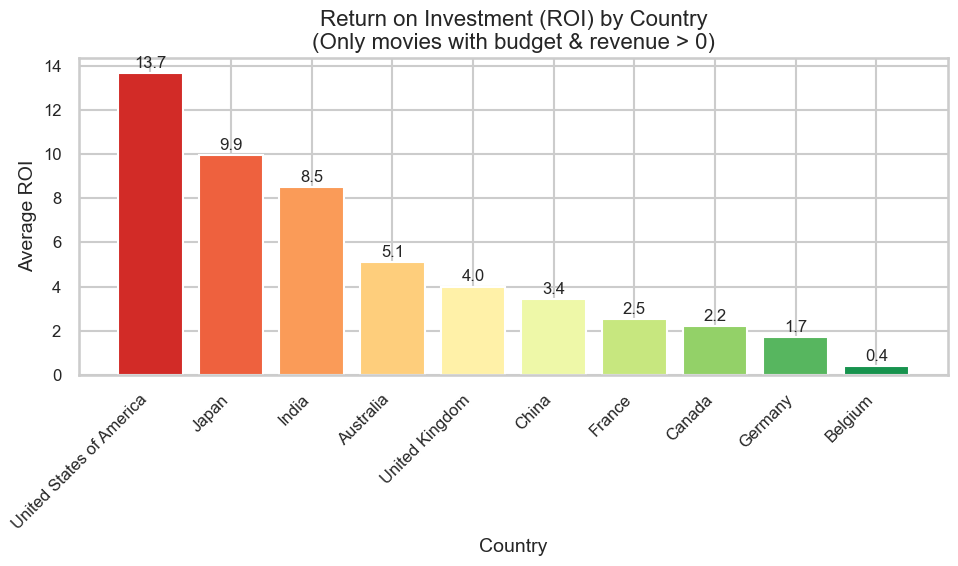

Visualization completed!


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Set the style for all visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("talk")

# Helper function to save plots with high quality
def save_plot(fig, filename, dpi=300):
    fig.savefig(filename, dpi=dpi, bbox_inches='tight')
    print(f"Saved visualization to {filename}")

# Load the dataset
file_path = 'tmdb_featured_dataset.csv'  # Update with your path
df = pd.read_csv(file_path, low_memory=False)

def plot_roi_by_country():
    # Extract first production country
    df['main_country'] = df['production_countries'].apply(
        lambda x: x.split(',')[0] if isinstance(x, str) and ',' in x else x
    )
    
    # Filter for movies with country information, reasonable metrics, 
    # AND BOTH budget and revenue greater than 0
    filtered_df = df[(df['main_country'].notnull()) & 
                     (df['main_country'] != '') &
                     (df['vote_average'] > 0) &
                     (df['vote_count'] > 100) &  
                     (df['budget'] > 0) &         # Ensure budget > 0
                     (df['revenue'] > 0)]         # Ensure revenue > 0
    
    # Get top 10 countries by number of movies
    top_countries = filtered_df['main_country'].value_counts().head(10).index.tolist()
    country_df = filtered_df[filtered_df['main_country'].isin(top_countries)]
    
    # Group by country
    country_groups = country_df.groupby('main_country').agg({
        'vote_average': 'mean',
        'roi': 'mean',
        'id': 'count'
    }).reset_index()
    
    # Create figure
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # ROI comparison plot
    country_groups_sorted = country_groups.sort_values('roi', ascending=False)
    bars = ax.bar(
        country_groups_sorted['main_country'],
        country_groups_sorted['roi'],
        color=sns.color_palette("RdYlGn", len(country_groups))
    )
    
    # Add value labels on top of the bars
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2.,
            height + 0.1,
            f'{height:.1f}',
            ha='center', 
            va='bottom',
            rotation=0,
            fontsize=12
        )
    
    ax.set_title('Return on Investment (ROI) by Country\n(Only movies with budget & revenue > 0)', fontsize=16)
    ax.set_xlabel('Country', fontsize=14)
    ax.set_ylabel('Average ROI', fontsize=14)
    ax.set_xticklabels(country_groups_sorted['main_country'], rotation=45, ha='right', fontsize=12)
    ax.tick_params(axis='y', labelsize=12)
    
    # Adjust layout
    plt.tight_layout()
    save_plot(fig, 'roi_by_country.png')
    
    # Print some statistics
    print("\nROI Breakdown by country (top 10):")
    for country in country_groups_sorted['main_country']:
        count = len(country_df[country_df['main_country'] == country])
        roi = country_df[country_df['main_country'] == country]['roi'].mean()
        print(f"{country}: {count} movies, Average ROI: {roi:.2f}x")
    
    plt.show()

# Execute the visualization
if __name__ == "__main__":
    print("Generating ROI by country visualization...")
    plot_roi_by_country()
    print("Visualization completed!")

Below:
Consistent activity across continents after 1970s
Soviet Union breakdown

In [124]:
!pip install pycountry_convert

  Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
Using cached wheel-0.45.1-py3-none-any.whl (72 kB)

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


Below: These filters are used: 

Movies with valid country information:

df['main_country'].notnull() - Filters out movies with null country values
df['main_country'] != '' - Filters out movies with empty country strings


Movies with meaningful ratings:

df['vote_average'] > 0 - Filters out movies with zero or negative ratings
df['vote_count'] > 100 - Only includes movies with at least 100 votes (ensuring ratings are statistically significant)


Movies with financial data:

df['budget'] > 0 - Only includes movies with positive budget values
df['revenue'] > 0 - Only includes movies with positive revenue values

Generating movie count and rating visualization...
Saved visualization to movie_count_rating_by_country.png
Total movies with budget > 0 and revenue > 0: 7054

Breakdown by country (top 10):
United States of America: 4242 movies, Average Rating: 6.49
United Kingdom: 503 movies, Average Rating: 6.73
France: 405 movies, Average Rating: 6.66
Canada: 349 movies, Average Rating: 6.25
Germany: 231 movies, Average Rating: 6.42
Japan: 128 movies, Average Rating: 6.94
India: 125 movies, Average Rating: 6.96
Australia: 125 movies, Average Rating: 6.48
China: 114 movies, Average Rating: 6.66
Belgium: 105 movies, Average Rating: 6.64


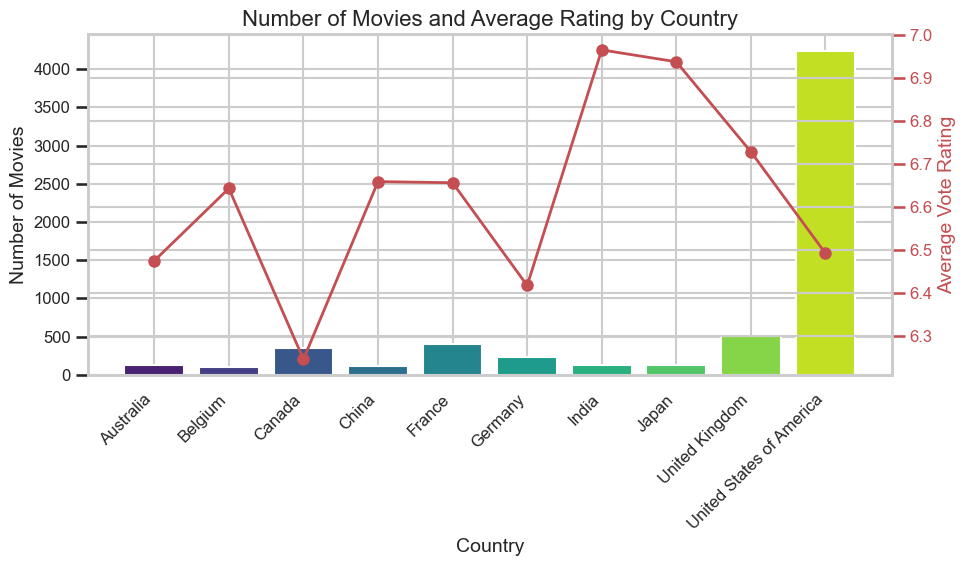

Visualization completed!


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Set the style for all visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("talk")

# Helper function to format large numbers
def format_currency(x, pos):
    if x >= 1e9:
        return f'${x/1e9:.1f}B'
    elif x >= 1e6:
        return f'${x/1e6:.1f}M'
    elif x >= 1e3:
        return f'${x/1e3:.1f}K'
    else:
        return f'${x:.0f}'

# Helper function to save plots with high quality
def save_plot(fig, filename, dpi=300):
    fig.savefig(filename, dpi=dpi, bbox_inches='tight')
    print(f"Saved visualization to {filename}")

# Load the dataset
file_path = 'tmdb_featured_dataset.csv'  # Update with your path
df = pd.read_csv(file_path, low_memory=False)

def plot_movie_count_rating():
    # Extract first production country
    df['main_country'] = df['production_countries'].apply(
        lambda x: x.split(',')[0] if isinstance(x, str) and ',' in x else x
    )
    
    # Filter for movies with country information, reasonable metrics, 
    # AND BOTH budget and revenue greater than 0
    filtered_df = df[(df['main_country'].notnull()) & 
                     (df['main_country'] != '') &
                     (df['vote_average'] > 0) &
                     (df['vote_count'] > 100) &  
                     (df['budget'] > 0) &         # Ensure budget > 0
                     (df['revenue'] > 0)]         # Ensure revenue > 0
    
    # Get top 10 countries by number of movies
    top_countries = filtered_df['main_country'].value_counts().head(10).index.tolist()
    country_df = filtered_df[filtered_df['main_country'].isin(top_countries)]
    
    # Group by country
    country_groups = country_df.groupby('main_country').agg({
        'vote_average': 'mean',
        'roi': 'mean',
        'id': 'count'
    }).reset_index()
    
    # Create figure 
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Movie Count and Average Rating Plot
    bar_colors = sns.color_palette("viridis", len(country_groups))
    country_bars = ax.bar(
        country_groups['main_country'],
        country_groups['id'],
        color=bar_colors
    )
    
    # Add a second y-axis for vote average
    ax2 = ax.twinx()
    ax2.plot(
        country_groups['main_country'],
        country_groups['vote_average'],
        'ro-',
        linewidth=2,
        markersize=8
    )
    
    ax.set_title('Number of Movies and Average Rating by Country', fontsize=16)
    ax.set_xlabel('Country', fontsize=14)
    ax.set_ylabel('Number of Movies', fontsize=14)
    ax2.set_ylabel('Average Vote Rating', fontsize=14, color='r')
    ax2.tick_params(axis='y', colors='r', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    
    # Rotate x-axis labels for better readability
    ax.set_xticklabels(country_groups['main_country'], rotation=45, ha='right', fontsize=12)
    
    # Adjust layout
    plt.tight_layout()
    save_plot(fig, 'movie_count_rating_by_country.png')
    
    # Print some statistics about the filtered data
    print(f"Total movies with budget > 0 and revenue > 0: {len(filtered_df)}")
    print("\nBreakdown by country (top 10):")
    for country in top_countries:
        count = len(country_df[country_df['main_country'] == country])
        avg_rating = country_df[country_df['main_country'] == country]['vote_average'].mean()
        print(f"{country}: {count} movies, Average Rating: {avg_rating:.2f}")
    
    plt.show()

# Execute the visualization
if __name__ == "__main__":
    print("Generating movie count and rating visualization...")
    plot_movie_count_rating()
    print("Visualization completed!")

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.ticker as ticker
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import display

# Set the style for better notebook visualization
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("talk")

# Increase font sizes globally
plt.rcParams.update({
    'font.size': 14,           # Base font size
    'axes.titlesize': 18,      # Axes title
    'axes.labelsize': 16,      # Axes labels
    'xtick.labelsize': 14,     # X tick labels
    'ytick.labelsize': 14,     # Y tick labels
    'legend.fontsize': 14,     # Legend
    'figure.titlesize': 20     # Figure title
})

# Load the dataset
file_path = '/Users/jorgemartinez/Documents/NYDSAPythonProject /PythonProject1JorgeNYCDSA/tmdb_featured_dataset.csv'
df = pd.read_csv(file_path, low_memory=False)

# Helper function to format large numbers in millions
def format_millions(x, pos):
    return f'${x/1e6:.0f}M'

# Top Production Countries Comparison with updated legend and formatting
def plot_country_comparison_updated():
    # Extract first production country
    df['main_country'] = df['production_countries'].apply(
        lambda x: x.split(',')[0] if isinstance(x, str) and ',' in x else x
    )
    
    # Filter for movies with country information and significant metrics
    filtered_df = df[(df['main_country'].notnull()) & 
                     (df['main_country'] != '') &
                     (df['vote_average'] > 0) &
                     (df['vote_count'] > 100) &    # Only include movies with significant votes
                     (df['budget'] > 0) &          # Ensure budget > 0
                     (df['revenue'] > 0)]          # Ensure revenue > 0
    
    # Print data quality metrics
    print(f"Total movies with valid country, votes, budget > 0 and revenue > 0: {len(filtered_df)}")
    
    # Get top 10 countries by number of movies
    top_countries = filtered_df['main_country'].value_counts().head(10).index.tolist()
    country_df = filtered_df[filtered_df['main_country'].isin(top_countries)]
    
    # Create abbreviations for countries
    country_abbreviations = {
        'United States of America': 'US',
        'United Kingdom': 'UK',
        'Germany': 'G',
        'Australia': 'A'
    }
    
    # Add display_name column for plotting
    country_df['display_name'] = country_df['main_country'].apply(
        lambda x: country_abbreviations.get(x, x)  # Use abbreviated name if available, otherwise use original
    )
    
    # Group by country and get counts
    country_groups = country_df.groupby('main_country').agg({
        'vote_average': 'mean',
        'revenue': 'mean',
        'budget': 'mean',
        'roi': 'mean',
        'id': 'count',
        'display_name': 'first'  # Get the display name for this country
    }).reset_index()
    
    # Create dictionary for film counts by country
    film_counts = dict(zip(country_groups['main_country'], country_groups['id']))
    
    # Create custom legend labels with film counts
    legend_labels = {}
    for country in country_groups['main_country']:
        # Use abbreviation if available, otherwise use original name
        display_name = country_abbreviations.get(country, country)
        legend_labels[country] = f"{display_name} ({film_counts[country]} films)"
    
    # Create interactive bubble chart with larger font sizes
    fig = px.scatter(
        country_groups,
        x='vote_average',
        y='revenue',
        size='id',
        color='main_country',
        hover_name='main_country',  # Keep full name in hover
        hover_data={
            'vote_average': ':.2f',
            'revenue': ':$,.0f',
            'budget': ':$,.0f',
            'roi': ':.2f',
            'id': True
        },
        size_max=50,
        text='display_name',  # Use display_name for text labels
        labels={
            'vote_average': 'Average Rating',
            'revenue': 'Average Revenue',
            'id': 'Number of Films',
            'main_country': 'Country'
        },
        category_orders={"main_country": list(country_groups['main_country'])}  # Preserve order
    )
    
    # Update traces
    fig.update_traces(
        textposition='top center',
        textfont_size=14
    )
    
    # Calculate y-axis min and max for better distribution
    y_min = 0
    y_max = country_groups['revenue'].max() * 1.2  # 20% higher than the max value
    
    # Calculate x-axis range with even spacing
    x_min = 6.0
    x_max = 7.25  # Changed from 8.2 to 7.25 as requested
    
    # Update layout with standardized axes
    fig.update_layout(
        title={
            'text': 'Top Film Producing Countries: Rating vs. Revenue',
            'font': {'size': 22}
        },
        xaxis=dict(
            title={'text': 'Average Rating', 'font': {'size': 18}},
            range=[x_min, x_max],
            dtick=0.25,  # Changed from 0.5 to 0.25 for better spacing with new range
            tickfont={'size': 16}
        ),
        yaxis=dict(
            title={'text': 'Average Revenue', 'font': {'size': 18}},
            range=[y_min, y_max],
            # Custom tick formatter to show values in millions
            tickvals=[0, 20000000, 40000000, 60000000, 80000000, 100000000, 120000000, 140000000, 160000000],
            ticktext=['$0M', '$20M', '$40M', '$60M', '$80M', '$100M', '$120M', '$140M', '$160M'],
            tickfont={'size': 16}
        ),
        legend={
            'font': {'size': 16},
            'title': 'Country',
        },
        width=900,
        height=700
    )
    
    # Update legend text to include film counts
    for i, trace in enumerate(fig.data):
        country = trace.name
        trace.name = legend_labels.get(country, country)
    
    # Display directly in the notebook
    fig.show()

# Run the updated visualization
def run_updated_visualization():
    print("Top Production Countries Comparison (Updated)")
    plot_country_comparison_updated()

# Run the visualization when executed
run_updated_visualization()

Top Production Countries Comparison (Updated)
Total movies with valid country, votes, budget > 0 and revenue > 0: 7054


/var/folders/m8/2_nz4r1s3r1_ghgs6pxgk9880000gn/T/ipykernel_49819/2295576594.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['display_name'] = country_df['main_country'].apply(


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from collections import Counter
import pycountry
import re
import json
from plotly.offline import plot
import warnings
warnings.filterwarnings('ignore')

# Define file path - update this to your actual file path
file_path = '/Users/jorgemartinez/Documents/NYDSA_#_1_ Python_Project /Python-Project-1-Jorge-M-NYCDSA/tmdb_featured_dataset.csv'

def load_data_for_animation(file_path):
    """Load the movie dataset with required columns for animation."""
    print("Loading dataset for animation...")
    
    # Load only required columns to save memory
    columns_to_load = ['id', 'title', 'production_countries', 'release_year', 'budget', 'revenue']
    
    # Read CSV with specified columns
    df = pd.read_csv(file_path, usecols=columns_to_load)
    
    # Remove rows with missing production_countries or years
    df = df[df['production_countries'].notna() & (df['production_countries'] != '') & df['release_year'].notna()]
    
    # Convert release_year to numeric
    df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')
    
    # Filter out rows with invalid years or years beyond 2025
    df = df[df['release_year'].notna() & (df['release_year'] <= 2025)]
    
    # Filter to only include data from the 1920s onward
    df = df[df['release_year'] >= 1920]
    
    print(f"Dataset loaded: {df.shape[0]} movies with production country and year information (1920-2025)")
    return df

def prepare_country_decade_data(df):
    """Prepare data by country and decade for animated visualization."""
    print("Preparing country-decade data...")
    
    # Create a decade column
    df['decade'] = (df['release_year'] // 10) * 10
    
    # Process production_countries and create country list
    country_decade_data = []
    
    for _, row in df.iterrows():
        # Extract countries from string
        if pd.isna(row['production_countries']) or row['production_countries'] == '':
            continue
            
        # Split by comma and clean up
        countries = [c.strip() for c in row['production_countries'].split(',')]
        
        decade = int(row['decade'])
        
        # Create a record for each country
        for country in countries:
            country_decade_data.append({
                'country': country,
                'decade': decade
            })
    
    # Convert to DataFrame
    country_decade_df = pd.DataFrame(country_decade_data)
    
    # Count movies by country and decade
    country_decade_counts = country_decade_df.groupby(['country', 'decade']).size().reset_index(name='movie_count')
    
    # Sort by decade
    country_decade_counts = country_decade_counts.sort_values('decade')
    
    # Create decade label for display
    country_decade_counts['decade_label'] = country_decade_counts['decade'].astype(str) + 's'
    
    print(f"Prepared data for {len(country_decade_counts)} country-decade combinations")
    print(f"Decade range: {country_decade_counts['decade'].min()}s to {country_decade_counts['decade'].max()}s")
    
    return country_decade_counts

def add_country_codes(country_decade_df):
    """Add ISO-3 country codes to the dataset for mapping."""
    print("Adding country codes...")
    
    # Create mapping dictionary from pycountry with case-insensitive matching
    country_map = {}
    for country in pycountry.countries:
        # Add standard name (both normal and lowercase)
        country_map[country.name] = country.alpha_3
        country_map[country.name.lower()] = country.alpha_3
        
        # Add common name variants if available
        if hasattr(country, 'common_name'):
            country_map[country.common_name] = country.alpha_3
            country_map[country.common_name.lower()] = country.alpha_3
        
        # Add official name if available
        if hasattr(country, 'official_name'):
            country_map[country.official_name] = country.alpha_3
            country_map[country.official_name.lower()] = country.alpha_3
    
    # Add manual mappings for common name variations and previously unmapped countries
    manual_mappings = {
        'United States of America': 'USA',
        'United States': 'USA',
        'USA': 'USA',
        'UK': 'GBR',
        'United Kingdom': 'GBR',
        'Russia': 'RUS',
        'South Korea': 'KOR',
        'Czech Republic': 'CZE',
        'Taiwan': 'TWN', 
        'Iran': 'IRN',
        'Vietnam': 'VNM',
        'Venezuela': 'VEN',
        'Bahamas': 'BHS',
        'Bolivia': 'BOL',
        'Bosnia and Herzegovina': 'BIH',
        'Burma': 'MMR',  # Myanmar
        'Congo': 'COG',
        'Palestinian Territory': 'PSE',
        'Vatican City': 'VAT',
        'East Germany': 'DEU',  # Map to Germany
        'West Germany': 'DEU',  # Map to Germany
        'Yugoslavia': 'SRB',    # Default to Serbia
        'Soviet Union': 'RUS',  # Map to Russia
        'Hong Kong': 'HKG',
        'Czechoslovakia': 'CZE', # Map to Czech Republic
        'Turkey': 'TUR',
        'turkey': 'TUR',
        'Macedonia': 'MKD',
        'Kosovo': 'XKX',  # XKX is sometimes used for Kosovo
        'Serbia and Montenegro': 'SCG',  # Historical country code
        'Northern Ireland': 'GBR',  # Part of the UK
        "Cote D'Ivoire": 'CIV',
        'Cape Verde': 'CPV',
        'Faeroe Islands': 'FRO',
        'Libyan Arab Jamahiriya': 'LBY',  # Old name for Libya
        'Reunion': 'REU',
        'Guadaloupe': 'GLP',
        'Netherlands Antilles': 'ANT',  # Historical country code
        'Swaziland': 'SWZ',  # Now Eswatini
        'St. Lucia': 'LCA',
        'US Virgin Islands': 'VIR',
        'Holy See': 'VAT',  # Vatican
        'Svalbard & Jan Mayen Islands': 'SJM',
        'St. Vincent and the Grenadines': 'VCT',
        'Micronesia': 'FSM',
        'St. Kitts and Nevis': 'KNA',
        'St. Helena': 'SHN',
        'Falkland Islands': 'FLK',
        'St. Pierre and Miquelon': 'SPM',
        'Wallis and Futuna Islands': 'WLF',
        'Heard and McDonald Islands': 'HMD',
        'Pitcairn Island': 'PCN',
        'Zaire': 'COD',  # Now Democratic Republic of the Congo
        'East Timor': 'TLS',  # Now Timor-Leste
        'Cocos Islands': 'CCK',
        'Cocos  Islands': 'CCK'  # Note the double space in the original error
    }
    
    # Update mapping with manual entries
    country_map.update(manual_mappings)
    
    # Function to try case-insensitive matching as a fallback
    def get_iso_code(country_name):
        # Try direct lookup
        if country_name in country_map:
            return country_map[country_name]
        
        # Try lowercase
        if country_name.lower() in country_map:
            return country_map[country_name.lower()]
        
        # If country is "Missing" or similar, skip
        if country_name == "Missing":
            return None
            
        return None
    
    # Apply mapping to get ISO codes
    country_decade_df['iso_alpha_3'] = country_decade_df['country'].apply(get_iso_code)
    
    # Check for unmapped countries
    unmapped = country_decade_df[country_decade_df['iso_alpha_3'].isna()]
    if len(unmapped) > 0:
        unmapped_count = len(unmapped['country'].unique())
        print(f"Warning: Could not map {unmapped_count} unique countries to ISO codes")
        
        # Show top unmapped countries (by movie count)
        top_unmapped = unmapped.groupby('country').size().sort_values(ascending=False).head(5)
        print(f"Top unmapped countries: {top_unmapped.to_dict()}")
    
    # Drop rows with missing ISO codes
    country_decade_df = country_decade_df.dropna(subset=['iso_alpha_3'])
    
    return country_decade_df

def create_animated_choropleth(country_decade_df):
    """Create an animated choropleth world map of movie production by decade."""
    print("Creating animated choropleth map by decade...")
    
    # Get min and max for consistent color scale
    max_movies = country_decade_df['movie_count'].quantile(0.95)  # Use 95th percentile to avoid outliers
    
    # Create the animated choropleth map
    fig = px.choropleth(
        country_decade_df,
        locations='iso_alpha_3',
        color='movie_count',
        animation_frame='decade_label',  # Use the decade label for animation
        hover_name='country',
        color_continuous_scale='Plasma_r',  # Reversed plasma colorscale - darker colors for higher values
        range_color=[0, max_movies],  # Consistent color scale
        labels={'movie_count': 'Number of Movies'},
        title='Global Movie Production by Country (1920s-Present)',
        projection='natural earth'
    )
    
    # Customize layout
    fig.update_layout(
        geo=dict(
            showframe=False,
            showcoastlines=True,
            projection_type='equirectangular'
        ),
        coloraxis_colorbar=dict(
            title='Movie Count',
            thicknessmode="pixels", 
            thickness=20,
            lenmode="pixels", 
            len=300
        ),
        margin=dict(l=0, r=0, t=50, b=0),
        height=700,
        title=dict(
            text='Global Movie Production by Country (1920s-Present)',
            font=dict(size=24)
        )
    )
    
    # Improve animation settings
    fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 1200  # Slower animation for decades
    fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 400
    
    # Add slider for better navigation
    fig.layout.sliders[0].pad.t = 10
    fig.layout.sliders[0].currentvalue.visible = True
    fig.layout.sliders[0].currentvalue.prefix = 'Decade: '
    
    # Save to HTML for interactive viewing
    plot(fig, filename='animated_movie_production_by_decade.html', auto_open=False)
    
    # Display in notebook/VSCode
    fig.show()
    
    return fig

def create_decade_map_animation():
    """Master function to create the animated choropleth map by decade."""
    # Load data
    df = load_data_for_animation(file_path)
    
    # Prepare data by country and decade
    country_decade_df = prepare_country_decade_data(df)
    
    # Add country codes
    country_decade_df = add_country_codes(country_decade_df)
    
    # Create animated choropleth by decade
    create_animated_choropleth(country_decade_df)
    
    print("\nAnimated choropleth map by decade created successfully!")

# Run this function to create the animated choropleth map by decade
if __name__ == "__main__":
    create_decade_map_animation()

Loading dataset for animation...
Dataset loaded: 613822 movies with production country and year information (1920-2025)
Preparing country-decade data...
Prepared data for 1654 country-decade combinations
Decade range: 1920s to 2020s
Adding country codes...
Creating animated choropleth map by decade...



Animated choropleth map by decade created successfully!


Dataset loaded with 1200365 rows
Columns in the dataset: ['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date', 'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'tagline', 'genres', 'production_companies', 'production_countries', 'spoken_languages', 'keywords']
Potential year columns: ['release_date']
Using 'release_date' as release year column
Potential runtime columns: ['runtime']
Using 'runtime' as runtime column
Potential adult columns: ['adult']
Using 'adult' as adult column
After filtering adult content: 1085340 movies remaining
Extracted year from extracted_year
After filtering invalid data: 677517 movies
Years with at least 10 movies: 125
Final dataset size: 677517 movies


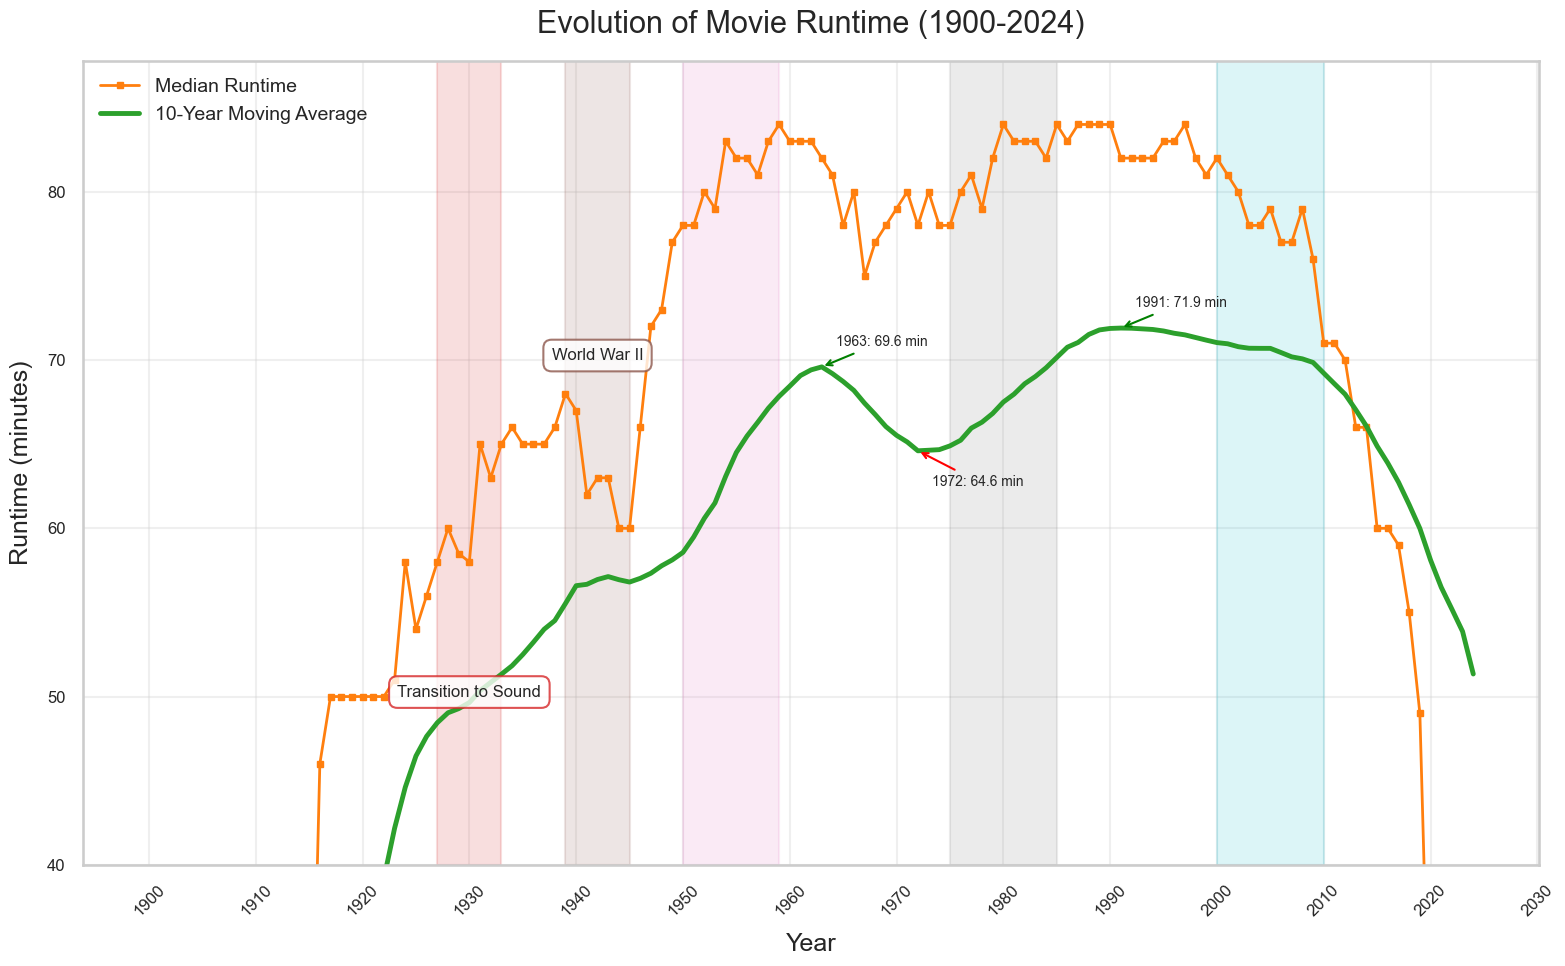

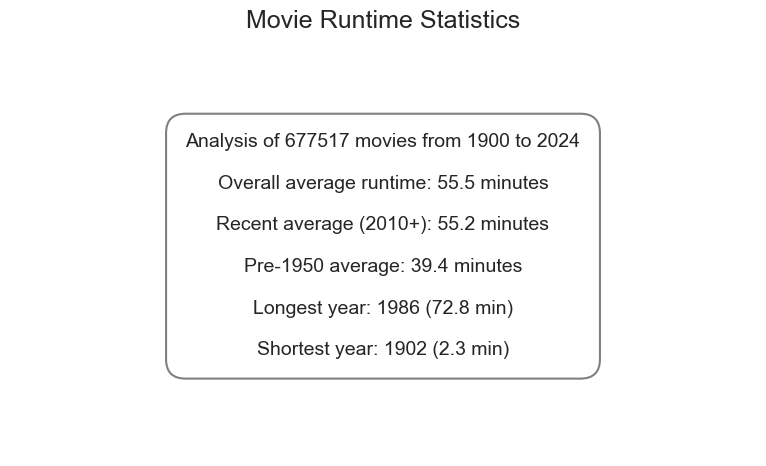

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator
import matplotlib.patches as mpatches
from scipy.signal import find_peaks

# Set the style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("talk")

# Load the dataset
file_path = '/Users/jorgemartinez/Documents/TMDB_movie_dataset_v11.csv'
df = pd.read_csv(file_path)

# Print the column names first to see what's available
print(f"Dataset loaded with {df.shape[0]} rows")
print(f"Columns in the dataset: {list(df.columns)}")

# Find the right column for release year
year_columns = [col for col in df.columns if 'year' in col.lower() or 'date' in col.lower() or 'release' in col.lower()]
print(f"Potential year columns: {year_columns}")
if year_columns:
    year_column = year_columns[0]
    print(f"Using '{year_column}' as release year column")
else:
    raise ValueError("No suitable column found for release year")

# Find the right column for runtime
runtime_columns = [col for col in df.columns if 'run' in col.lower() or 'time' in col.lower() or 'duration' in col.lower()]
print(f"Potential runtime columns: {runtime_columns}")
if runtime_columns:
    runtime_column = runtime_columns[0]
    print(f"Using '{runtime_column}' as runtime column")
else:
    raise ValueError("No suitable column found for runtime")

# Find the adult column
adult_columns = [col for col in df.columns if 'adult' in col.lower()]
print(f"Potential adult columns: {adult_columns}")
if adult_columns:
    adult_column = adult_columns[0]
    print(f"Using '{adult_column}' as adult column")
    # Filter out adult movies
    df = df[df[adult_column] != 'Yes']
    df = df[df[adult_column] != True]  # In case it's boolean
    print(f"After filtering adult content: {df.shape[0]} movies remaining")
else:
    print("No adult column found, skipping adult content filtering")

# If the year column contains full dates, extract just the year
if df[year_column].dtype == 'object':
    try:
        # Try to convert to datetime and extract year
        df['extracted_year'] = pd.to_datetime(df[year_column]).dt.year
        year_column = 'extracted_year'
        print(f"Extracted year from {year_column}")
    except:
        print(f"Could not extract year from {year_column}, using as is")

# Data preparation
# Filter out rows with missing values, zero or negative runtimes, and future years
df_filtered = df[
    (df[runtime_column] > 0) & 
    (df[runtime_column] < 300) &  # Cap at 5 hours to remove outliers
    (df[year_column].notna()) & 
    (df[year_column] >= 1900) &  # Start from 1900
    (df[year_column] <= 2024)    # Only include up to present
]

print(f"After filtering invalid data: {df_filtered.shape[0]} movies")

# Create a year-runtime dataset with sufficient samples per year
year_counts = df_filtered[year_column].value_counts()
valid_years = year_counts[year_counts >= 10].index  # Only years with at least 10 movies
df_years = df_filtered[df_filtered[year_column].isin(valid_years)]
print(f"Years with at least 10 movies: {len(valid_years)}")
print(f"Final dataset size: {df_years.shape[0]} movies")

# Calculate statistics by year
yearly_stats = df_years.groupby(year_column).agg({
    runtime_column: ['mean', 'median', 'std', 'count']
})
yearly_stats.columns = ['mean_runtime', 'median_runtime', 'std_runtime', 'count']
yearly_stats = yearly_stats.reset_index()

# Sort by year
yearly_stats = yearly_stats.sort_values(year_column)

# Create a figure with larger size
plt.figure(figsize=(16, 10))

# Plot the median runtime
plt.plot(
    yearly_stats[year_column], 
    yearly_stats['median_runtime'], 
    marker='s', 
    markersize=4, 
    linewidth=2,
    color='#ff7f0e',
    label='Median Runtime'
)

# Calculate the 10-year moving average
yearly_stats['moving_avg_10yr'] = yearly_stats['mean_runtime'].rolling(window=10, min_periods=1).mean()

# Add the moving average line
plt.plot(
    yearly_stats[year_column],
    yearly_stats['moving_avg_10yr'],
    linewidth=3.5,
    color='#2ca02c',
    label='10-Year Moving Average'
)

# Set titles and labels
plt.title('Evolution of Movie Runtime (1900-2024)', fontsize=22, pad=20)
plt.xlabel('Year', fontsize=18, labelpad=10)
plt.ylabel('Runtime (minutes)', fontsize=18, labelpad=10)
plt.legend(fontsize=14)

# Format x-axis to show decades
plt.xticks(range(1900, 2030, 10), rotation=45, fontsize=12)
plt.gca().xaxis.set_major_locator(MultipleLocator(10))
plt.gca().xaxis.set_minor_locator(MultipleLocator(5))

# Format y-axis
plt.yticks(fontsize=12)
plt.ylim(bottom=max(40, yearly_stats['mean_runtime'].min() - 15),
         top=min(180, yearly_stats['mean_runtime'].max() + 15))

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Add annotations for key periods
key_periods = [
    {'year_range': (1927, 1933), 'label': 'Transition to Sound', 'y_pos': 50, 'color': '#d62728'},
    {'year_range': (1939, 1945), 'label': 'World War II', 'y_pos': 70, 'color': '#8c564b'},
    {'year_range': (1950, 1959), 'label': 'Golden Age of Hollywood', 'y_pos': 90, 'color': '#e377c2'},
    {'year_range': (1975, 1985), 'label': 'Blockbuster Era Begins', 'y_pos': 90, 'color': '#7f7f7f'},
    {'year_range': (2000, 2010), 'label': 'Digital Revolution', 'y_pos': 90, 'color': '#17becf'}
]

# Add period annotations as colored background regions
for period in key_periods:
    start, end = period['year_range']
    plt.axvspan(start, end, alpha=0.15, color=period['color'])
    
    # Add label at the center of the period
    center_year = start + (end - start) / 2
    plt.annotate(
        period['label'],
        xy=(center_year, period['y_pos']),
        xytext=(0, 0),
        textcoords='offset points',
        fontsize=12,
        ha='center',
        bbox=dict(boxstyle="round,pad=0.5", fc="white", ec=period['color'], alpha=0.8)
    )

# Find important trend changes
# Detect local maxima/minima in the moving average
peaks, _ = find_peaks(yearly_stats['moving_avg_10yr'], distance=10, prominence=3)
peak_years = yearly_stats[year_column].iloc[peaks].values
peak_runtimes = yearly_stats['moving_avg_10yr'].iloc[peaks].values

# Get valleys (local minima)
valleys, _ = find_peaks(-yearly_stats['moving_avg_10yr'], distance=10, prominence=3)
valley_years = yearly_stats[year_column].iloc[valleys].values
valley_runtimes = yearly_stats['moving_avg_10yr'].iloc[valleys].values

# Annotate notable peaks and valleys (limiting to a few to avoid clutter)
for i, (year, runtime) in enumerate(zip(peak_years, peak_runtimes)):
    if i < 3:  # Limit to top 3 peaks
        plt.annotate(
            f'{int(year)}: {runtime:.1f} min',
            xy=(year, runtime),
            xytext=(10, 15),
            textcoords='offset points',
            fontsize=10,
            arrowprops=dict(arrowstyle='->', color='green')
        )

for i, (year, runtime) in enumerate(zip(valley_years, valley_runtimes)):
    if i < 3:  # Limit to top 3 valleys
        plt.annotate(
            f'{int(year)}: {runtime:.1f} min',
            xy=(year, runtime),
            xytext=(10, -25),
            textcoords='offset points',
            fontsize=10,
            arrowprops=dict(arrowstyle='->', color='red')
        )

# Adjust layout and save the main graph
plt.tight_layout()
plt.savefig('movie_runtime_evolution.png', dpi=300, bbox_inches='tight')
plt.show()

# Create a separate figure for the text box with insights
recent_avg = yearly_stats[yearly_stats[year_column] >= 2010]['mean_runtime'].mean()
oldest_avg = yearly_stats[yearly_stats[year_column] < 1950]['mean_runtime'].mean()
longest_year = yearly_stats.loc[yearly_stats['mean_runtime'].idxmax()]
shortest_year = yearly_stats.loc[yearly_stats['mean_runtime'].idxmin()]

# Create a new figure for the text summary
plt.figure(figsize=(8, 5))
plt.axis('off')  # Hide axes

summary_text = (
    f"Analysis of {df_years.shape[0]} movies from {int(yearly_stats[year_column].min())} to {int(yearly_stats[year_column].max())}\n\n"
    f"Overall average runtime: {yearly_stats['mean_runtime'].mean():.1f} minutes\n\n"
    f"Recent average (2010+): {recent_avg:.1f} minutes\n\n"
    f"Pre-1950 average: {oldest_avg:.1f} minutes\n\n"
    f"Longest year: {int(longest_year[year_column])} ({longest_year['mean_runtime']:.1f} min)\n\n"
    f"Shortest year: {int(shortest_year[year_column])} ({shortest_year['mean_runtime']:.1f} min)"
)

plt.text(0.5, 0.5, summary_text, fontsize=14,
         ha='center', va='center', 
         bbox=dict(boxstyle="round,pad=1", fc="white", ec="gray"))

plt.title('Movie Runtime Statistics', fontsize=18)
plt.tight_layout()
plt.savefig('movie_runtime_stats.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
Below:
For two below, still using 50% of dataset because of MV.

Dataset loaded with 1200365 rows
Columns in the dataset: ['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date', 'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'tagline', 'genres', 'production_companies', 'production_countries', 'spoken_languages', 'keywords', 'release_year', 'release_month', 'release_day', 'release_dayofweek', 'release_quarter', 'movie_age_days', 'movie_age_years', 'roi', 'profit', 'profit_margin', 'budget_category', 'revenue_category', 'runtime_category', 'rating_category', 'weighted_rating', 'genres_list', 'genres_count', 'genres_names', 'production_companies_list', 'production_companies_count', 'production_companies_names', 'production_countries_list', 'production_countries_count', 'production_countries_names', 'is_us_production', 'spoken_languages_list', 'spoken_languages_count', 'spoken_languages_names', 'is_english', 'keywords_list', 

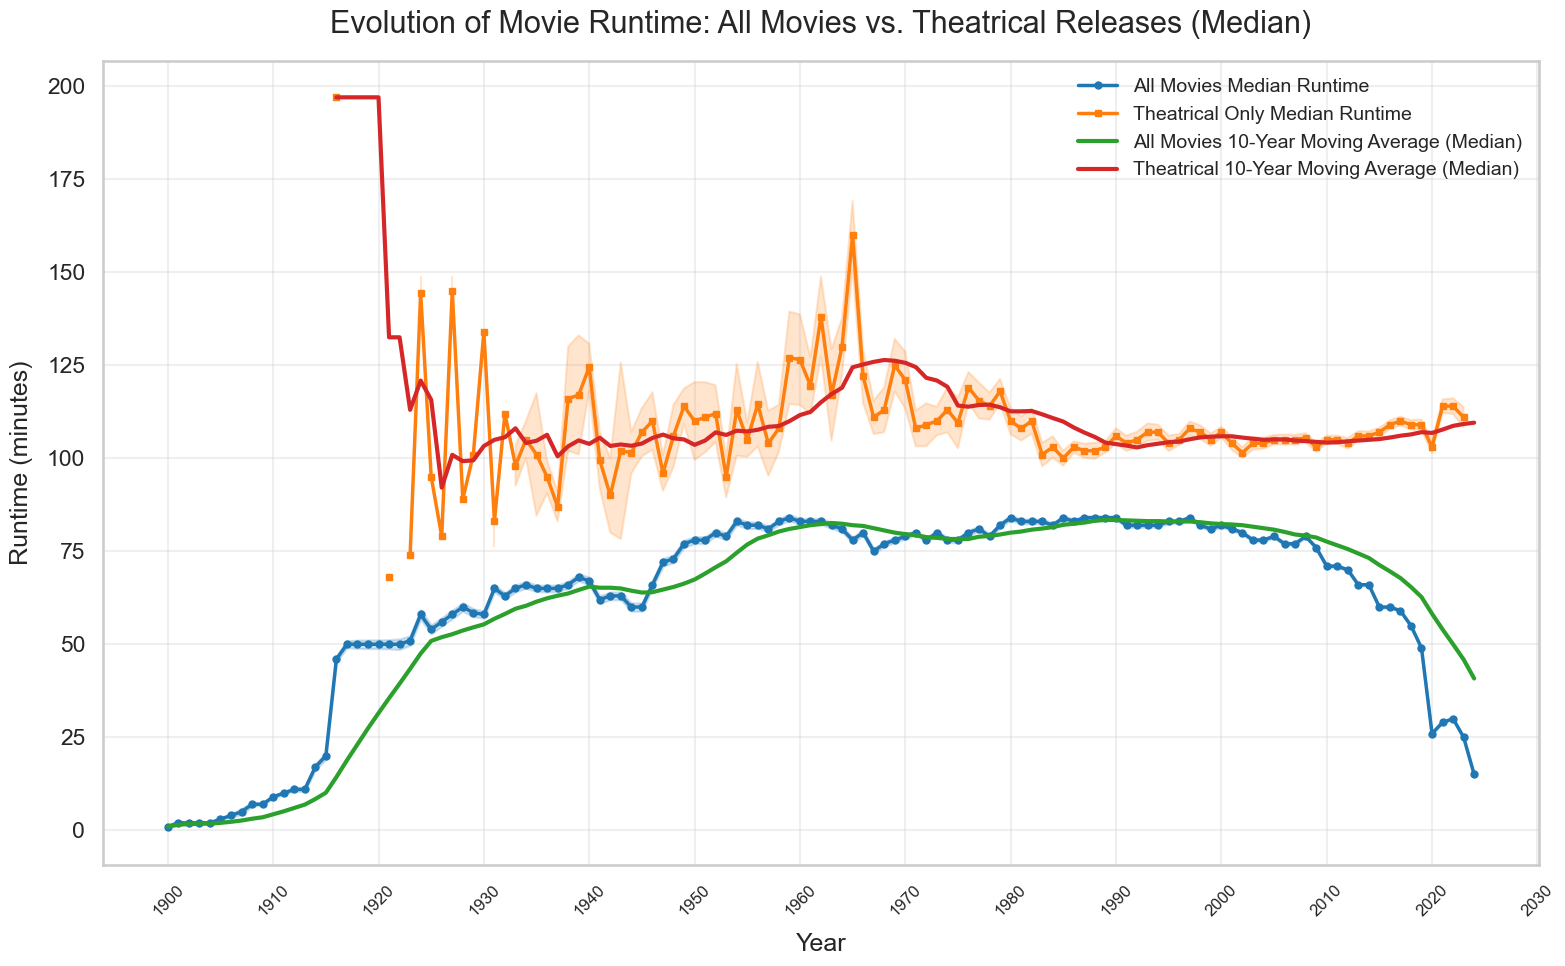

Analysis complete. Check the generated PNG file for visualization.


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# Load your dataset
file_path = '/Users/jorgemartinez/Documents/NYDSA_#_1_ Python_Project /Python-Project-1-Jorge-M-NYCDSA/tmdb_featured_dataset.csv'  # Update this to your file path
df = pd.read_csv(file_path)

# Same setup as your original code
print(f"Dataset loaded with {df.shape[0]} rows")
print(f"Columns in the dataset: {list(df.columns)}")

# Find the right column for release year
year_columns = [col for col in df.columns if 'year' in col.lower() or 'date' in col.lower() or 'release' in col.lower()]
year_column = year_columns[0] if year_columns else None
print(f"Using '{year_column}' as release year column")

# Find the right column for runtime
runtime_columns = [col for col in df.columns if 'run' in col.lower() or 'time' in col.lower() or 'duration' in col.lower()]
runtime_column = runtime_columns[0] if runtime_columns else None
print(f"Using '{runtime_column}' as runtime column")

# Filter adult content if possible
adult_columns = [col for col in df.columns if 'adult' in col.lower()]
if adult_columns:
    adult_column = adult_columns[0]
    print(f"Using '{adult_column}' as adult column")
    df = df[df[adult_column] != 'Yes']
    df = df[df[adult_column] != True]
    print(f"After filtering adult content: {df.shape[0]} movies remaining")
else:
    print("No adult column found, skipping adult content filtering")

# Extract year if needed
if df[year_column].dtype == 'object':
    try:
        df['extracted_year'] = pd.to_datetime(df[year_column]).dt.year
        year_column = 'extracted_year'
        print(f"Extracted year from {year_column}")
    except:
        print(f"Could not extract year from {year_column}, using as is")

# Basic filtering (similar to your original code)
df_filtered = df[
    (df[runtime_column] > 0) & 
    (df[runtime_column] < 300) &
    (df[year_column].notna()) & 
    (df[year_column] >= 1900) &
    (df[year_column] <= 2024)
]

print(f"After filtering invalid data: {df_filtered.shape[0]} movies")

# Create a year-runtime dataset with sufficient samples per year
year_counts = df_filtered[year_column].value_counts()
valid_years = year_counts[year_counts >= 10].index
df_years = df_filtered[df_filtered[year_column].isin(valid_years)]
print(f"Years with at least 10 movies: {len(valid_years)}")
print(f"Final dataset size: {df_years.shape[0]} movies")

# Function to filter for likely theatrical releases
def filter_theatrical(df):
    # Use vote_count as a proxy for popularity/theatrical release
    if 'vote_count' in df.columns:
        theatrical = df[df['vote_count'] > 100]  # Adjust threshold as needed
    else:
        theatrical = df.copy()  # No filter if column missing
    
    # Use revenue as another indicator
    if 'revenue' in df.columns:
        theatrical = theatrical[theatrical['revenue'] > 100000]  # Adjust threshold
    
    # Use budget as another indicator
    if 'budget' in df.columns:
        theatrical = theatrical[theatrical['budget'] > 100000]  # Adjust threshold
    
    print(f"Identified {theatrical.shape[0]} likely theatrical releases")
    return theatrical

# Function to analyze runtime by content type
def analyze_by_group(df, year_column, runtime_column):
    # All movies analysis
    all_yearly = df.groupby(year_column)[runtime_column].agg(['mean', 'median', 'std', 'count']).reset_index()
    all_yearly.columns = [year_column, 'all_mean', 'all_median', 'all_std', 'all_count']
    
    # Filter for theatrical movies
    theatrical_df = filter_theatrical(df)
    theatrical_yearly = theatrical_df.groupby(year_column)[runtime_column].agg(['mean', 'median', 'std', 'count']).reset_index()
    theatrical_yearly.columns = [year_column, 'theatrical_mean', 'theatrical_median', 'theatrical_std', 'theatrical_count']
    
    # Merge results
    merged = pd.merge(all_yearly, theatrical_yearly, on=year_column, how='outer')
    merged = merged.sort_values(year_column)
    
    return merged

# Execute analysis
runtime_trends = analyze_by_group(df_years, year_column, runtime_column)

# Create plot - ONLY keeping the first graph
plt.figure(figsize=(16, 10))

# Plot all movies trend - CHANGED FROM MEAN TO MEDIAN
plt.plot(
    runtime_trends[year_column], 
    runtime_trends['all_median'], 
    marker='o', 
    markersize=5, 
    linewidth=2.5,
    color='#1f77b4',
    label='All Movies Median Runtime'
)

# Add confidence interval for all movies
plt.fill_between(
    runtime_trends[year_column],
    runtime_trends['all_median'] - runtime_trends['all_std'] / np.sqrt(runtime_trends['all_count']),
    runtime_trends['all_median'] + runtime_trends['all_std'] / np.sqrt(runtime_trends['all_count']),
    alpha=0.2,
    color='#1f77b4'
)

# Plot theatrical movies trend - CHANGED FROM MEAN TO MEDIAN
plt.plot(
    runtime_trends[year_column], 
    runtime_trends['theatrical_median'], 
    marker='s', 
    markersize=5, 
    linewidth=2.5,
    color='#ff7f0e',
    label='Theatrical Only Median Runtime'
)

# Add confidence interval for theatrical movies
plt.fill_between(
    runtime_trends[year_column],
    runtime_trends['theatrical_median'] - runtime_trends['theatrical_std'] / np.sqrt(runtime_trends['theatrical_count']),
    runtime_trends['theatrical_median'] + runtime_trends['theatrical_std'] / np.sqrt(runtime_trends['theatrical_count']),
    alpha=0.2,
    color='#ff7f0e'
)

# Calculate and plot 10-year moving averages - CHANGED FROM MEAN TO MEDIAN
runtime_trends['all_10yr_ma'] = runtime_trends['all_median'].rolling(window=10, min_periods=1).mean()
runtime_trends['theatrical_10yr_ma'] = runtime_trends['theatrical_median'].rolling(window=10, min_periods=1).mean()

plt.plot(
    runtime_trends[year_column],
    runtime_trends['all_10yr_ma'],
    linewidth=3,
    color='#2ca02c',
    label='All Movies 10-Year Moving Average (Median)'
)

plt.plot(
    runtime_trends[year_column],
    runtime_trends['theatrical_10yr_ma'],
    linewidth=3,
    color='#d62728',
    label='Theatrical 10-Year Moving Average (Median)'
)

# Set titles and labels
plt.title('Evolution of Movie Runtime: All Movies vs. Theatrical Releases (Median)', fontsize=22, pad=20)
plt.xlabel('Year', fontsize=18, labelpad=10)
plt.ylabel('Runtime (minutes)', fontsize=18, labelpad=10)
plt.legend(fontsize=14)

# Format axes
plt.xticks(range(1900, 2030, 10), rotation=45, fontsize=12)
plt.gca().xaxis.set_major_locator(MultipleLocator(10))
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Save and show the figure
plt.savefig('movie_runtime_comparison_median.png', dpi=300, bbox_inches='tight')
plt.show()

print("Analysis complete. Check the generated PNG file for visualization.")

This filters out movies that:

Have zero or negative runtime values
Have unreasonably long runtimes (over 300 minutes) - ??????
Have missing release year values
Have release years before 1900 (likely data errors) - ?????
Have release years beyond 2024 (future dates that are likely errors)


The code also does additional data cleaning:

It attempts to filter out adult content if an adult column exists
It tries to properly extract years from date columns if needed
It filters out years with fewer than 10 movies to ensure statistical significance 

Theatrical Filter

Popularity threshold: Movies with a vote_count greater than 100 are considered theatrical. This suggests movies that received significant audience attention.
Revenue threshold: Movies with a revenue greater than $100,000 are included as theatrical releases.
Budget threshold: Movies with a budget greater than $100,000 are considered theatrical.

This confirms that the runtime decline isn't because theatrical movies are getting shorter - it's because the TMDB dataset includes an increasing proportion of short-form content after 2010. This coincides with:

The rise of streaming platforms that produce shorter content
International Content
The explosion of short films and web content being added to the database
The growth of TMDB itself (founded in 2008), which likely began including more non-theatrical content as it expanded

Dataset loaded with 1192898 rows
After filtering: 621858 movies with genres and valid years
Movies by decade:
decade
1920.0     10778
1930.0     15647
1940.0     14626
1950.0     19824
1960.0     28261
1970.0     36913
1980.0     43094
1990.0     49667
2000.0     89732
2010.0    192100
2020.0    121216
Name: count, dtype: int64
Top 12 genres overall:
genre_list
Drama          206137
Documentary    150365
Comedy         126537
Animation       53914
Romance         49436
Horror          46584
Music           46068
Action          40919
Thriller        40867
Crime           30973
Family          26280
TV Movie        23138
Name: count, dtype: int64


<Figure size 1800x1000 with 0 Axes>

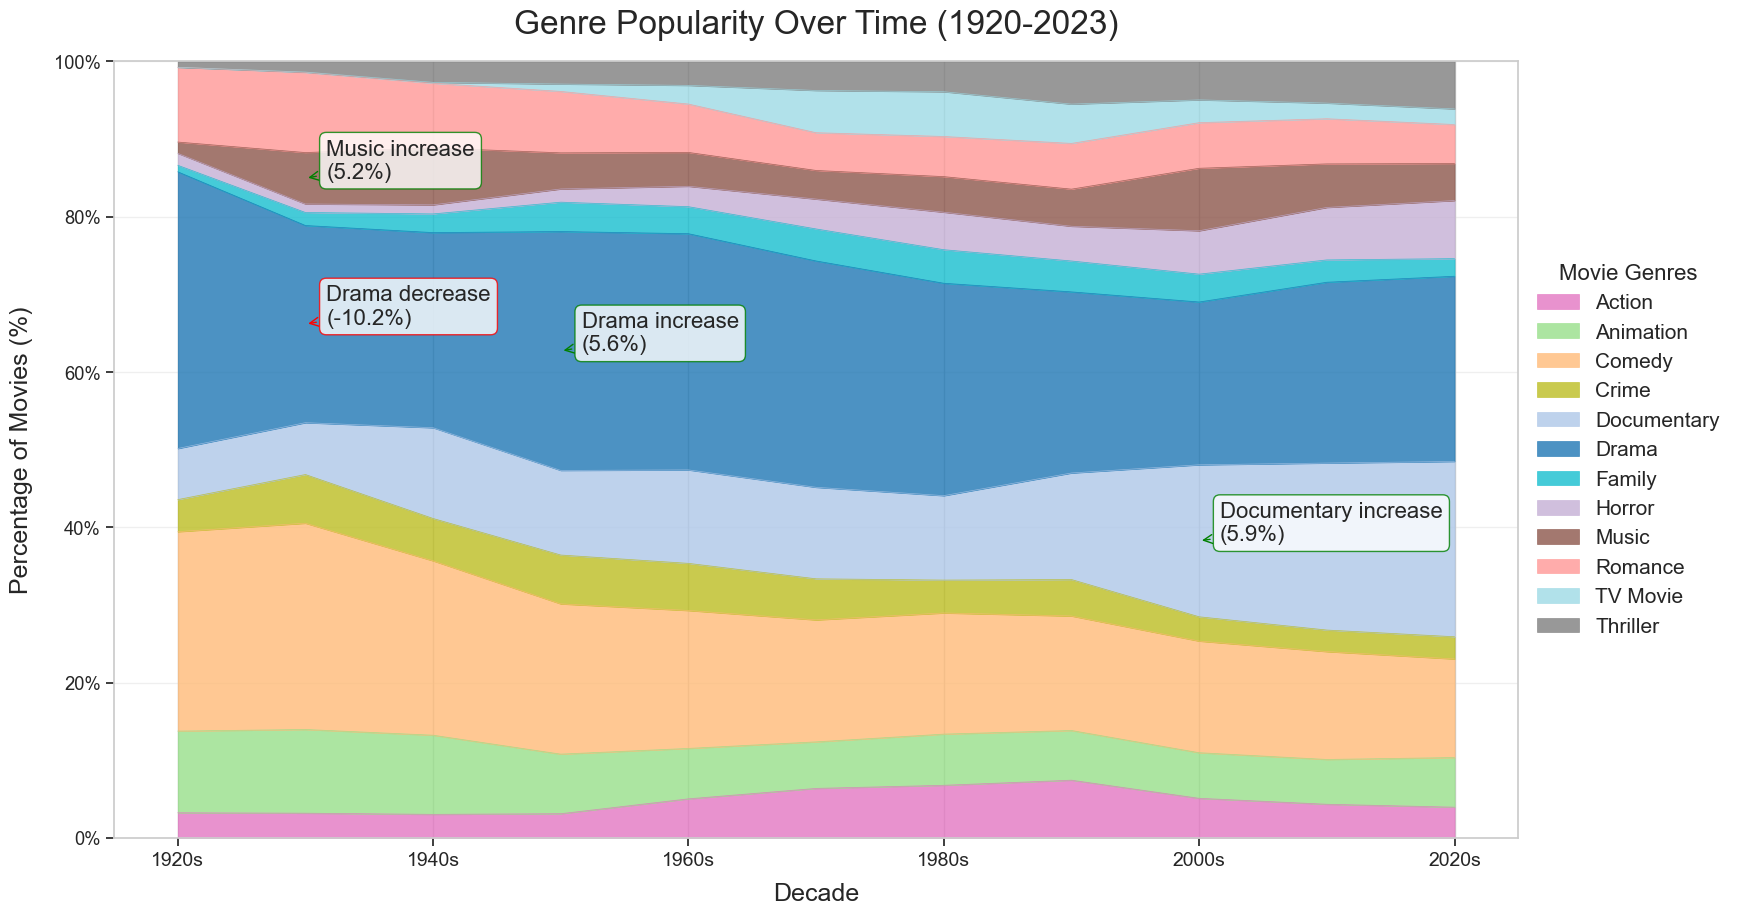


Genre Correlation Analysis:


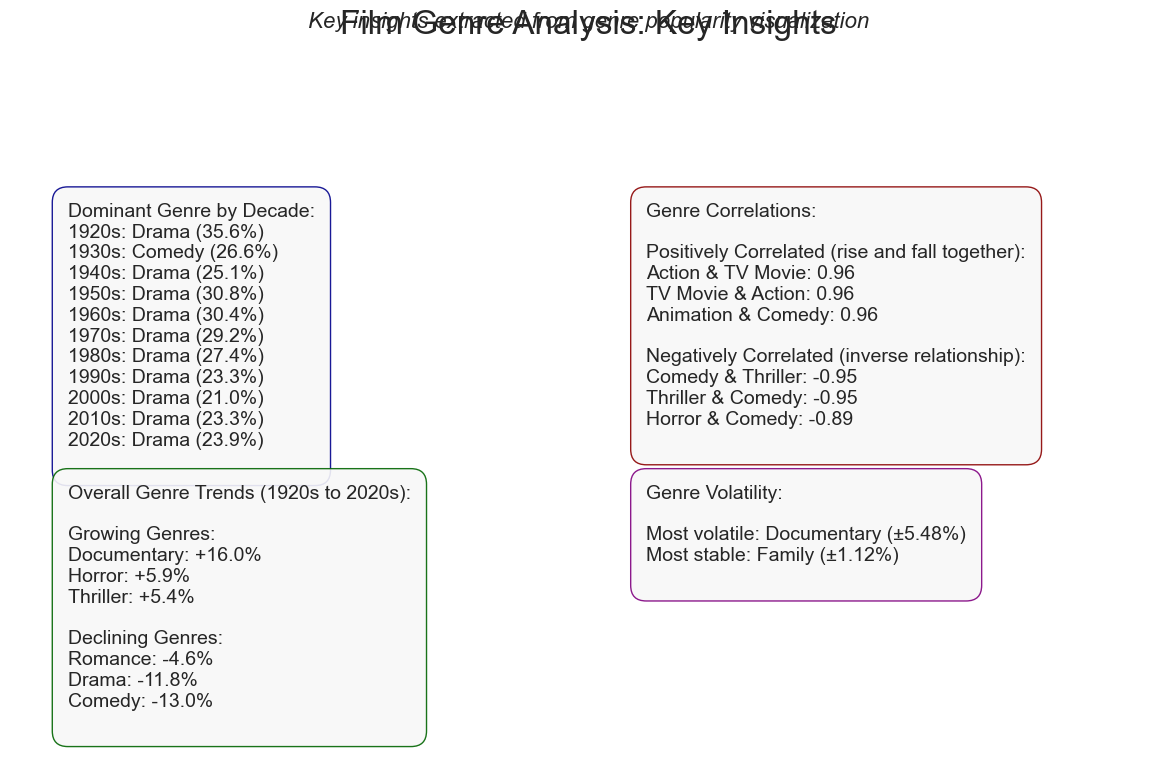


Genre Correlation Analysis:

Most positively correlated genres (tend to rise and fall together):
genre_list  genre_list
Action      TV Movie      0.964675
TV Movie    Action        0.964675
Animation   Comedy        0.957496
Comedy      Animation     0.957496
Romance     Comedy        0.957437
dtype: float64

Most negatively correlated genres (tend to move in opposite directions):
genre_list  genre_list
Comedy      Thriller     -0.945339
Thriller    Comedy       -0.945339
Horror      Comedy       -0.885185
Comedy      Horror       -0.885185
Romance     Thriller     -0.844294
dtype: float64

Genre volatility (standard deviation of popularity):
genre_list
Documentary    5.475763
Comedy         4.836020
Drama          4.297525
Horror         2.282023
TV Movie       2.162371
Animation      1.983628
Romance        1.908875
Music          1.810862
Thriller       1.719868
Action         1.589866
Crime          1.336724
Family         1.115828
dtype: float64

Most volatile genre: Documentary 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches
from matplotlib.ticker import FuncFormatter
import warnings
warnings.filterwarnings('ignore')

# Set the style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.2)

# Load the dataset
file_path = '/Users/jorgemartinez/Documents/NYDSA_#_1_ Python_Project /Python-Project-1-Jorge-M-NYCDSA/tmdb_featured_dataset.csv'
df = pd.read_csv(file_path)

# Print basic info for debugging
print(f"Dataset loaded with {df.shape[0]} rows")

# Process the genres data
def extract_genres(genre_str):
    """Extract genres from the genre string."""
    if pd.isna(genre_str) or genre_str == '':
        return []
    
    # Handle different formats of genre string
    genres = []
    if ',' in genre_str:
        # Simple comma-separated format
        genres = [g.strip() for g in genre_str.split(',')]
    else:
        # Try to identify genre names in the string
        common_genres = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 
                         'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                         'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                         'Sci-Fi', 'TV Movie', 'Thriller', 'War', 'Western']
        
        for genre in common_genres:
            if genre in genre_str:
                if genre == 'Science Fiction' and 'Sci-Fi' in genre_str:
                    # Avoid double-counting
                    continue
                genres.append(genre)
    
    return genres

# Create genre lists for each movie
try:
    # First, check if genres_list is properly populated
    if 'genres_list' in df.columns and isinstance(df['genres_list'].iloc[0], list) and len(df['genres_list'].iloc[0]) > 0:
        df['genre_list'] = df['genres_list']
    else:
        # Apply the extraction to the genres column
        df['genre_list'] = df['genres'].apply(extract_genres)
except Exception as e:
    print(f"Error processing genres: {e}")
    # Fallback - create a simplified genre extraction
    df['genre_list'] = df['genres'].apply(lambda x: 
        [g.strip() for g in str(x).split(',')] if pd.notna(x) else [])

# Filter data to include only movies with genres and valid release years
df_filtered = df[
    (df['genre_list'].apply(len) > 0) & 
    (df['release_year'].notna()) & 
    (df['release_year'] >= 1920) &  # Start from 1920
    (df['release_year'] <= 2023)    # Only include up to 2023
]

print(f"After filtering: {df_filtered.shape[0]} movies with genres and valid years")

# Group data by decades
df_filtered['decade'] = (df_filtered['release_year'] // 10) * 10
print("Movies by decade:")
decade_counts = df_filtered['decade'].value_counts().sort_index()
print(decade_counts)

# Create an exploded dataframe with one row per movie-genre pair
genre_df = df_filtered.explode('genre_list')
genre_df = genre_df[genre_df['genre_list'].notna() & (genre_df['genre_list'] != '')]

# Get the top N genres overall
N_GENRES = 12  # Number of top genres to include
all_genre_counts = genre_df['genre_list'].value_counts()
top_genres = all_genre_counts.head(N_GENRES).index.tolist()
print(f"Top {N_GENRES} genres overall:")
print(all_genre_counts.head(N_GENRES))

# Filter to only include top genres
genre_df = genre_df[genre_df['genre_list'].isin(top_genres)]

# Count movies by genre and decade
genre_decade_counts = genre_df.groupby(['decade', 'genre_list']).size().unstack(fill_value=0)

# Calculate percentage of each genre per decade (normalize by decade)
genre_decade_pct = genre_decade_counts.div(genre_decade_counts.sum(axis=1), axis=0) * 100

# Generate a colormap for the genres
genre_colors = plt.cm.tab20(np.linspace(0, 1, len(top_genres)))
genre_color_map = dict(zip(top_genres, genre_colors))

# Create a figure for the main visualization
plt.figure(figsize=(18, 10))

# Create the stacked area chart
ax = genre_decade_pct.plot.area(
    stacked=True,
    alpha=0.8,
    linewidth=0.5,
    color=[genre_color_map[genre] for genre in genre_decade_pct.columns],
    figsize=(18, 10)
)

# Set titles and labels
plt.title('Genre Popularity Over Time (1920-2023)', fontsize=24, pad=20)
plt.xlabel('Decade', fontsize=18, labelpad=10)
plt.ylabel('Percentage of Movies (%)', fontsize=18, labelpad=15)

# Format x-axis to show decades
plt.xticks(fontsize=14)
plt.gca().xaxis.set_major_formatter(lambda x, pos: f"{int(x)}s")

# Format y-axis as percentage
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{int(x)}%'))
plt.ylim(0, 100)

# Customize legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles, labels,
    title="Movie Genres",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=15,
    title_fontsize=16
)

# Add grid for better readability
plt.grid(axis='y', alpha=0.3)

# Annotate key shifts in genre popularity
# Find decades with significant changes for each genre
significant_shifts = []

for genre in top_genres:
    # Skip if genre not in dataframe
    if genre not in genre_decade_pct.columns:
        continue
        
    genre_trend = genre_decade_pct[genre]
    
    # Find largest increase
    increases = genre_trend.diff()
    if not increases.dropna().empty:
        max_increase_decade = increases.dropna().idxmax()
        max_increase = increases.loc[max_increase_decade]
        if max_increase > 5:  # Only include significant increases (>5%)
            significant_shifts.append({
                'decade': max_increase_decade,
                'genre': genre,
                'change': max_increase,
                'direction': 'increase',
                'value': genre_trend.loc[max_increase_decade]
            })
    
    # Find largest decrease
    if not increases.dropna().empty:
        max_decrease_decade = increases.dropna().idxmin()
        max_decrease = increases.loc[max_decrease_decade]
        if max_decrease < -5:  # Only include significant decreases (<-5%)
            significant_shifts.append({
                'decade': max_decrease_decade,
                'genre': genre,
                'change': max_decrease,
                'direction': 'decrease',
                'value': genre_trend.loc[max_decrease_decade]
            })
            
# Sort by absolute change magnitude and take top 5
significant_shifts.sort(key=lambda x: abs(x['change']), reverse=True)
top_shifts = significant_shifts[:5]

# Add annotations for significant shifts
for shift in top_shifts:
    decade = shift['decade']
    genre = shift['genre']
    change = shift['change']
    direction = shift['direction']
    value = shift['value']
    
    # Calculate vertical position (approximate)
    # For stacked area charts, we need to estimate the y position
    y_pos = 0
    for g in genre_decade_pct.columns:
        if g == genre:
            y_pos += value / 2  # Center in the genre's area
            break
        y_pos += genre_decade_pct.loc[decade, g]
    
    arrow_color = 'green' if direction == 'increase' else 'red'
    plt.annotate(
        f"{genre} {direction}\n({change:.1f}%)",
        xy=(decade, y_pos),
        xytext=(15, 0 if direction == 'increase' else 0),
        textcoords="offset points",
        fontsize=16,
        arrowprops=dict(arrowstyle="->", color=arrow_color),
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec=arrow_color, alpha=0.8)
    )

# Add historical context with key events in film history
key_events = [
    {'decade': 1920, 'event': 'Silent Era'},
    {'decade': 1930, 'event': 'Golden Age Begins'},
    {'decade': 1950, 'event': 'TV Competes with Cinema'},
    {'decade': 1970, 'event': 'New Hollywood Era'},
    {'decade': 1980, 'event': 'Blockbuster Era'},
    {'decade': 2000, 'event': 'Digital Revolution'},
    {'decade': 2010, 'event': 'Streaming Services Rise'}
]

for event in key_events:
    plt.annotate(
        event['event'],
        xy=(event['decade'], -5),
        xytext=(0, -25),
        textcoords="offset points",
        fontsize=10,
        ha='center',
        arrowprops=dict(arrowstyle="-", color='gray'),
        bbox=dict(boxstyle="round,pad=0.3", fc="#f0f0f0", ec="gray", alpha=0.8)
    )

# Adjust layout and save the main visualization
plt.tight_layout()
plt.subplots_adjust(bottom=0.15, right=0.85)  # Make room for annotations
plt.savefig('genre_popularity_over_time.png', dpi=300, bbox_inches='tight')
plt.show()

# Create a new figure for the text box visualization
plt.figure(figsize=(12, 8))

# Prepare data for the text box visualization
dominant_genres = {}
for decade in genre_decade_pct.index:
    top_genre = genre_decade_pct.loc[decade].idxmax()
    dominant_genres[decade] = (top_genre, genre_decade_pct.loc[decade, top_genre])

# Calculate genre growth trends
genre_growth = {}
for genre in top_genres:
    if genre in genre_decade_pct.columns and len(genre_decade_pct) > 1:
        first_decade = genre_decade_pct.index[0]
        last_decade = genre_decade_pct.index[-1]
        if not pd.isna(genre_decade_pct.loc[first_decade, genre]) and not pd.isna(genre_decade_pct.loc[last_decade, genre]):
            start_pct = genre_decade_pct.loc[first_decade, genre]
            end_pct = genre_decade_pct.loc[last_decade, genre]
            change = end_pct - start_pct
            genre_growth[genre] = change

# Sort genres by growth
genres_by_growth = sorted(genre_growth.items(), key=lambda x: x[1], reverse=True)

# Set background for the text visualization
plt.subplot(1, 1, 1)
plt.axis('off')
plt.title('Film Genre Analysis: Key Insights', fontsize=24, pad=20)

# Create the text content
insights_text = "Dominant Genre by Decade:\n"
for decade, (genre, pct) in sorted(dominant_genres.items()):
    insights_text += f"{int(decade)}s: {genre} ({pct:.1f}%)\n"

plt.text(
    0.05, 0.8, 
    insights_text,
    fontsize=14,
    bbox=dict(boxstyle="round,pad=0.8", fc="#f8f8f8", ec="darkblue", alpha=0.9),
    transform=plt.gca().transAxes,
    verticalalignment='top'
)

growth_text = "Overall Genre Trends (1920s to 2020s):\n\nGrowing Genres:\n"
for genre, change in genres_by_growth[:3]:
    growth_text += f"{genre}: {change:+.1f}%\n"

growth_text += "\nDeclining Genres:\n"
for genre, change in genres_by_growth[-3:]:
    growth_text += f"{genre}: {change:+.1f}%\n"

plt.text(
    0.05, 0.4, 
    growth_text,
    fontsize=14,
    bbox=dict(boxstyle="round,pad=0.8", fc="#f8f8f8", ec="darkgreen", alpha=0.9),
    transform=plt.gca().transAxes,
    verticalalignment='top'
)

# Add correlation analysis
print("\nGenre Correlation Analysis:")
correlation_matrix = genre_decade_pct.corr()

# Find the most positively correlated genre pairs
pos_corr = correlation_matrix.unstack().sort_values(ascending=False)
pos_corr = pos_corr[pos_corr < 1.0]  # Remove self-correlations

# Find the most negatively correlated genre pairs
neg_corr = correlation_matrix.unstack().sort_values()

# Calculate volatility (how much a genre's popularity fluctuates)
genre_volatility = genre_decade_pct.std().sort_values(ascending=False)

# Add correlation data to the visualization
corr_text = "Genre Correlations:\n\nPositively Correlated (rise and fall together):\n"
for pair, value in pos_corr.head(3).items():
    corr_text += f"{pair[0]} & {pair[1]}: {value:.2f}\n"

corr_text += "\nNegatively Correlated (inverse relationship):\n"
for pair, value in neg_corr.head(3).items():
    corr_text += f"{pair[0]} & {pair[1]}: {value:.2f}\n"

plt.text(
    0.55, 0.8, 
    corr_text,
    fontsize=14,
    bbox=dict(boxstyle="round,pad=0.8", fc="#f8f8f8", ec="darkred", alpha=0.9),
    transform=plt.gca().transAxes,
    verticalalignment='top'
)

volatility_text = "Genre Volatility:\n\n"
volatility_text += f"Most volatile: {genre_volatility.index[0]} (±{genre_volatility.iloc[0]:.2f}%)\n"
volatility_text += f"Most stable: {genre_volatility.index[-1]} (±{genre_volatility.iloc[-1]:.2f}%)\n"

plt.text(
    0.55, 0.4, 
    volatility_text,
    fontsize=14,
    bbox=dict(boxstyle="round,pad=0.8", fc="#f8f8f8", ec="purple", alpha=0.9),
    transform=plt.gca().transAxes,
    verticalalignment='top'
)

# Add a title note
plt.figtext(
    0.5, 0.95,
    "Key insights extracted from genre popularity visualization",
    fontsize=16,
    ha='center',
    style='italic'
)

# Save the insights visualization
plt.tight_layout()
plt.savefig('genre_analysis_insights.png', dpi=300, bbox_inches='tight')
plt.show()

# Print additional insights for the console
print("\nGenre Correlation Analysis:")
print("\nMost positively correlated genres (tend to rise and fall together):")
print(pos_corr.head(5))

print("\nMost negatively correlated genres (tend to move in opposite directions):")
print(neg_corr.head(5))

print("\nGenre volatility (standard deviation of popularity):")
print(genre_vola tility)

print(f"\nMost volatile genre: {genre_volatility.index[0]} (std: {genre_volatility.iloc[0]:.2f}%)")
print(f"Most stable genre: {genre_volatility.index[-1]} (std: {genre_volatility.iloc[-1]:.2f}%)")

In [ ]:


Category 1: Financial Performance Analysis
- Image 2: Movie Budget vs Revenue vs Ratings scatter plot showing the relationship between budget and box office returns
    And then show two sequenial scatter plots.
- Image 8: Top 20 Production Companies: Budget vs. Revenue bubble chart with ROI color coding
- Image 9: Top Film Producing Countries: Rating vs. Revenue bubble plot
-ROI Region*

Category 2: Geographic Distribution Analysis
- Image 1: Number of Movies and Average Rating by Country bar chart with ROI by Country
- Image 4: Top 20 Countries by Movie Production horizontal bar chart
- Image 6: Global Movie Production by Country world map visualization (with the slider)
- Image 7: Regional Distribution of Movie Production treemap showing production by continent

Category 3: Time-Based Analysis
- Image 3: Evolution of Movie Runtime (1900-2024) (theatrical versus normal) line chart showing runtime trends over decades
- 
Use Vote_Count Histagram early
Use Missing Value bar chart early
Use missing value, 0s, and combined graph early


#Fit in the two.

SyntaxError: invalid syntax (211312245.py, line 1)